In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
from sklearn.cluster import KMeans 
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [2]:
print('Numpy Version',np.__version__)
print('Pandas Version',pd.__version__)
print('Seaborn Version',sns.__version__)
print('Matplotlib Version',matplotlib.__version__)

Numpy Version 1.18.5
Pandas Version 1.0.5
Seaborn Version 0.11.2
Matplotlib Version 3.2.2


In [3]:
sns.set()
sns.set_palette(palette='deep')
import folium
from folium.plugins import FastMarkerCluster

# Read the Data

In [4]:
Sales = pd.read_excel('Sales.xlsx',sheet_name = 'Sales')

#Glimpse of Data
Sales.head()

CustID  AgentBonus   Age  CustTenure              Channel      Occupation  \
0  7000000        4409  22.0         4.0                Agent        Salaried   
1  7000001        2214  11.0         2.0  Third Party Partner        Salaried   
2  7000002        4273  26.0         4.0                Agent     Free Lancer   
3  7000003        1791  11.0         NaN  Third Party Partner        Salaried   
4  7000004        2955   6.0         NaN                Agent  Small Business   

  EducationField   Gender  ExistingProdType Designation  NumberOfPolicy  \
0       Graduate   Female                 3     Manager             2.0   
1       Graduate     Male                 4     Manager             4.0   
2  Post Graduate     Male                 4         Exe             3.0   
3       Graduate  Fe male                 3   Executive             3.0   
4             UG     Male                 3   Executive             4.0   

  MaritalStatus  MonthlyIncome  Complaint  ExistingPolicyTenure  SumAssured  \
0        Single        20993.0          1                   2.0    806761.0   
1      Divorced        20130.0          0                   3.0    294502.0   
2     Unmarried        17090.0          1                   2.0         NaN   
3      Divorced        17909.0          1                   2.0    268635.0   
4      Divorced        18468.0          0                   4.0    366405.0   

    Zone PaymentMethod  LastMonthCalls  CustCareScore  
0  North   Half Yearly               5            2.0  
1  North        Yearly               7            3.0  
2  North        Yearly               0            3.0  
3   West   Half Yearly               0            5.0  
4   West   Half Yearly               2            5.0

In [5]:
pd.options.display.max_columns = None

In [6]:
## Checking the shape of the data: Number of columns and rows

Sales.shape

(4520, 20)

In [7]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustID                4520 non-null   int64  
 1   AgentBonus            4520 non-null   int64  
 2   Age                   4251 non-null   float64
 3   CustTenure            4294 non-null   float64
 4   Channel               4520 non-null   object 
 5   Occupation            4520 non-null   object 
 6   EducationField        4520 non-null   object 
 7   Gender                4520 non-null   object 
 8   ExistingProdType      4520 non-null   int64  
 9   Designation           4520 non-null   object 
 10  NumberOfPolicy        4475 non-null   float64
 11  MaritalStatus         4520 non-null   object 
 12  MonthlyIncome         4284 non-null   float64
 13  Complaint             4520 non-null   int64  
 14  ExistingPolicyTenure  4336 non-null   float64
 15  SumAssured           

In [8]:
Sales = Sales.drop(['CustID'], axis = 1)

In [9]:
Sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgentBonus            4520 non-null   int64  
 1   Age                   4251 non-null   float64
 2   CustTenure            4294 non-null   float64
 3   Channel               4520 non-null   object 
 4   Occupation            4520 non-null   object 
 5   EducationField        4520 non-null   object 
 6   Gender                4520 non-null   object 
 7   ExistingProdType      4520 non-null   int64  
 8   Designation           4520 non-null   object 
 9   NumberOfPolicy        4475 non-null   float64
 10  MaritalStatus         4520 non-null   object 
 11  MonthlyIncome         4284 non-null   float64
 12  Complaint             4520 non-null   int64  
 13  ExistingPolicyTenure  4336 non-null   float64
 14  SumAssured            4366 non-null   float64
 15  Zone                 

## Change the data types of the below 

In [10]:
cat=["Complaint","ExistingProdType"]

In [11]:
for i in cat:
    Sales[i]=Sales[i].astype("object")

#### Making different list for categorical columns and numerical columns


In [12]:
cat=[]
num=[]
for i in Sales.columns:
    if Sales[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat) 
print(num)

    

['Channel', 'Occupation', 'EducationField', 'Gender', 'ExistingProdType', 'Designation', 'MaritalStatus', 'Complaint', 'Zone', 'PaymentMethod']
['AgentBonus', 'Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']


### unique values for categorical variables

In [13]:
for column in Sales.columns:
    if Sales[column].dtype == 'object':
        print(column.upper(),': ',Sales[column].nunique())
        print(Sales[column].value_counts().sort_values())
        print('\n')

CHANNEL :  3
Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64


OCCUPATION :  5
Free Lancer           2
Laarge Business     153
Large Business      255
Small Business     1918
Salaried           2192
Name: Occupation, dtype: int64


EDUCATIONFIELD :  7
MBA                 74
UG                 230
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1190
Graduate          1870
Name: EducationField, dtype: int64


GENDER :  3
Fe male     325
Female     1507
Male       2688
Name: Gender, dtype: int64


EXISTINGPRODTYPE :  6
6     123
1     183
2     221
5     708
3    1369
4    1916
Name: ExistingProdType, dtype: int64


DESIGNATION :  6
Exe                127
VP                 226
AVP                336
Senior Manager     676
Executive         1535
Manager           1620
Name: Designation, dtype: int64


MARITALSTATUS :  4
Unmarried     194
Divorced      804
Single       1254
Married      2

In [14]:
print(num)

['AgentBonus', 'Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']


In [15]:
## Are there any duplicate records

# Check for duplicate data

dups = Sales.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Sales[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [AgentBonus, Age, CustTenure, Channel, Occupation, EducationField, Gender, ExistingProdType, Designation, NumberOfPolicy, MaritalStatus, MonthlyIncome, Complaint, ExistingPolicyTenure, SumAssured, Zone, PaymentMethod, LastMonthCalls, CustCareScore]
Index: []

In [16]:
### Examine missing values
Sales_na = Sales.isna().sum()
Sales_na[Sales_na.values > 0].sort_values(ascending=False) # Find out all variables that contain missing values

Age                     269
MonthlyIncome           236
CustTenure              226
ExistingPolicyTenure    184
SumAssured              154
CustCareScore            52
NumberOfPolicy           45
dtype: int64

Age                     269
MonthlyIncome           236
CustTenure              226
ExistingPolicyTenure    184
SumAssured              154
CustCareScore            52
NumberOfPolicy           45

All these features have high percentage of missing value.


In [17]:
columns = Sales.columns
percent_missing = Sales.isnull().sum() * 100 / len(Sales)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values(by = "percent_missing",ascending = False)
   


column_name  percent_missing
Age                                    Age         5.951327
MonthlyIncome                MonthlyIncome         5.221239
CustTenure                      CustTenure         5.000000
ExistingPolicyTenure  ExistingPolicyTenure         4.070796
SumAssured                      SumAssured         3.407080
CustCareScore                CustCareScore         1.150442
NumberOfPolicy              NumberOfPolicy         0.995575
ExistingProdType          ExistingProdType         0.000000
Designation                    Designation         0.000000
Gender                              Gender         0.000000
MaritalStatus                MaritalStatus         0.000000
EducationField              EducationField         0.000000
Complaint                        Complaint         0.000000
Occupation                      Occupation         0.000000
Channel                            Channel         0.000000
Zone                                  Zone         0.000000
PaymentMethod                PaymentMethod         0.000000
LastMonthCalls              LastMonthCalls         0.000000
AgentBonus                      AgentBonus         0.000000

In [18]:
Sales.isnull().sum().sort_values(ascending = False)/Sales.index.size

Age                     0.059513
MonthlyIncome           0.052212
CustTenure              0.050000
ExistingPolicyTenure    0.040708
SumAssured              0.034071
CustCareScore           0.011504
NumberOfPolicy          0.009956
Complaint               0.000000
MaritalStatus           0.000000
LastMonthCalls          0.000000
Designation             0.000000
ExistingProdType        0.000000
Gender                  0.000000
EducationField          0.000000
Occupation              0.000000
Channel                 0.000000
Zone                    0.000000
PaymentMethod           0.000000
AgentBonus              0.000000
dtype: float64

In [19]:
Sales.loc[:, Sales.isnull().any()].columns

Index(['Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome',
       'ExistingPolicyTenure', 'SumAssured', 'CustCareScore'],
      dtype='object')

In [20]:
temp = Sales.isna().sum()/(len(Sales))*100
print("Column with lowest amount of missings contains {} % missings.".format(temp.min()))
print("Column with highest amount of missings contains {} % missings.".format(temp.max()))

Column with lowest amount of missings contains 0.0 % missings.
Column with highest amount of missings contains 5.951327433628319 % missings.


In [21]:
##Sales = Sales.drop(['CustID'], axis = 1)

In [22]:
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import copy
import os

Shape before Outliers Treatment (4520, 19)


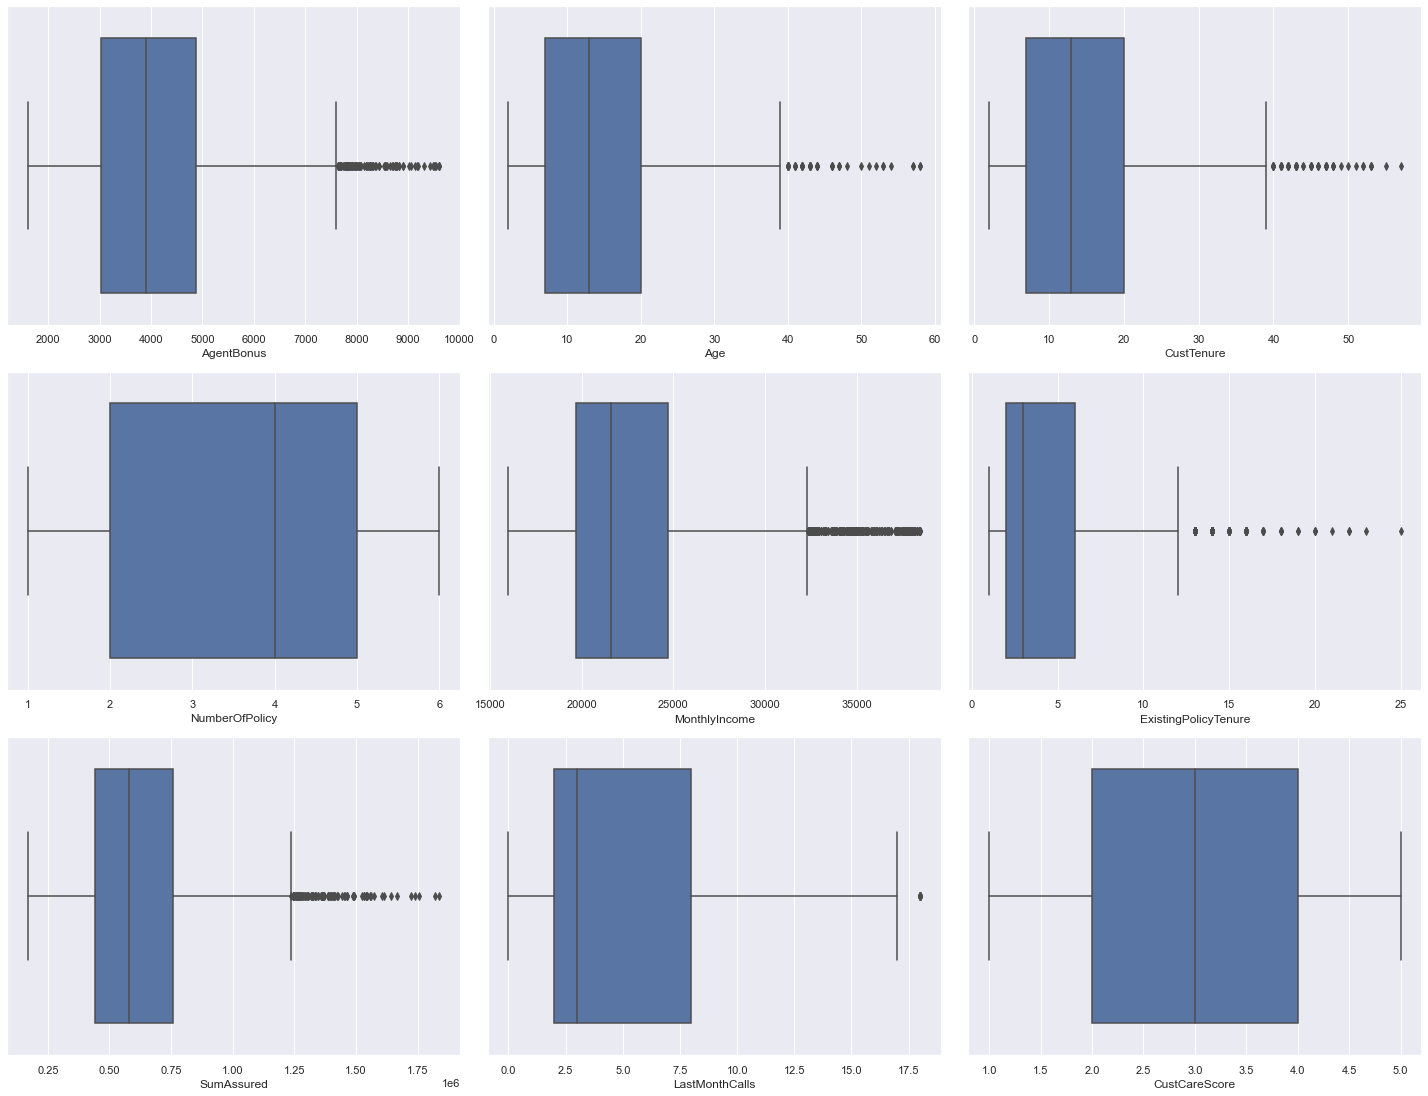

In [23]:
data_plot=Sales[num]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',Sales.shape)

In [24]:
Q1 = Sales.quantile(0.25)
Q3 = Sales.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [25]:
((Sales > UL) | (Sales < LL)).sum().sort_values(ascending=False)

MonthlyIncome           377
ExistingPolicyTenure    131
AgentBonus              100
SumAssured               96
CustTenure               52
Age                      50
LastMonthCalls           12
Designation               0
Channel                   0
Complaint                 0
CustCareScore             0
Zone                      0
EducationField            0
Gender                    0
MaritalStatus             0
NumberOfPolicy            0
Occupation                0
PaymentMethod             0
ExistingProdType          0
dtype: int64

In [26]:
Sales.describe()["AgentBonus"]

count    4520.000000
mean     4077.838274
std      1403.321711
min      1605.000000
25%      3027.750000
50%      3911.500000
75%      4867.250000
max      9608.000000
Name: AgentBonus, dtype: float64

Check the difference between 75% and Max value - looks like there are outliers/extreme values in the AgentBonus variable. However as we are not sure if these are real outliers, we will not treat them right now.


In [27]:
#Let's look at the distribution of price at different percentiles
print("0.5% properties have a AgentBonus lower than {0: .2f}".format(np.percentile(Sales["AgentBonus"], 0.5)))
print("  1% properties have a AgentBonus lower than {0: .2f}".format(np.percentile(Sales["AgentBonus"], 1)))
print("  5% properties have a AgentBonus lower than {0: .2f}".format(np.percentile(Sales["AgentBonus"], 5)))
print(" 10% properties have a AgentBonus lower than {0: .2f}".format(np.percentile(Sales["AgentBonus"], 10)))
print(" 60% properties have a AgentBonus lower than {0: .2f}".format(np.percentile(Sales["AgentBonus"], 60)))
print(" 80% properties have a AgentBonus lower than {0: .2f}".format(np.percentile(Sales["AgentBonus"], 80)))
print(" 90% properties have a AgentBonus lower than {0: .2f}".format(np.percentile(Sales["AgentBonus"], 90)))
print(" 95% properties have a AgentBonus lower than {0: .2f}".format(np.percentile(Sales["AgentBonus"], 95)))
print(" 99% properties have a AgentBonus lower than {0: .2f}".format(np.percentile(Sales["AgentBonus"], 99)))
print("99.5% properties have a AgentBonus lower than {0: .2f}".format(np.percentile(Sales["AgentBonus"], 99.5)))
print("99.8% properties have a AgentBonus lower than {0: .2f}".format(np.percentile(Sales["AgentBonus"], 99.8)))
print("99.9% properties have a AgentBonus lower than {0: .2f}".format(np.percentile(Sales["AgentBonus"], 99.9)))

0.5% properties have a AgentBonus lower than  1755.19
  1% properties have a AgentBonus lower than  1876.38
  5% properties have a AgentBonus lower than  2158.00
 10% properties have a AgentBonus lower than  2418.00
 60% properties have a AgentBonus lower than  4286.40
 80% properties have a AgentBonus lower than  5132.60
 90% properties have a AgentBonus lower than  5917.10
 95% properties have a AgentBonus lower than  6755.50
 99% properties have a AgentBonus lower than  8234.44
99.5% properties have a AgentBonus lower than  8757.22
99.8% properties have a AgentBonus lower than  9191.58
99.9% properties have a AgentBonus lower than  9506.99


In [28]:
## We are interested in building a model to correctly predict the listing price which are greater than 0 and less
## than 6755

##Sales = Sales[(Sales.AgentBonus > 1 ) & (Sales.AgentBonus < 6755 )] 

## Let's create a range variable to understand how many records we have in different slabs

AgentBonus_range = pd.cut(Sales["AgentBonus"], 
                     bins=[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, Sales["AgentBonus"].max()], 
                     labels=["0-1000", "1000-2000", "2000-3000", "3000-4000", "4000-5000", "5000-6000", "6000-7000", "7000+"])
listings["AgentBonus_range"] = AgentBonus_range 
listings["AgentBonus_range"].value_counts().sort_index().plot(kind="bar")
plt.title("Number of Listings in each AgentBonus Range")
plt.show()

Sales["AgentBonus_range"].head(10)

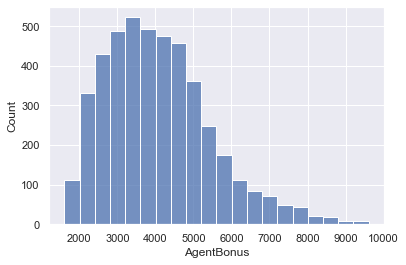

In [29]:
sns.histplot(Sales['AgentBonus'],bins=20);

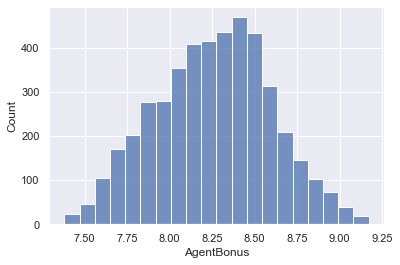

In [30]:
sns.histplot(np.log(Sales["AgentBonus"]),bins=20);

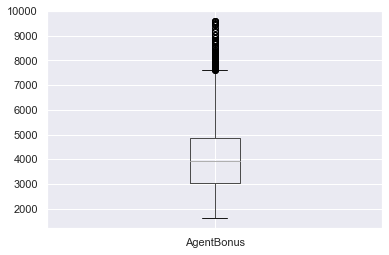

In [31]:
boxplot = Sales.boxplot(column=['AgentBonus'])

In [32]:
Sales['Age'].isna().sum()

269

In [33]:
Sales.describe()["Age"]

count    4251.000000
mean       14.494707
std         9.037629
min         2.000000
25%         7.000000
50%        13.000000
75%        20.000000
max        58.000000
Name: Age, dtype: float64

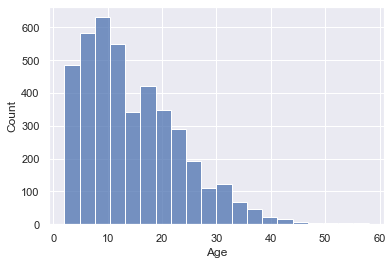

In [34]:
sns.histplot(Sales['Age'],bins=20);

Text(0.5, 1.0, 'Age vs AgentBonus')

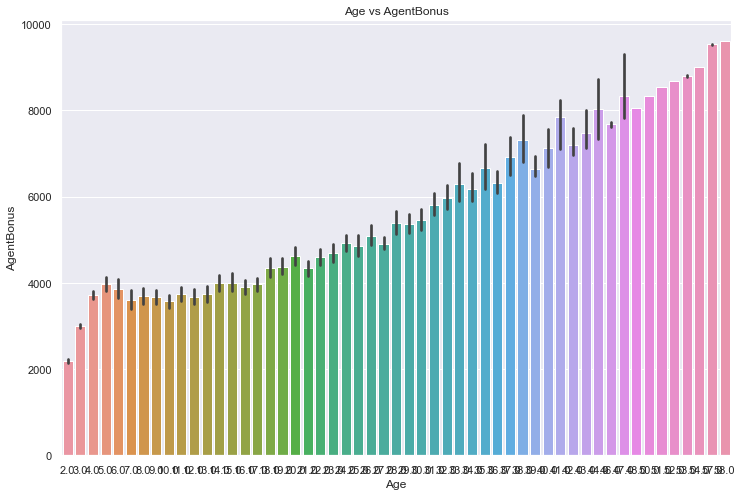

In [35]:
plt.figure(figsize = (12, 8))
sns.barplot(x = 'Age', y = 'AgentBonus', data = Sales)
plt.title("Age vs AgentBonus")

In [36]:
## is there are correlation between price and cleaning_fee
np.corrcoef(Sales.Age,Sales.AgentBonus)## Correlation is not high

array([[nan, nan],
       [nan,  1.]])

In [37]:
Sales['Channel'].isna().sum()

0

In [38]:
Sales['Channel'].value_counts().sort_values(ascending=True)

Online                  468
Third Party Partner     858
Agent                  3194
Name: Channel, dtype: int64

In [39]:
Sales['Channel'] = Sales['Channel'].apply(lambda x: x.replace("Third Party Partner", "Third_Party_Partner")) # to Third_Party_Partnere

In [40]:
Sales['Channel'].value_counts().sort_values(ascending=True)

Online                  468
Third_Party_Partner     858
Agent                  3194
Name: Channel, dtype: int64

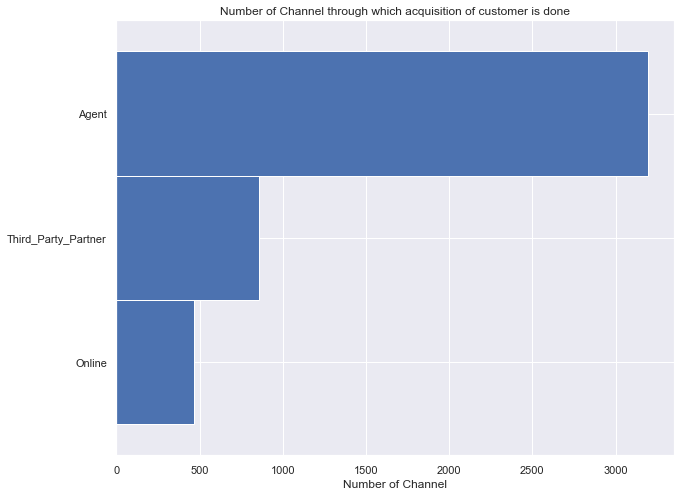

In [41]:
freq = Sales['Channel'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("Number of Channel through which acquisition of customer is done")
plt.xlabel('Number of Channel')
plt.show()

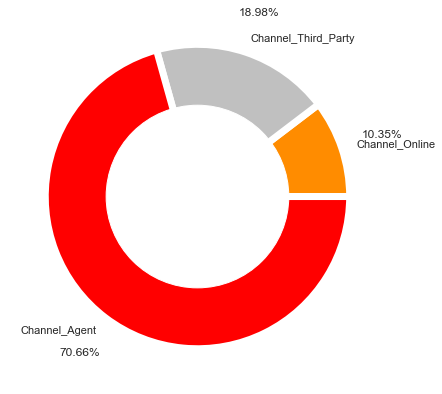

In [42]:
Channel_Online    = Sales.Channel.value_counts()['Online']
Channel_Third_Party = Sales.Channel.value_counts()['Third_Party_Partner']
Channel_Agent   = Sales.Channel.value_counts()['Agent']
names = ['Channel_Online','Channel_Third_Party','Channel_Agent']
size  = [Channel_Online, Channel_Third_Party,Channel_Agent]
# create a pie chart
plt.pie(size, labels=names, colors=['darkorange','silver','red'], 
        autopct='%.2f%%', pctdistance=1.28,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

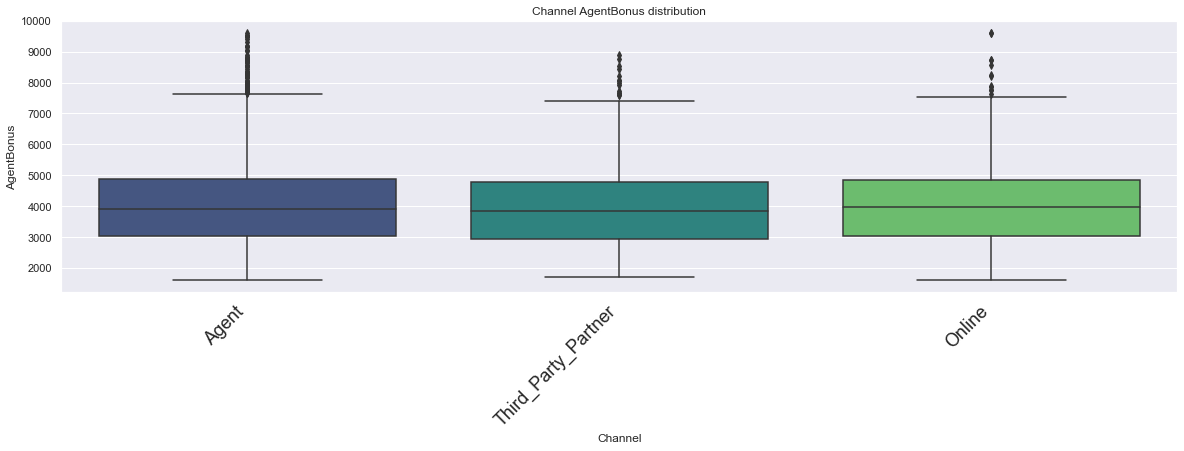

In [43]:
## Let's check if being a Channel has any AgentBonus impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Channel", y="AgentBonus", data=Sales, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Channel AgentBonus distribution')
chart;

Judging from the above boxplot, Channel  has no visible impact on the AgentBonus. We can definitely try out appropriate Hypothesis Tests to confirm this.

In [44]:
Sales['Occupation'].value_counts().sort_values(ascending=True)

Free Lancer           2
Laarge Business     153
Large Business      255
Small Business     1918
Salaried           2192
Name: Occupation, dtype: int64

In [45]:
Sales['Occupation'] = Sales['Occupation'].apply(lambda x: x.replace("Laarge Business", "Large Business")) # Remove Laarge Business
Sales['Occupation'] = Sales['Occupation'].apply(lambda x: x.replace("Large Business", "Large_Business")) # to Large_Business
Sales['Occupation'] = Sales['Occupation'].apply(lambda x: x.replace("Small Business", "Small_Business")) # Small_Business
Sales['Occupation'] = Sales['Occupation'].apply(lambda x: x.replace("Free Lancer", "Free_Lancer")) # Free_Lancer




In [46]:
Sales['Occupation'].value_counts().sort_values(ascending=True)

Free_Lancer          2
Large_Business     408
Small_Business    1918
Salaried          2192
Name: Occupation, dtype: int64

In [47]:
Sales['Occupation'].isna().sum()

0

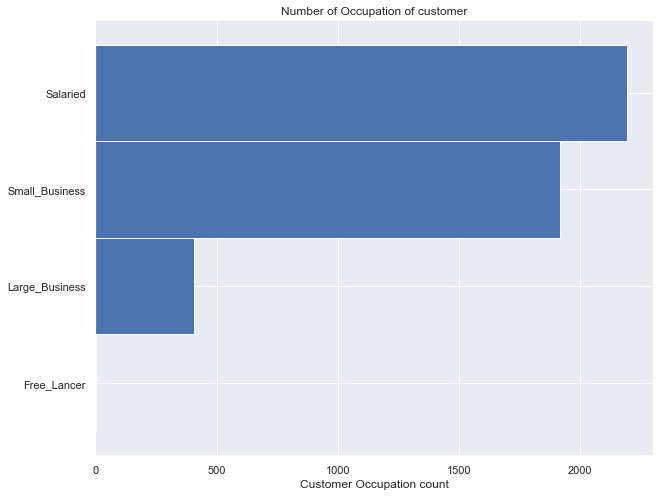

In [48]:
freq = Sales['Occupation'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("Number of Occupation of customer")
plt.xlabel('Customer Occupation count')
plt.show()

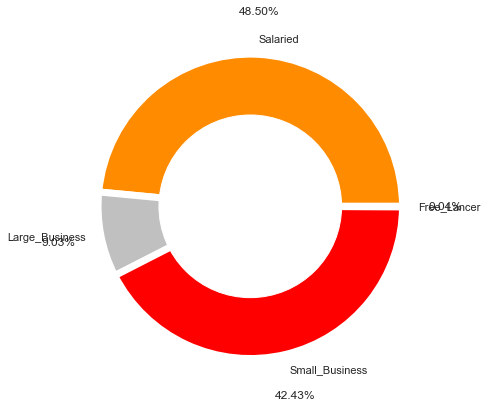

In [49]:
Salaried    = Sales.Occupation.value_counts()['Salaried']
Large_Business = Sales.Occupation.value_counts()['Large_Business']
Small_Business   = Sales.Occupation.value_counts()['Small_Business']
Free_Lancer   = Sales.Occupation.value_counts()['Free_Lancer']
names = ['Salaried','Large_Business','Small_Business','Free_Lancer']
size  = [Salaried,Large_Business,Small_Business,Free_Lancer]
# create a pie chart
plt.pie(size, labels=names, colors=['darkorange','silver','red','blue'], 
        autopct='%.2f%%', pctdistance=1.28,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

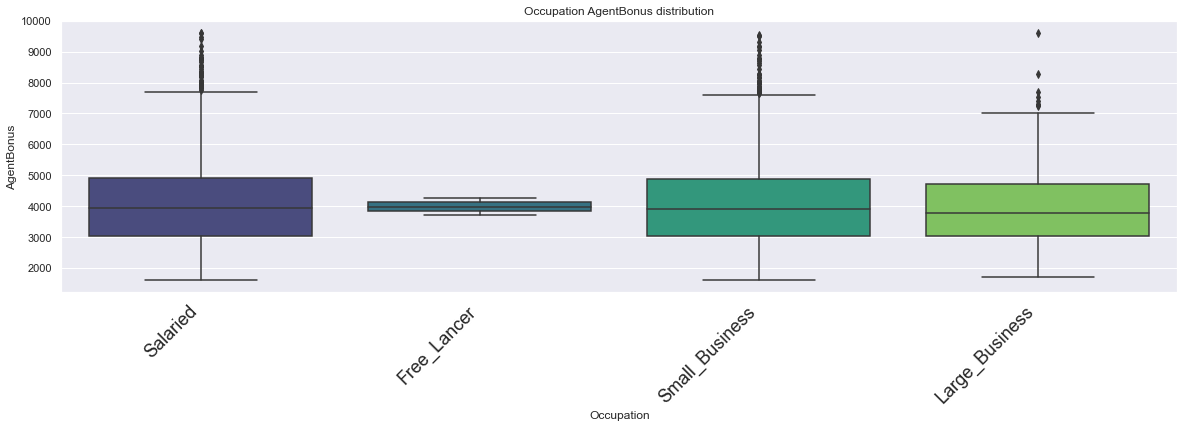

In [50]:
## Let's check if being a Occupation has any AgentBonus impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Occupation", y="AgentBonus", data=Sales, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Occupation AgentBonus distribution')
chart;

Judging from the above boxplot, being a Occupation has no visible impact on the AgentBonus. We can definitely try out appropriate Hypothesis Tests to confirm this.

In [51]:
Sales['EducationField'].isna().sum()

0

In [52]:
Sales['EducationField'].value_counts().sort_values(ascending=True)

MBA                 74
UG                 230
Post Graduate      252
Engineer           408
Diploma            496
Under Graduate    1190
Graduate          1870
Name: EducationField, dtype: int64

In [53]:
Sales['EducationField'] = Sales['EducationField'].apply(lambda x: x.replace("UG", "Under Graduate")) # Remove UG
Sales['EducationField'] = Sales['EducationField'].apply(lambda x: x.replace("Under Graduate", "Under_Graduate")) # to nder_Graduate
Sales['EducationField'] = Sales['EducationField'].apply(lambda x: x.replace("Post Graduate", "Post_Graduate")) # to nder_Graduate




In [54]:
Sales['EducationField'].value_counts().sort_values(ascending=True)

MBA                 74
Post_Graduate      252
Engineer           408
Diploma            496
Under_Graduate    1420
Graduate          1870
Name: EducationField, dtype: int64

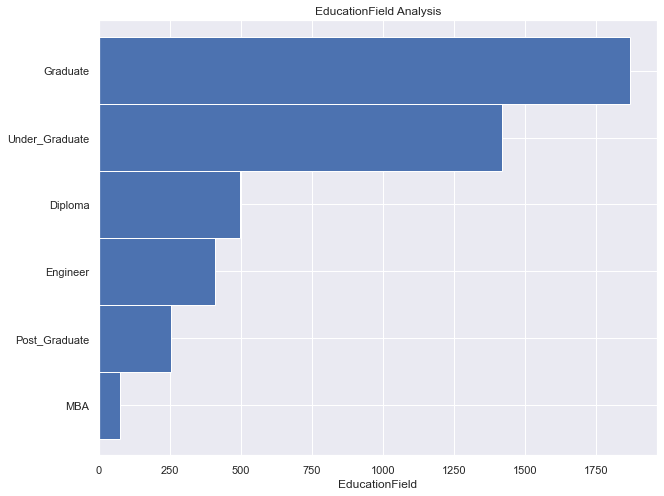

In [55]:
freq = Sales['EducationField'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("EducationField Analysis")
plt.xlabel('EducationField')
plt.show()

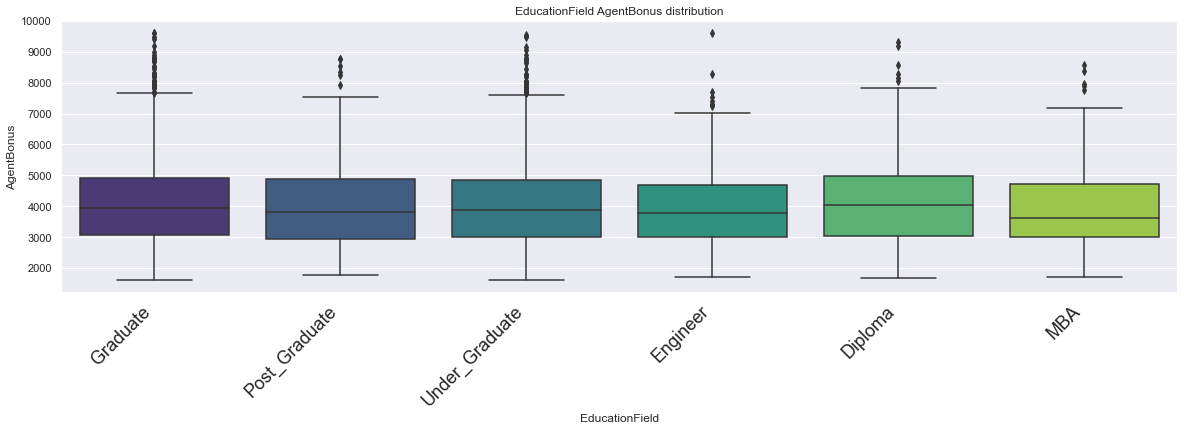

In [56]:
## Let's check if being a EducationField has any AgentBonus impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="EducationField", y="AgentBonus", data=Sales, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('EducationField AgentBonus distribution')
chart;

In [57]:
Sales['Gender'].isna().sum()

0

In [58]:
Sales['Gender'].value_counts().sort_values(ascending=True)

Fe male     325
Female     1507
Male       2688
Name: Gender, dtype: int64

In [59]:
Sales['Gender'] = Sales['Gender'].apply(lambda x: x.replace("Fe male", "Female")) # Remove Fe male
##Sales['Gender'] = Sales['Gender'].apply(lambda x: x.replace("Female", "Female"))



In [60]:
Sales['Gender'].value_counts().sort_values(ascending=True)

Female    1832
Male      2688
Name: Gender, dtype: int64

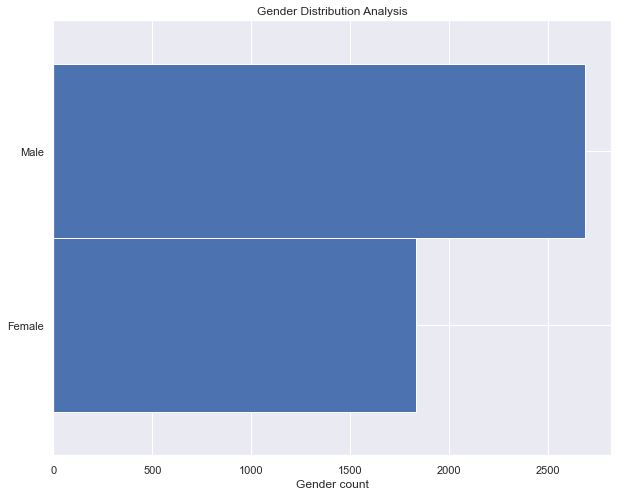

In [61]:
freq = Sales['Gender'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("Gender Distribution Analysis")
plt.xlabel('Gender count')
plt.show()

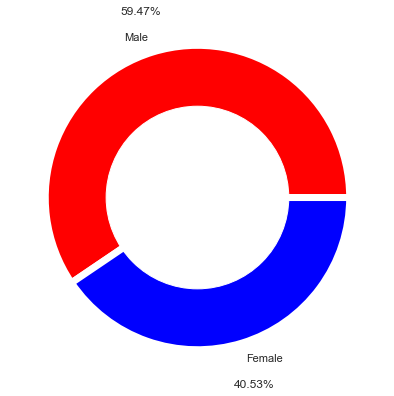

In [62]:
Male    = Sales.Gender.value_counts()['Male']
Female = Sales.Gender.value_counts()['Female']
names = ['Male','Female']
size  = [Male,Female]
# create a pie chart
plt.pie(size, labels=names, colors=['red','blue'],
        autopct='%.2f%%', pctdistance=1.28,
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(7,7)
fig.gca().add_artist(my_circle)
plt.show()

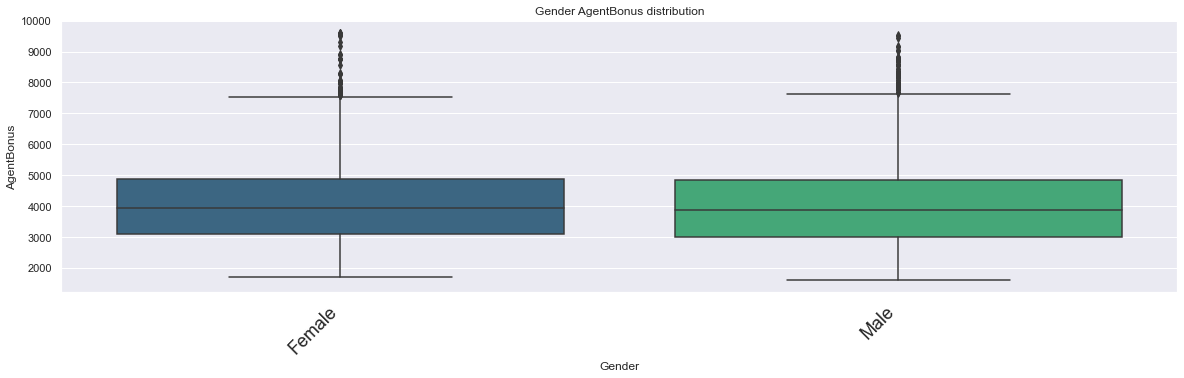

In [63]:
## Let's check if being a EducationField has any price impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Gender", y="AgentBonus", data=Sales, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Gender AgentBonus distribution')
chart;

In [64]:
Sales['ExistingProdType'].isna().sum()

0

In [65]:
Sales['ExistingProdType'].value_counts().sort_values(ascending=True)

6     123
1     183
2     221
5     708
3    1369
4    1916
Name: ExistingProdType, dtype: int64

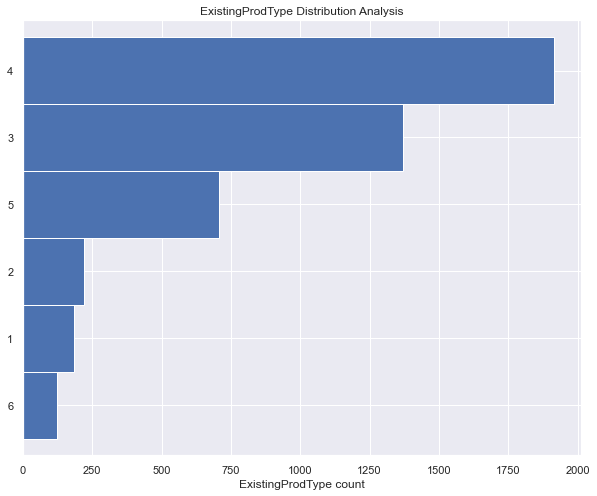

In [66]:
freq = Sales['ExistingProdType'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("ExistingProdType Distribution Analysis")
plt.xlabel('ExistingProdType count')
plt.show()

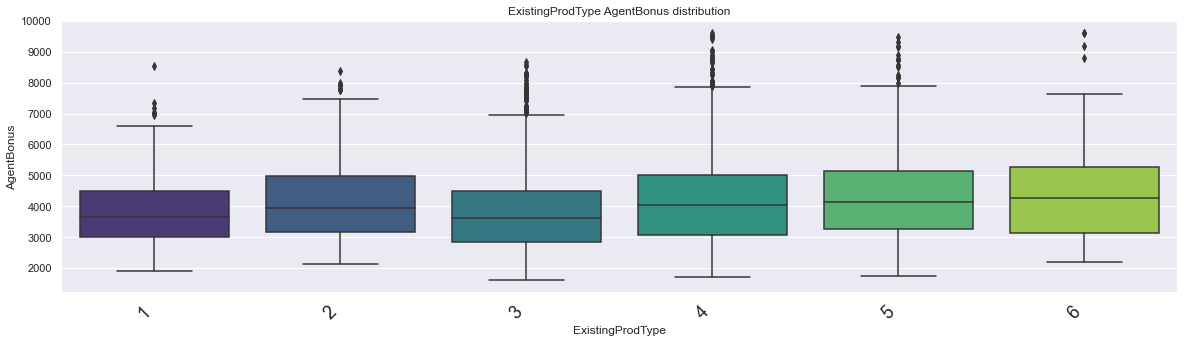

In [67]:
## Let's check if being a ExistingProdType has any AgentBonus impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="ExistingProdType", y="AgentBonus", data=Sales, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('ExistingProdType AgentBonus distribution')
chart;

In [68]:
Sales['Designation'].isna().sum()

0

In [69]:
Sales['Designation'].value_counts().sort_values(ascending=True)

Exe                127
VP                 226
AVP                336
Senior Manager     676
Executive         1535
Manager           1620
Name: Designation, dtype: int64

In [70]:
Sales['Designation'] = Sales['Designation'].apply(lambda x: x.replace("Senior Manager", "Senior_Manager")) # to Senior Manager
Sales['Designation'] = Sales['Designation'].apply(lambda x: x.replace("Executive", "Exe")) # to Exe



In [71]:
Sales['Designation'] = Sales['Designation'].apply(lambda x: x.replace("Exe", "Executive")) # to Exe

In [72]:
Sales['Designation'].value_counts().sort_values(ascending=True)

VP                 226
AVP                336
Senior_Manager     676
Manager           1620
Executive         1662
Name: Designation, dtype: int64

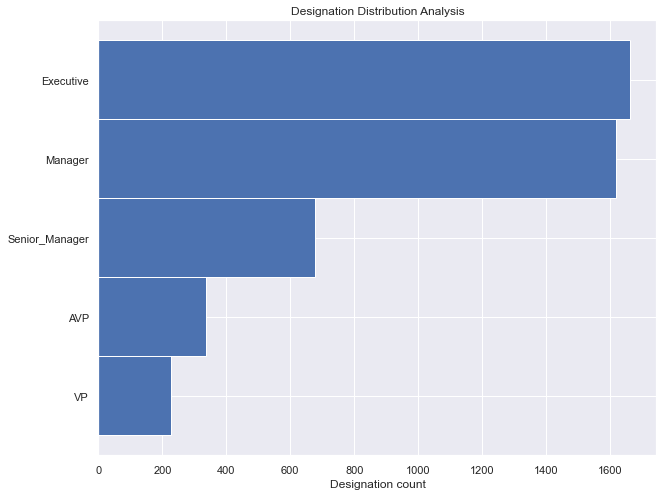

In [73]:
freq = Sales['Designation'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("Designation Distribution Analysis")
plt.xlabel('Designation count')
plt.show()

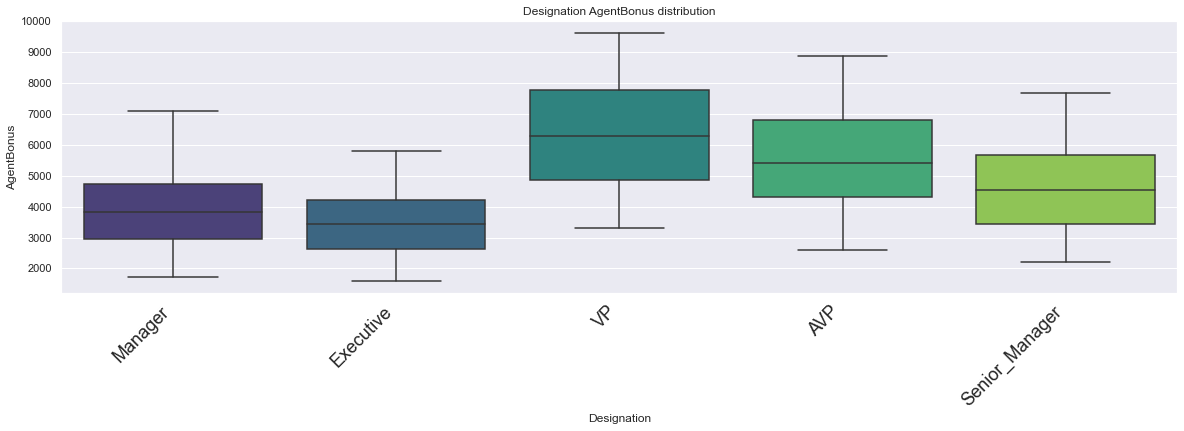

In [74]:
## Let's check if being a Designation has any AgentBonus impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Designation", y="AgentBonus", data=Sales, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Designation AgentBonus distribution')
chart;

In [75]:
Sales['NumberOfPolicy'].isna().sum()

45

In [76]:
Sales['NumberOfPolicy'].value_counts().sort_values(ascending=True)

6.0     437
1.0     438
2.0     711
5.0     856
3.0     939
4.0    1094
Name: NumberOfPolicy, dtype: int64

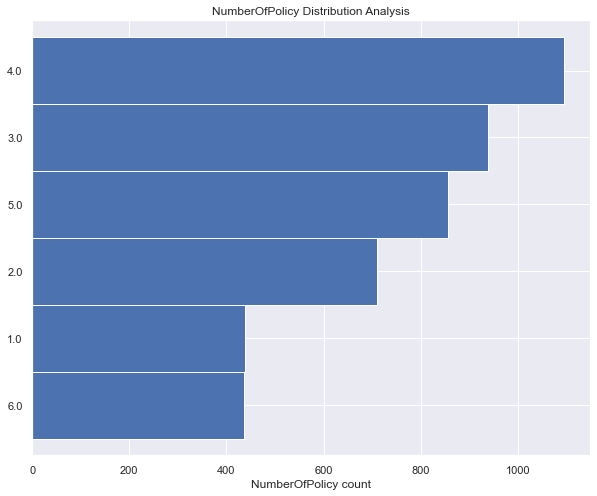

In [77]:
freq = Sales['NumberOfPolicy'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("NumberOfPolicy Distribution Analysis")
plt.xlabel('NumberOfPolicy count')
plt.show()

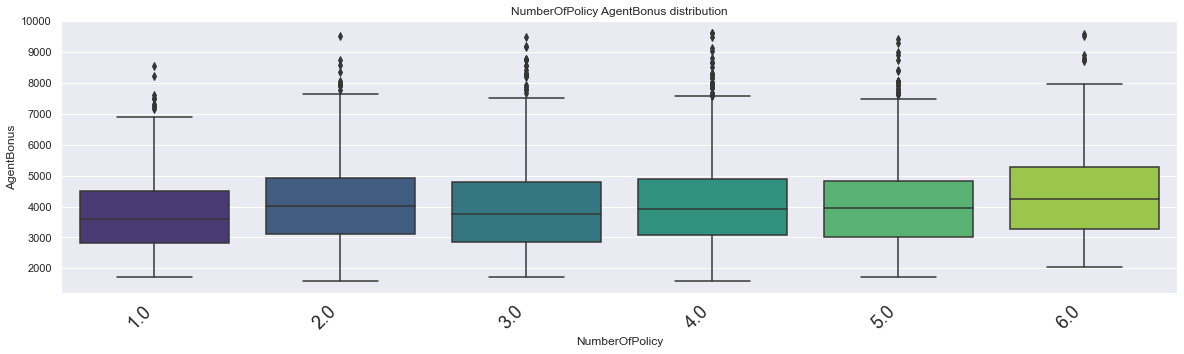

In [78]:
## Let's check if being a EducationField has any price impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="NumberOfPolicy", y="AgentBonus", data=Sales, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('NumberOfPolicy AgentBonus distribution')
chart;

In [79]:
Sales['MaritalStatus'].isna().sum()


0

In [80]:
Sales['MaritalStatus'].value_counts().sort_values(ascending=True)

Unmarried     194
Divorced      804
Single       1254
Married      2268
Name: MaritalStatus, dtype: int64

In [81]:
Sales['MaritalStatus'] = Sales['MaritalStatus'].apply(lambda x: x.replace("Unmarried", "Single")) # to Single


In [82]:
Sales['MaritalStatus'].value_counts().sort_values(ascending=True)

Divorced     804
Single      1448
Married     2268
Name: MaritalStatus, dtype: int64

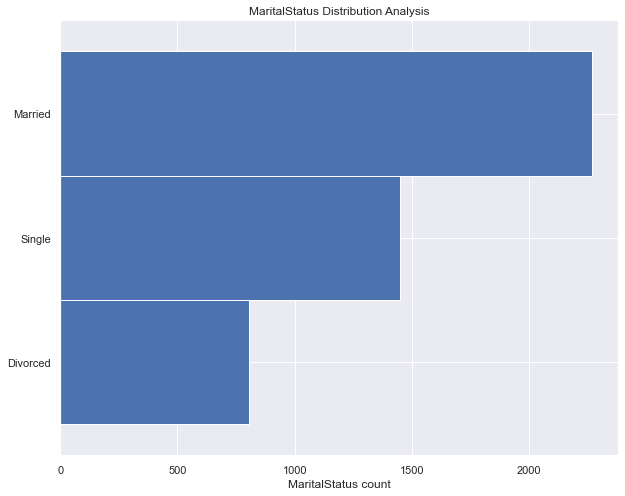

In [83]:
freq = Sales['MaritalStatus'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("MaritalStatus Distribution Analysis")
plt.xlabel('MaritalStatus count')
plt.show()

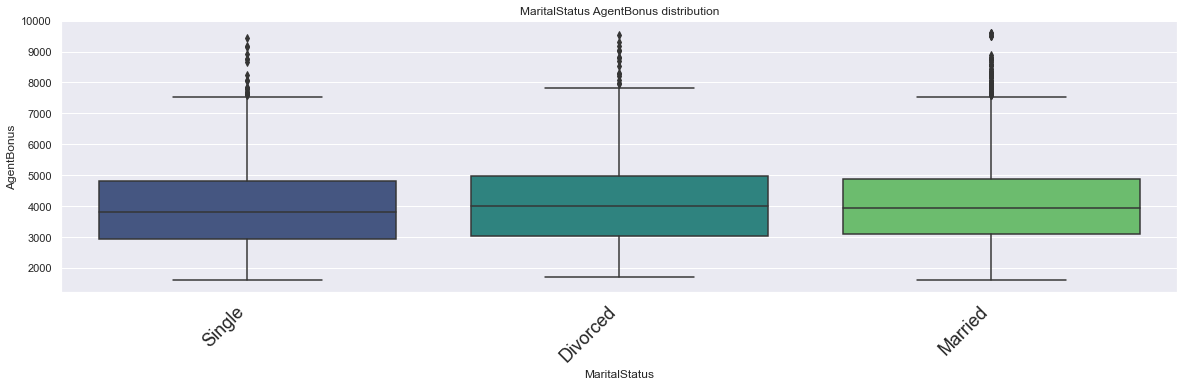

In [84]:
## Let's check if being a MaritalStatus has any AgentBonus impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="MaritalStatus", y="AgentBonus", data=Sales, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('MaritalStatus AgentBonus distribution')
chart;

In [85]:
Sales['Complaint'].isna().sum()

0

In [86]:
Sales['Complaint'].value_counts().sort_values(ascending=True)

1    1298
0    3222
Name: Complaint, dtype: int64

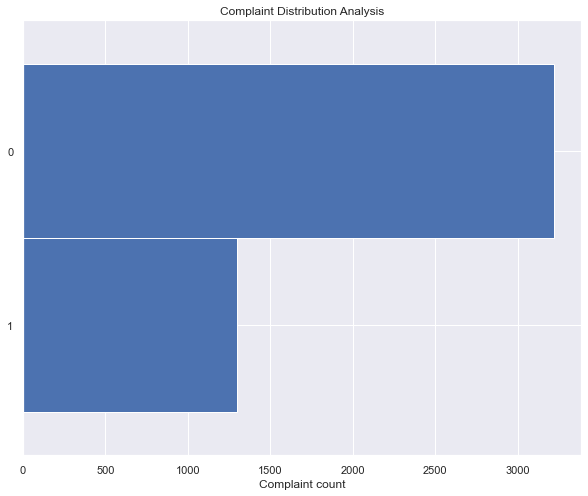

In [87]:
freq = Sales['Complaint'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("Complaint Distribution Analysis")
plt.xlabel('Complaint count')
plt.show()

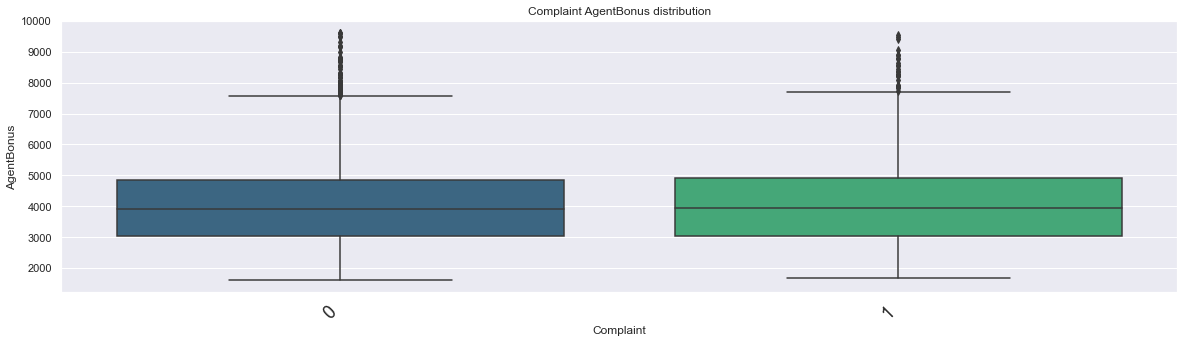

In [88]:
## Let's check if being a Complaint has any AgentBonus impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Complaint", y="AgentBonus", data=Sales, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Complaint AgentBonus distribution')
chart;

In [89]:
Sales['ExistingPolicyTenure'].isna().sum()

184

In [90]:
Sales['ExistingPolicyTenure'].value_counts().sort_values(ascending=True)

25.0      1
23.0      1
21.0      1
22.0      2
19.0      2
20.0      3
18.0      4
17.0      6
15.0     16
16.0     20
14.0     36
13.0     39
12.0     56
11.0     65
10.0     93
9.0     132
8.0     180
7.0     194
6.0     263
5.0     381
4.0     460
3.0     554
2.0     837
1.0     990
Name: ExistingPolicyTenure, dtype: int64

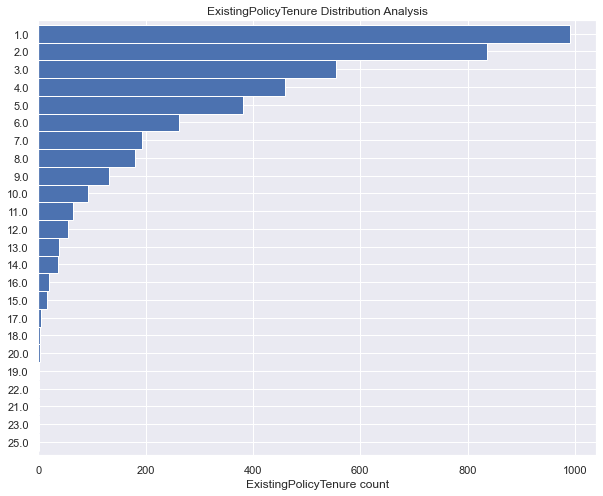

In [91]:
freq = Sales['ExistingPolicyTenure'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("ExistingPolicyTenure Distribution Analysis")
plt.xlabel('ExistingPolicyTenure count')
plt.show()

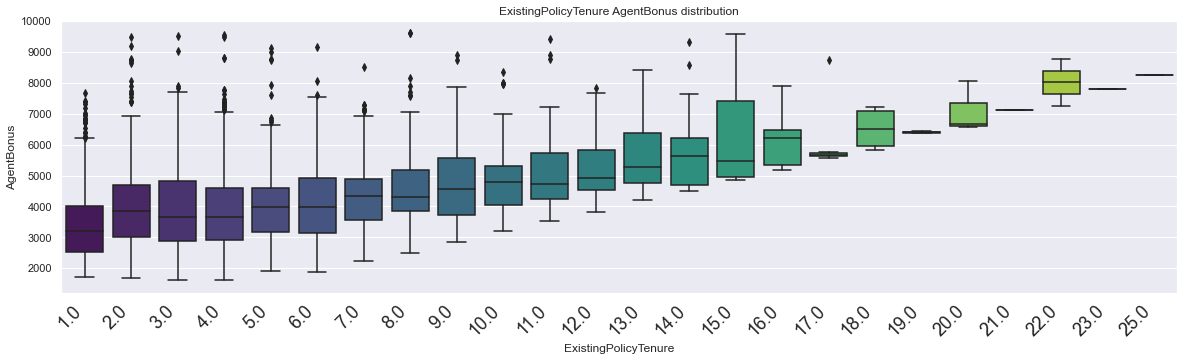

In [92]:
## Let's check if being a ExistingPolicyTenure has any AgentBonus impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="ExistingPolicyTenure", y="AgentBonus", data=Sales, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('ExistingPolicyTenure AgentBonus distribution')
chart;

In [93]:
Sales['Zone'].isna().sum()

0

In [94]:
Sales['Zone'].value_counts().sort_values(ascending=True)

South       6
East       64
North    1884
West     2566
Name: Zone, dtype: int64

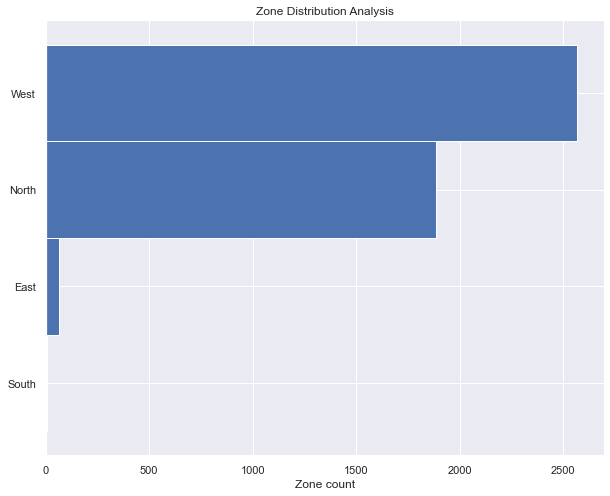

In [95]:
freq = Sales['Zone'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("Zone Distribution Analysis")
plt.xlabel('Zone count')
plt.show()

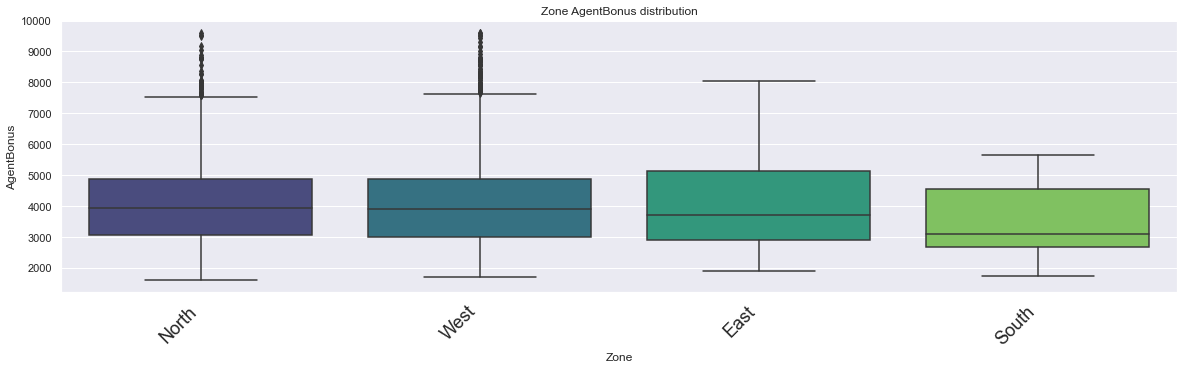

In [96]:
## Let's check if being a Zone has any AgentBonus impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="Zone", y="AgentBonus", data=Sales, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('Zone AgentBonus distribution')
chart;

In [97]:
Sales['PaymentMethod'].isna().sum()

0

In [98]:
Sales['PaymentMethod'].value_counts().sort_values(ascending=True)

Quarterly        76
Monthly         354
Yearly         1434
Half Yearly    2656
Name: PaymentMethod, dtype: int64

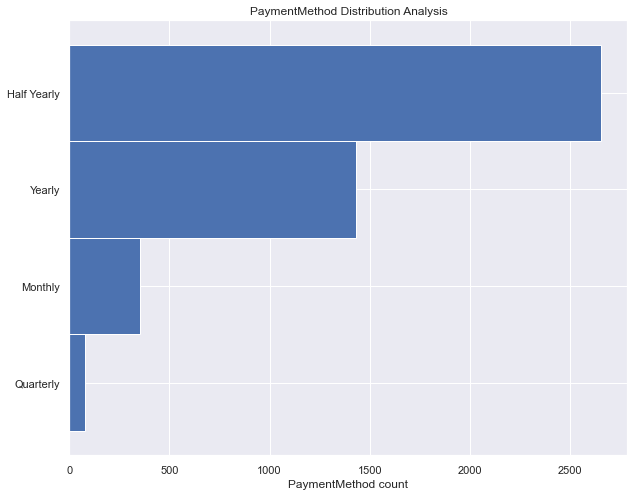

In [99]:
freq = Sales['PaymentMethod'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("PaymentMethod Distribution Analysis")
plt.xlabel('PaymentMethod count')
plt.show()

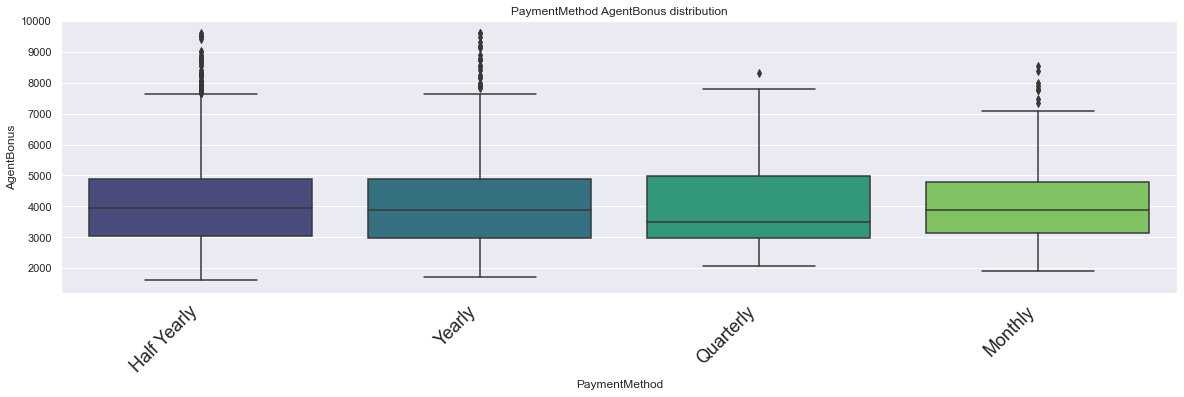

In [100]:
## Let's check if being a PaymentMethod has any AgentBonus impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="PaymentMethod", y="AgentBonus", data=Sales, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('PaymentMethod AgentBonus distribution')
chart;

In [101]:
Sales['LastMonthCalls'].isna().sum()

0

In [102]:
Sales['LastMonthCalls'].value_counts().sort_values(ascending=True)

16     10
18     12
15     14
17     15
14     30
13     51
12     61
11     76
6      97
10    141
5     199
9     263
4     357
7     377
0     408
8     497
1     532
2     647
3     733
Name: LastMonthCalls, dtype: int64

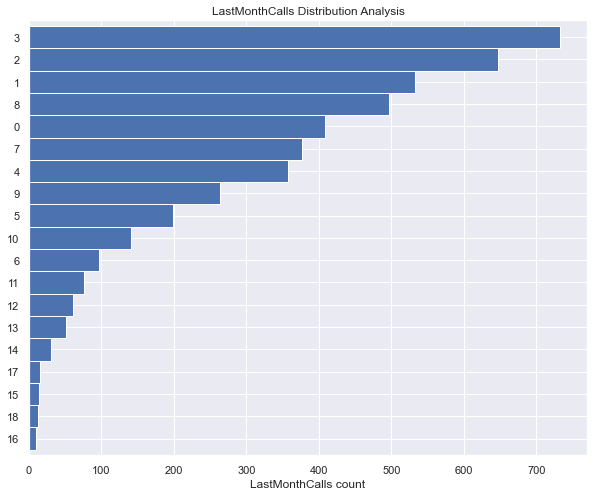

In [103]:
freq = Sales['LastMonthCalls'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("LastMonthCalls Distribution Analysis")
plt.xlabel('LastMonthCalls count')
plt.show()

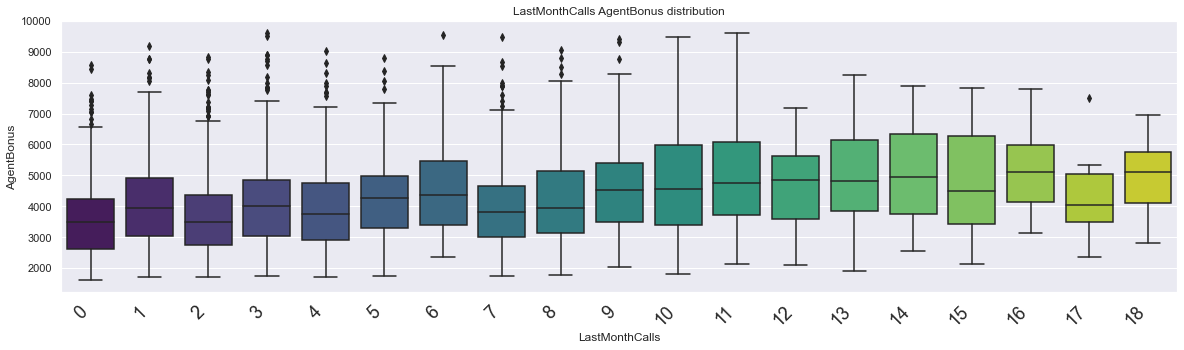

In [104]:
## Let's check if being a LastMonthCalls has any AgentBonus impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="LastMonthCalls", y="AgentBonus", data=Sales, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('LastMonthCalls AgentBonus distribution')
chart;

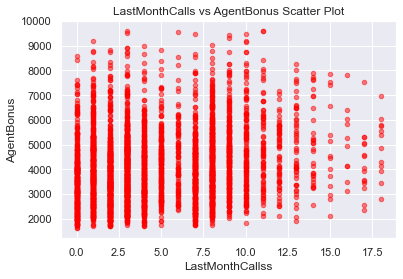

In [105]:
## Let's study the dependence of LastMonthCallss with AgentBonus

Sales.plot(kind='scatter', x='LastMonthCalls', y='AgentBonus',alpha = 0.5,color = 'red')
plt.xlabel('LastMonthCallss')              # label = name of label
plt.ylabel('AgentBonus')
plt.title('LastMonthCalls vs AgentBonus Scatter Plot')            # title = title of plot
plt.show()

In [106]:
Sales['CustCareScore'].isna().sum()

52

In [107]:
Sales['CustCareScore'].value_counts().sort_values(ascending=True)

2.0     454
4.0     826
5.0     893
1.0     928
3.0    1367
Name: CustCareScore, dtype: int64

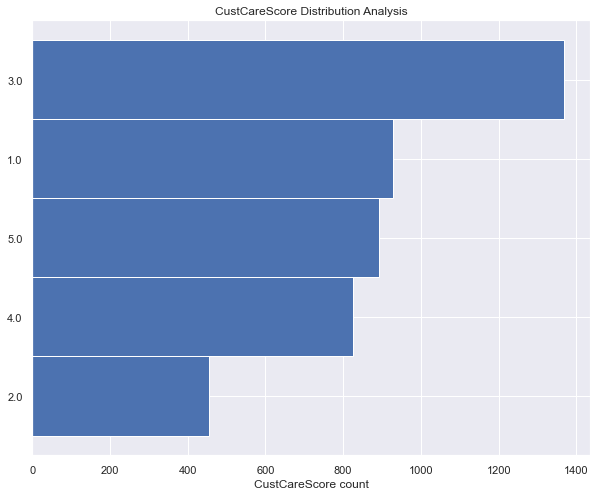

In [108]:
freq = Sales['CustCareScore'].value_counts().sort_values(ascending=True)
freq.plot.barh(figsize=(10, 8), width=1)
plt.title("CustCareScore Distribution Analysis")
plt.xlabel('CustCareScore count')
plt.show()

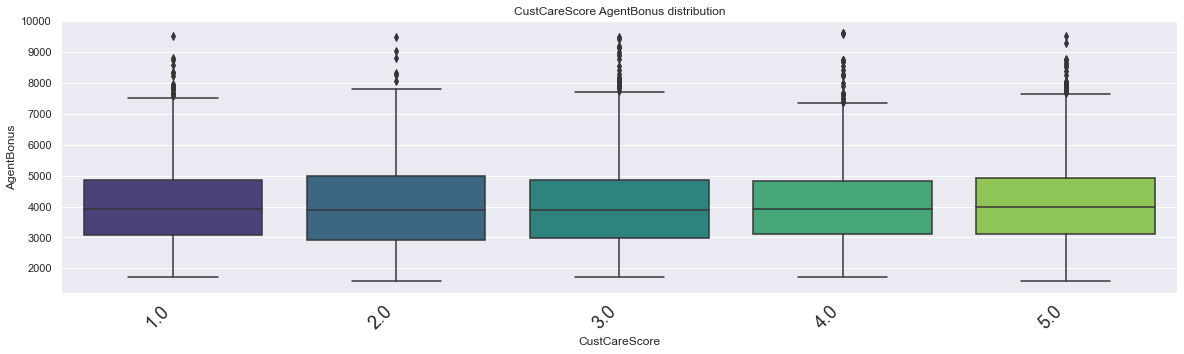

In [109]:
## Let's check if being a CustCareScore has any price impact

plt.figure(figsize=(20,5))

chart=sns.boxplot(x="CustCareScore", y="AgentBonus", data=Sales, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=18)
plt.title('CustCareScore AgentBonus distribution')
chart;

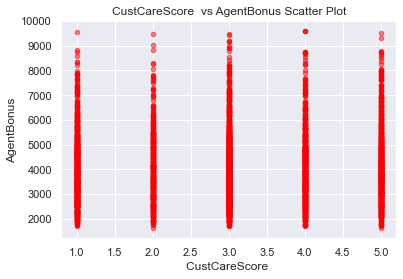

In [110]:
## Let's study the CustCareScore with AgentBonus

Sales.plot(kind='scatter', x='CustCareScore', y='AgentBonus',alpha = 0.5,color = 'red')
plt.xlabel('CustCareScore ')              # label = name of label
plt.ylabel('AgentBonus')
plt.title('CustCareScore  vs AgentBonus Scatter Plot')            # title = title of plot
plt.show()

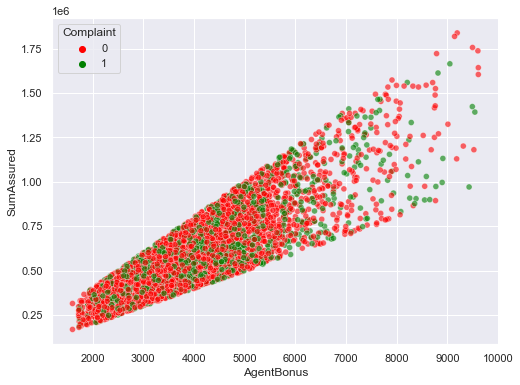

In [111]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(Sales.AgentBonus, Sales.SumAssured,hue=Sales.Complaint,palette= ['red','green'] ,alpha=0.6)
plt.show()

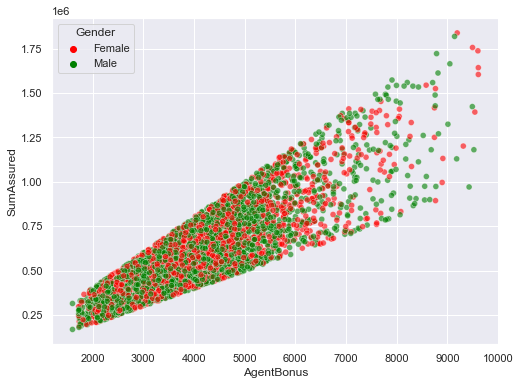

In [112]:
#Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(8,6))
sns.scatterplot(Sales.AgentBonus, Sales.SumAssured,hue=Sales.Gender,palette= ['red','green'] ,alpha=0.6)
plt.show()

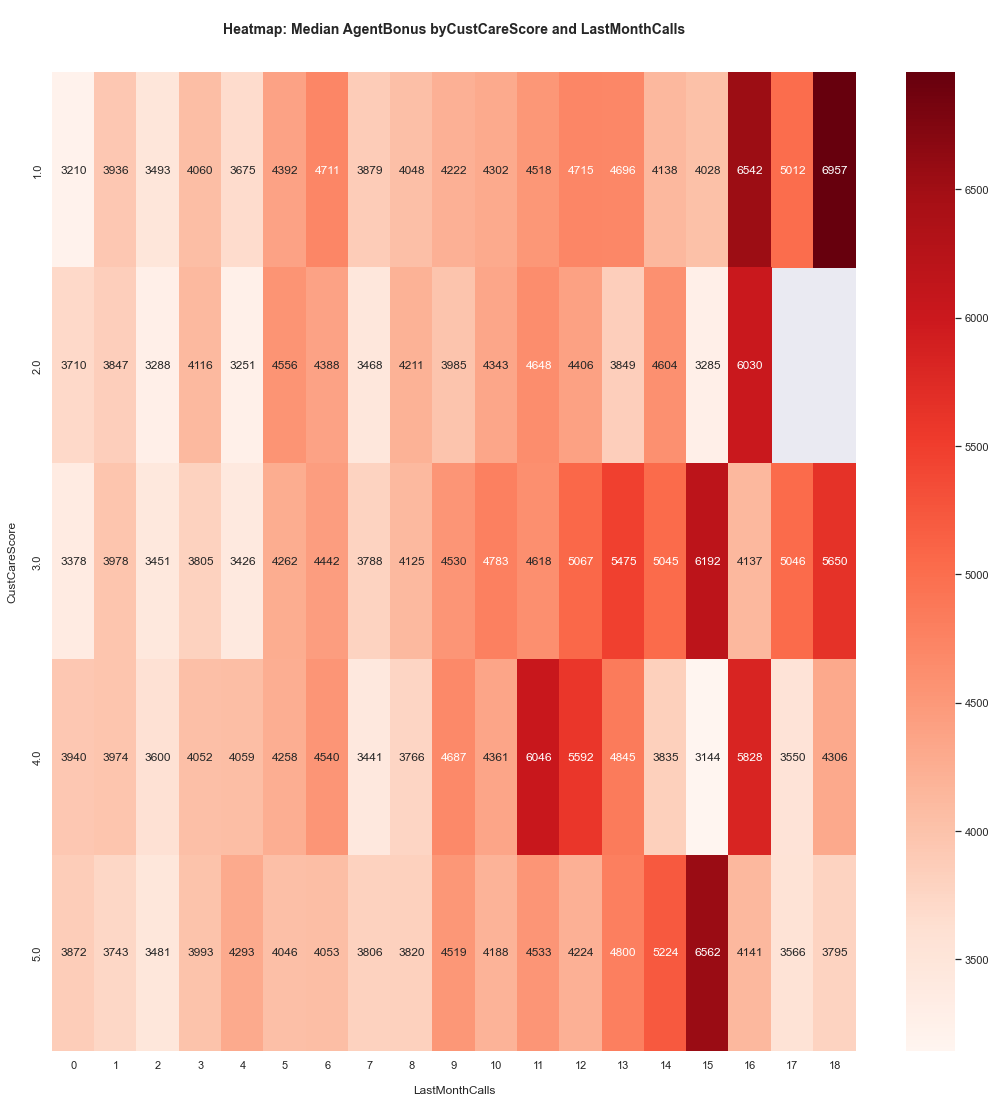

In [113]:
plt.figure(figsize=(18,18))
sns.heatmap(Sales.groupby(['CustCareScore', 'LastMonthCalls']).AgentBonus.median().unstack(), 
            cmap='Reds', annot=True, fmt=".0f")

plt.xlabel('\nLastMonthCalls', fontsize=12)
plt.ylabel('CustCareScore\n', fontsize=12)
plt.title('\nHeatmap: Median AgentBonus byCustCareScore and LastMonthCalls\n\n', fontsize=14, fontweight='bold');

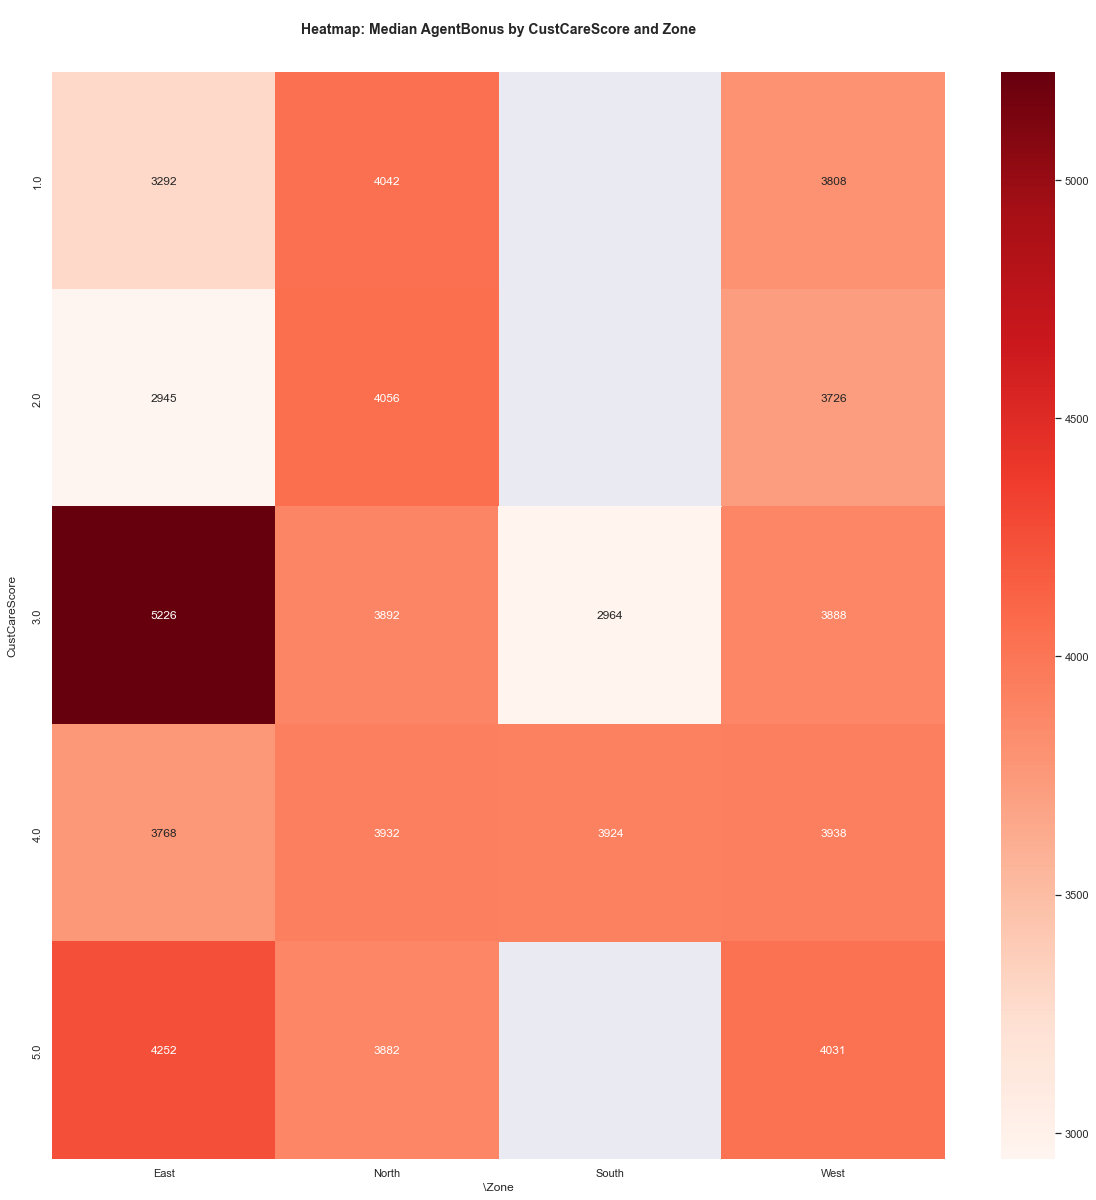

In [114]:
plt.figure(figsize=(20,20))
sns.heatmap(Sales.groupby(['CustCareScore', 'Zone']).AgentBonus.median().unstack(), 
            cmap='Reds', annot=True, fmt=".0f")

plt.xlabel('\Zone', fontsize=12)
plt.ylabel('CustCareScore\n', fontsize=12)
plt.title('\nHeatmap: Median AgentBonus by CustCareScore and Zone\n\n', fontsize=14, fontweight='bold');

In [115]:
## All features pertaining to review with missing values, imputation would be done using median

##Sales["CustCareScore"].replace(np.nan,Sales["CustCareScore"].median(),inplace=True)

In [116]:
Sales['SumAssured'].isna().sum()

154

In [117]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [118]:
Sales.describe()["SumAssured"]

count      4366.00
mean     619999.70
std      246234.82
min      168536.00
25%      439443.25
50%      578976.50
75%      758236.00
max     1838496.00
Name: SumAssured, dtype: float64

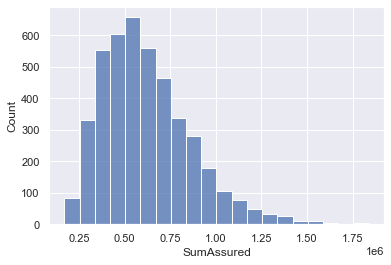

In [119]:
sns.histplot(Sales['SumAssured'],bins=20);

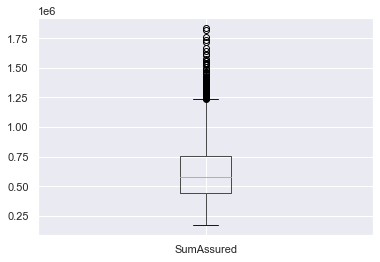

In [120]:
boxplot = Sales.boxplot(column=['SumAssured'])

In [121]:
## is there are correlation between price and cleaning_fee
np.corrcoef(Sales.SumAssured,Sales.AgentBonus)## Correlation is not high

array([[nan, nan],
       [nan,  1.]])

In [122]:
print(num)

['AgentBonus', 'Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']


In [123]:
Sales[num]

AgentBonus   Age  CustTenure  NumberOfPolicy  MonthlyIncome  \
0           4409 22.00        4.00            2.00       20993.00   
1           2214 11.00        2.00            4.00       20130.00   
2           4273 26.00        4.00            3.00       17090.00   
3           1791 11.00         nan            3.00       17909.00   
4           2955  6.00         nan            4.00       18468.00   
...          ...   ...         ...             ...            ...   
4515        3953  4.00        8.00            2.00       26355.00   
4516        2939  9.00        9.00            2.00       20991.00   
4517        3792 23.00       23.00            5.00            nan   
4518        4816 10.00       10.00            2.00       20068.00   
4519        4764 14.00       10.00            2.00       23820.00   

      ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  
0                     2.00   806761.00               5           2.00  
1                     3.00   294502.00               7           3.00  
2                     2.00         nan               0           3.00  
3                     2.00   268635.00               0           5.00  
4                     4.00   366405.00               2           5.00  
...                    ...         ...             ...            ...  
4515                  2.00   636473.00               9           1.00  
4516                  3.00   296813.00               1           3.00  
4517                  2.00   667371.00               4           1.00  
4518                  6.00   943999.00               1           5.00  
4519                  3.00   700308.00               1           3.00  

[4520 rows x 9 columns]

In [124]:
Sales_X = Sales[num].drop('AgentBonus', axis = 1)
Sales_Y = Sales[num]['AgentBonus']

In [125]:
Sales_X[((Sales_X > UL) | (Sales_X < LL))]= np.nan

In [126]:
Sales_X

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
0    22.00        4.00            2.00       20993.00                  2.00   
1    11.00        2.00            4.00       20130.00                  3.00   
2    26.00        4.00            3.00       17090.00                  2.00   
3    11.00         nan            3.00       17909.00                  2.00   
4     6.00         nan            4.00       18468.00                  4.00   
...    ...         ...             ...            ...                   ...   
4515  4.00        8.00            2.00       26355.00                  2.00   
4516  9.00        9.00            2.00       20991.00                  3.00   
4517 23.00       23.00            5.00            nan                  2.00   
4518 10.00       10.00            2.00       20068.00                  6.00   
4519 14.00       10.00            2.00       23820.00                  3.00   

      SumAssured  LastMonthCalls  CustCareScore  
0      806761.00            5.00           2.00  
1      294502.00            7.00           3.00  
2            nan            0.00           3.00  
3      268635.00            0.00           5.00  
4      366405.00            2.00           5.00  
...          ...             ...            ...  
4515   636473.00            9.00           1.00  
4516   296813.00            1.00           3.00  
4517   667371.00            4.00           1.00  
4518   943999.00            1.00           5.00  
4519   700308.00            1.00           3.00  

[4520 rows x 8 columns]

#### Let's check the number of outliers per column

In [127]:
Q1 = Sales_X.quantile(0.25)
Q3 = Sales_X.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [128]:
((Sales_X > UL) | (Sales_X < LL)).sum().sort_values(ascending=False)

ExistingPolicyTenure    214
CustTenure               20
SumAssured               17
MonthlyIncome             7
CustCareScore             0
LastMonthCalls            0
NumberOfPolicy            0
Age                       0
dtype: int64

In [129]:
Sales_X[((Sales_X > UL) | (Sales_X < LL))]= np.nan

In [130]:
Sales_X.isnull().sum()

Age                     319
CustTenure              298
NumberOfPolicy           45
MonthlyIncome           620
ExistingPolicyTenure    529
SumAssured              267
LastMonthCalls           12
CustCareScore            52
dtype: int64

In [131]:
Sales_X.isnull().sum().sum()

2142

In [132]:
##Sales_X = Sales_X.drop(['CustID'], axis = 1)

In [133]:
Sales_X.shape

(4520, 8)

In [134]:
Sales1 = pd.concat([Sales_X, Sales_Y], axis =1 )

#### Let's visually inspect the missing values in our data

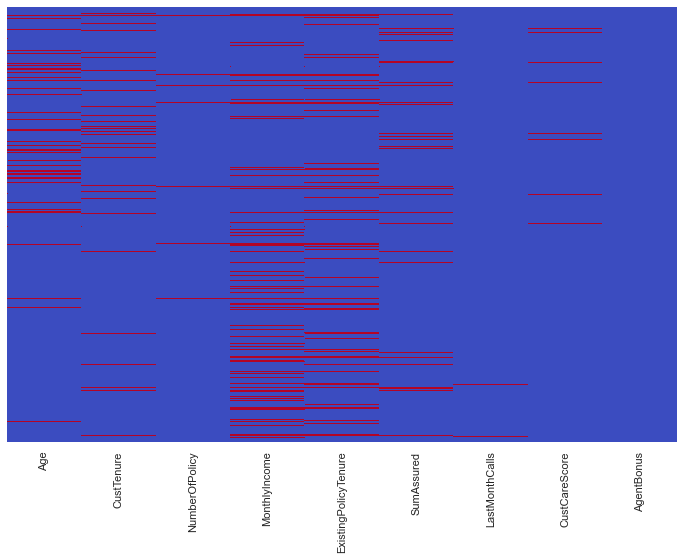

In [135]:
plt.figure(figsize = (12,8))
sns.heatmap(Sales1.isnull(), cbar = False, cmap = 'coolwarm', yticklabels = False)
plt.show()

#### We should inspect total missing values by each row.

In [136]:
Sales1.isnull().sum().sort_values(ascending = False)/Sales1.index.size

MonthlyIncome          0.14
ExistingPolicyTenure   0.12
Age                    0.07
CustTenure             0.07
SumAssured             0.06
CustCareScore          0.01
NumberOfPolicy         0.01
LastMonthCalls         0.00
AgentBonus             0.00
dtype: float64

#### Segregate the predictors and response 

In [137]:
predictors = Sales1.drop('AgentBonus', axis = 1)
response = Sales1['AgentBonus']

#### Imputing the remaining missing values

In [138]:
from sklearn.impute import KNNImputer

In [139]:
imputer = KNNImputer(n_neighbors=10)

In [140]:
Sales_imputed = pd.DataFrame(imputer.fit_transform(Sales1), columns = Sales1.columns)

In [141]:
Sales_imputed.isnull().sum()

Age                     0
CustTenure              0
NumberOfPolicy          0
MonthlyIncome           0
ExistingPolicyTenure    0
SumAssured              0
LastMonthCalls          0
CustCareScore           0
AgentBonus              0
dtype: int64

Shape before Outliers Treatment (4520, 19)


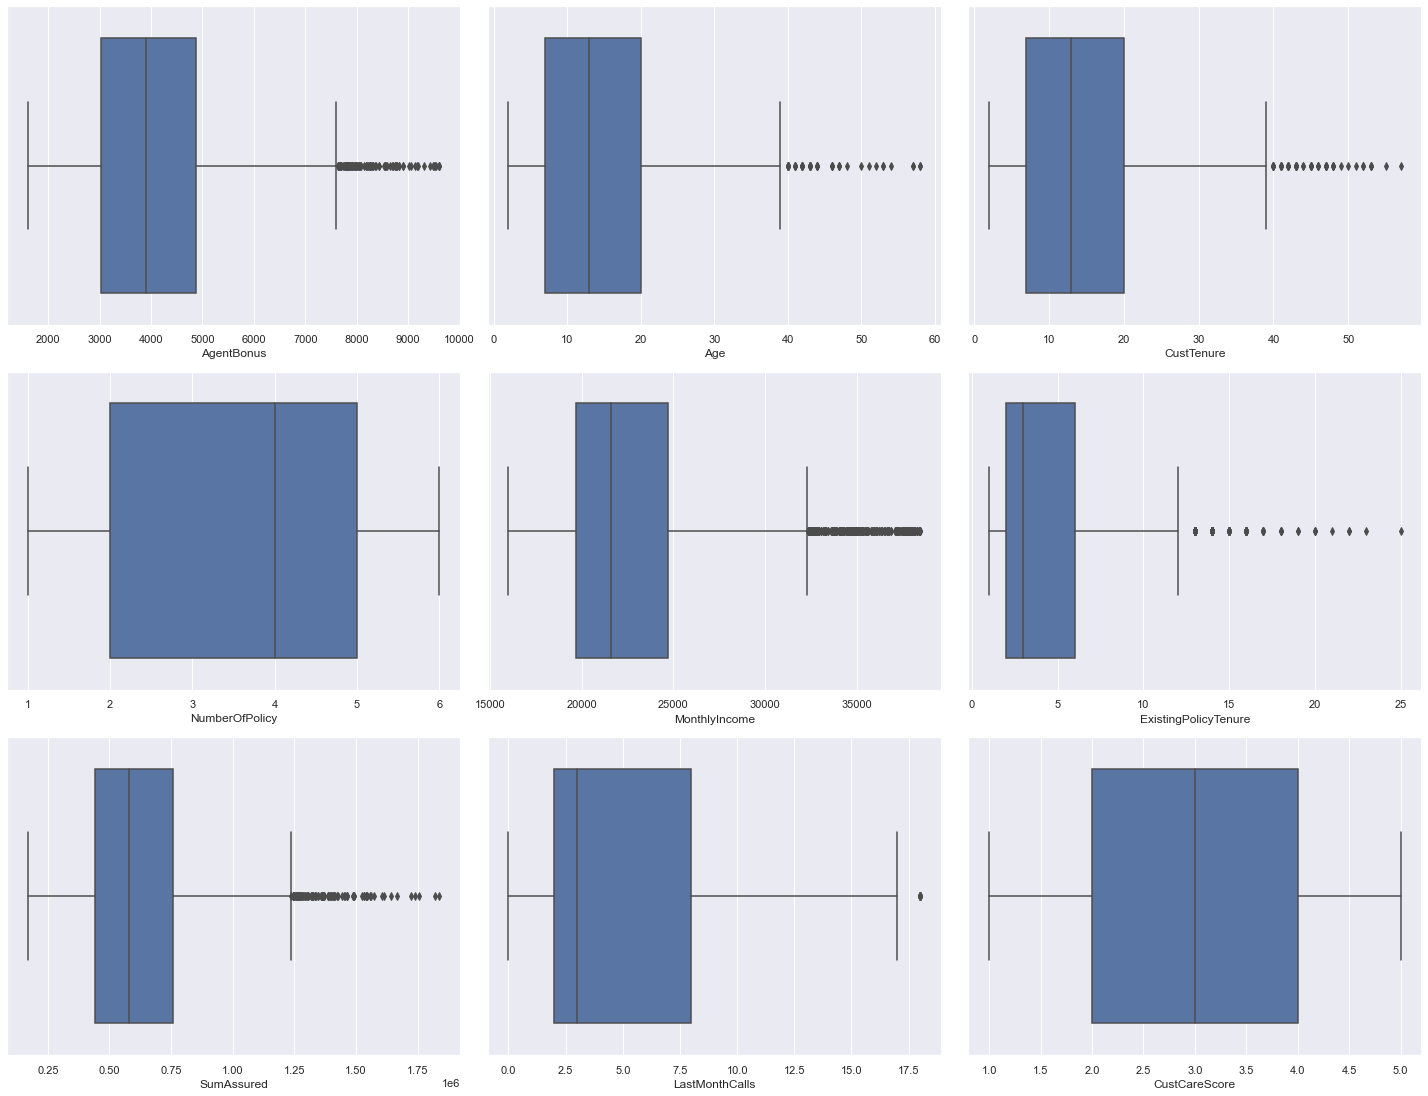

In [142]:
data_plot=Sales[num]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape before Outliers Treatment',Sales.shape)

Shape after Outliers Treatment (4520, 19)


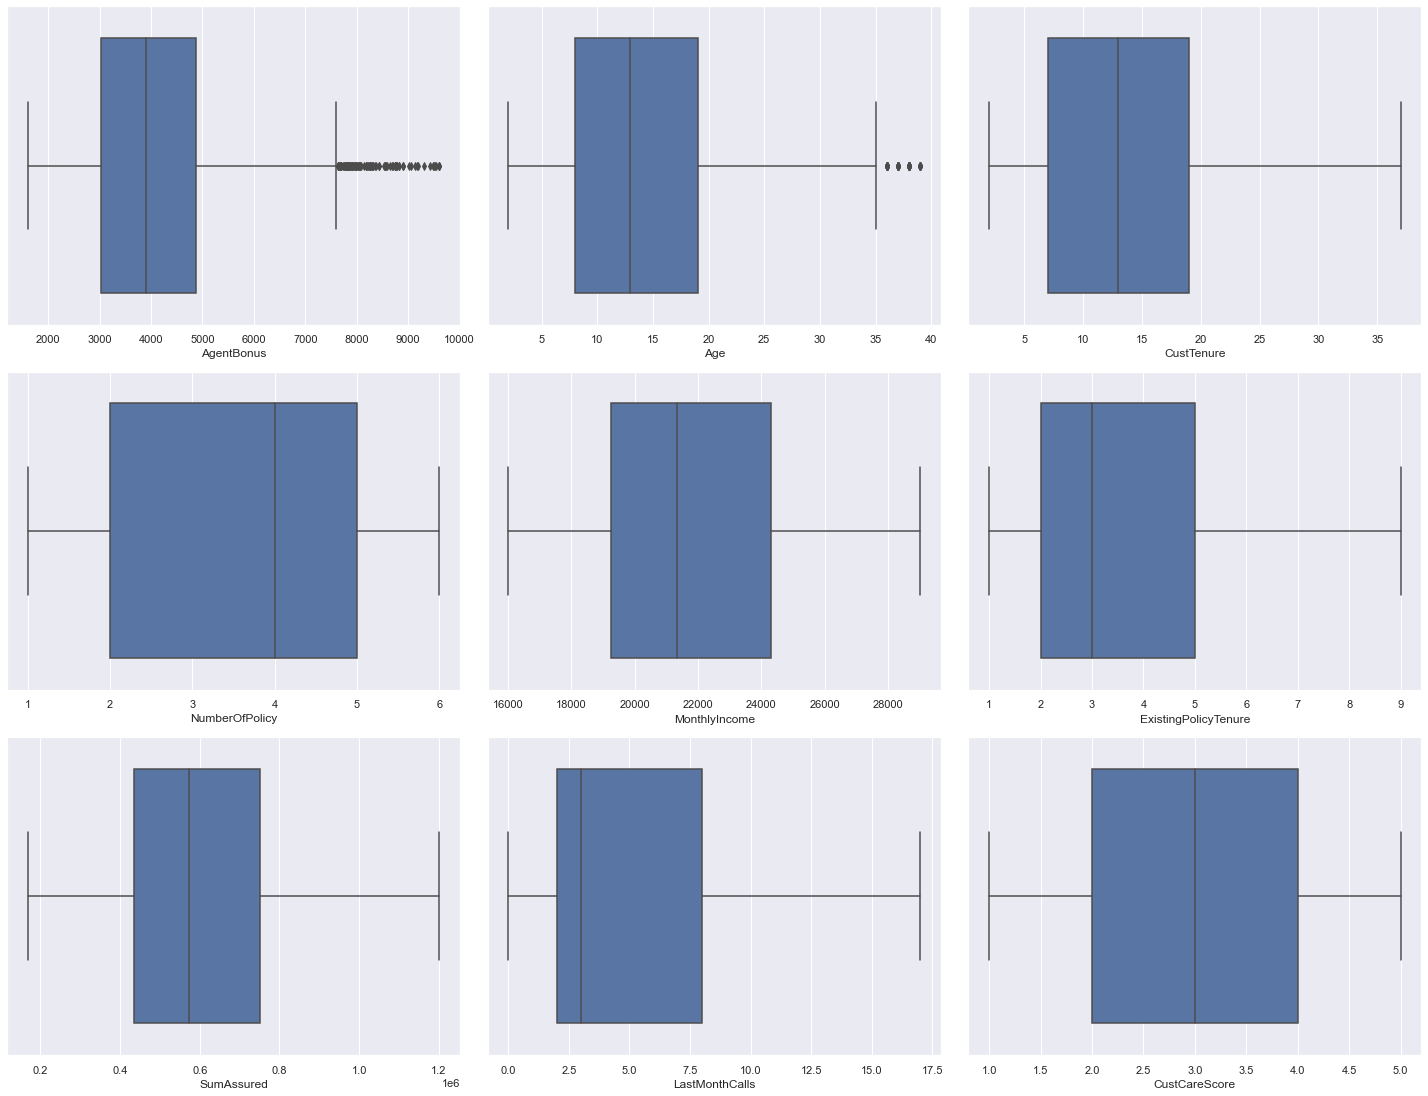

In [143]:
data_plot=Sales_imputed[num]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,3,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
print('Shape after Outliers Treatment',Sales.shape)

In [144]:
((Sales_imputed > UL) | (Sales_imputed < LL)).sum().sort_values(ascending=False)

SumAssured              0
NumberOfPolicy          0
MonthlyIncome           0
LastMonthCalls          0
ExistingPolicyTenure    0
CustTenure              0
CustCareScore           0
AgentBonus              0
Age                     0
dtype: int64

In [145]:
Sales_imputed = pd.concat([Sales_imputed, Sales[cat]], axis =1 )

In [146]:
Sales_imputed1 = Sales_imputed.copy()

In [147]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(Sales_imputed.Age)]},
                        index=[Sales.columns])  # Measure the skeweness of the required columns
Skewness

Skewness
AgentBonus                0.70
Age                       0.70
CustTenure                0.70
Channel                   0.70
Occupation                0.70
EducationField            0.70
Gender                    0.70
ExistingProdType          0.70
Designation               0.70
NumberOfPolicy            0.70
MaritalStatus             0.70
MonthlyIncome             0.70
Complaint                 0.70
ExistingPolicyTenure      0.70
SumAssured                0.70
Zone                      0.70
PaymentMethod             0.70
LastMonthCalls            0.70
CustCareScore             0.70

In [148]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import _get_covariance,anova_lm # For n-way ANOVA

In [149]:
#Interaction Effect:
model=ols('AgentBonus~C(Gender)+C(Designation)+C(Gender):C(Designation)',data=Sales_imputed).fit()
aov_table=anova_lm(model)
print(aov_table)

                              df        sum_sq      mean_sq      F  PR(>F)
C(Gender)                   1.00    8210615.62   8210615.62   5.99    0.01
C(Designation)              4.00 2704189594.13 676047398.53 493.48    0.00
C(Gender):C(Designation)    4.00    8378835.74   2094708.94   1.53    0.19
Residual                 4510.00 6178541085.28   1369964.76    nan     nan


#Interaction Effect:
model=ols('AgentBonus~C(ExistingProdType)+C(MaritalStatus)+C(ExistingProdType):C(MaritalStatus)',data=Sales_imputed).fit()
aov_table=anova_lm(model)
print(aov_table)

In [150]:
Sales_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   4520 non-null   float64
 1   CustTenure            4520 non-null   float64
 2   NumberOfPolicy        4520 non-null   float64
 3   MonthlyIncome         4520 non-null   float64
 4   ExistingPolicyTenure  4520 non-null   float64
 5   SumAssured            4520 non-null   float64
 6   LastMonthCalls        4520 non-null   float64
 7   CustCareScore         4520 non-null   float64
 8   AgentBonus            4520 non-null   float64
 9   Channel               4520 non-null   object 
 10  Occupation            4520 non-null   object 
 11  EducationField        4520 non-null   object 
 12  Gender                4520 non-null   object 
 13  ExistingProdType      4520 non-null   object 
 14  Designation           4520 non-null   object 
 15  MaritalStatus        

In [151]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [152]:
X = Sales_imputed[num].drop('AgentBonus', axis = 1)
calc_vif(X).sort_values(by = 'VIF', ascending = False).head(40)

variables   VIF
3         MonthlyIncome 23.53
5            SumAssured 14.82
2        NumberOfPolicy  6.80
7         CustCareScore  5.38
1            CustTenure  5.16
0                   Age  5.08
4  ExistingPolicyTenure  3.76
6        LastMonthCalls  2.89

In [153]:
Sales_imputed[num]

AgentBonus   Age  CustTenure  NumberOfPolicy  MonthlyIncome  \
0        4409.00 22.00        4.00            2.00       20993.00   
1        2214.00 11.00        2.00            4.00       20130.00   
2        4273.00 26.00        4.00            3.00       17090.00   
3        1791.00 11.00        5.90            3.00       17909.00   
4        2955.00  6.00        8.40            4.00       18468.00   
...          ...   ...         ...             ...            ...   
4515     3953.00  4.00        8.00            2.00       26355.00   
4516     2939.00  9.00        9.00            2.00       20991.00   
4517     3792.00 23.00       23.00            5.00       17042.30   
4518     4816.00 10.00       10.00            2.00       20068.00   
4519     4764.00 14.00       10.00            2.00       23820.00   

      ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  
0                     2.00   806761.00            5.00           2.00  
1                     3.00   294502.00            7.00           3.00  
2                     2.00   599492.70            0.00           3.00  
3                     2.00   268635.00            0.00           5.00  
4                     4.00   366405.00            2.00           5.00  
...                    ...         ...             ...            ...  
4515                  2.00   636473.00            9.00           1.00  
4516                  3.00   296813.00            1.00           3.00  
4517                  2.00   667371.00            4.00           1.00  
4518                  6.00   943999.00            1.00           5.00  
4519                  3.00   700308.00            1.00           3.00  

[4520 rows x 9 columns]

In [154]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= 'AgentBonus ~ Age+CustTenure+NumberOfPolicy+MonthlyIncome+ExistingPolicyTenure+SumAssured+LastMonthCalls+CustCareScore',data = Sales_imputed).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     1975.
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:23:36   Log-Likelihood:                -35767.
No. Observations:                4520   AIC:                         7.155e+04
Df Residuals:                    4511   BIC:                         7.161e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             -900.9176 

### Correlation Plot

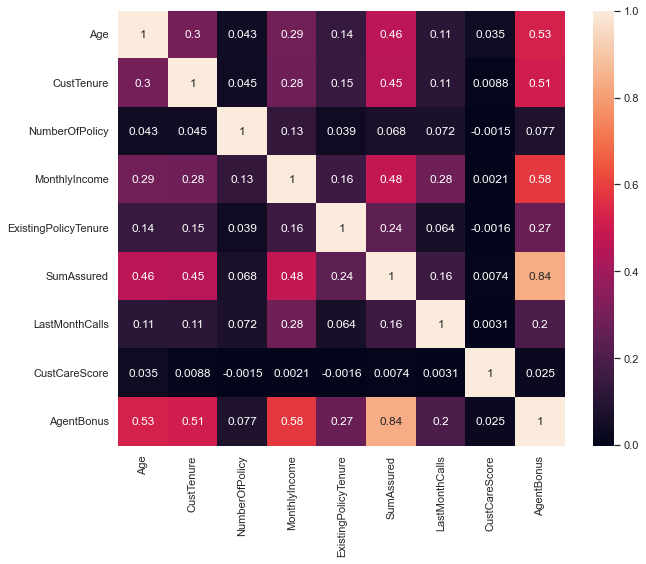

In [155]:
plt.figure(figsize=(10,8))
sns.heatmap(Sales_imputed.corr(),annot=True)
plt.show()

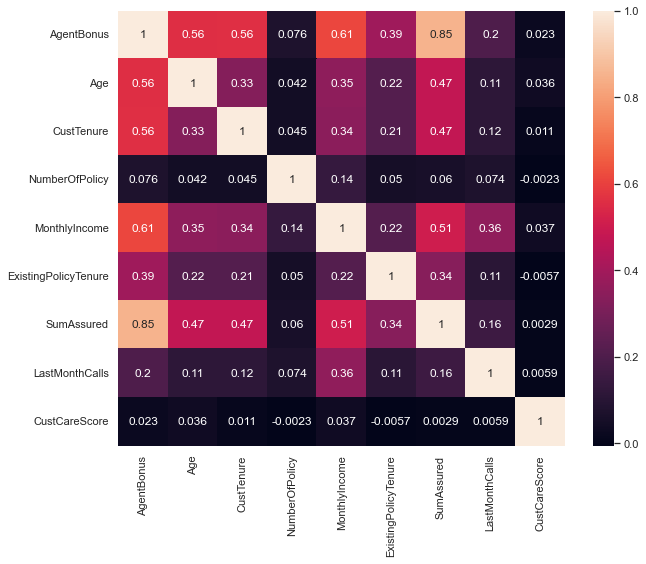

In [156]:
plt.figure(figsize=(10,8))
sns.heatmap(Sales.corr(),annot=True)
plt.show()

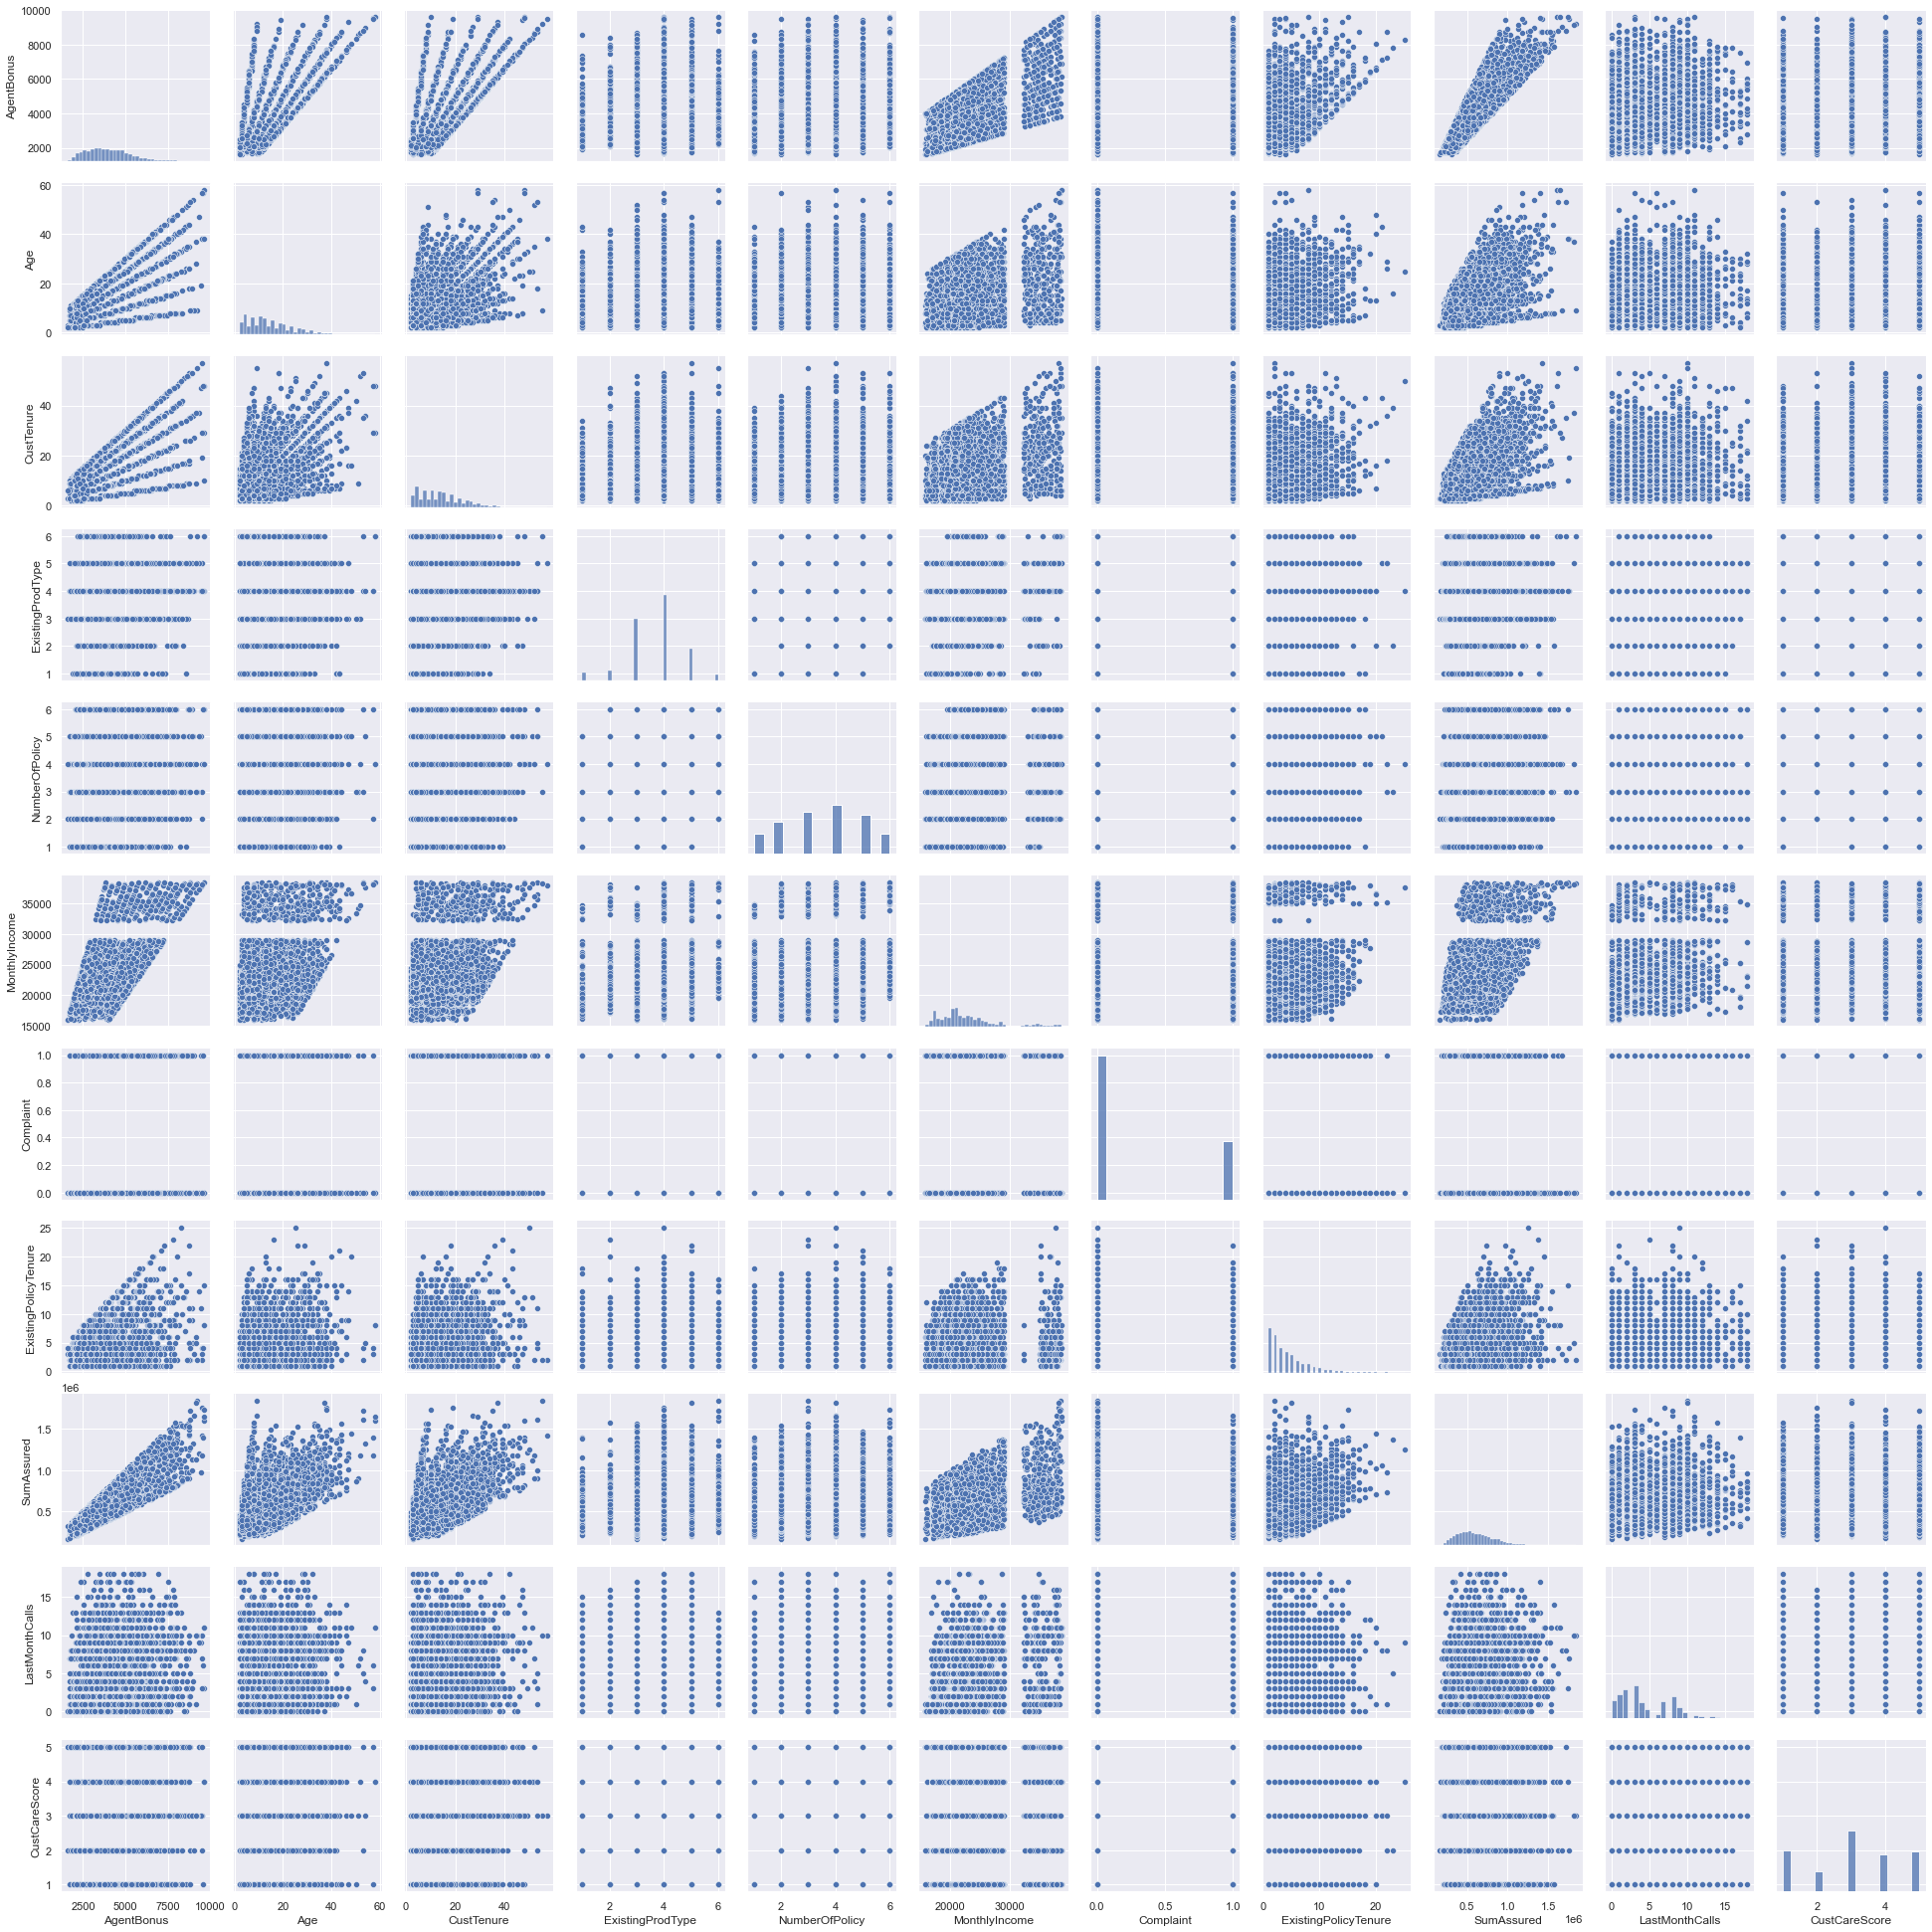

In [157]:
sns.pairplot(Sales)

In [158]:
print(cat)

['Channel', 'Occupation', 'EducationField', 'Gender', 'ExistingProdType', 'Designation', 'MaritalStatus', 'Complaint', 'Zone', 'PaymentMethod']


In [159]:
for column in Sales_imputed.columns:
    if Sales_imputed[column].dtype == 'object':
        print(column.upper(),': ',Sales_imputed[column].nunique())
        print(Sales[column].value_counts().sort_values())
        print('\n')

CHANNEL :  3
Online                  468
Third_Party_Partner     858
Agent                  3194
Name: Channel, dtype: int64


OCCUPATION :  4
Free_Lancer          2
Large_Business     408
Small_Business    1918
Salaried          2192
Name: Occupation, dtype: int64


EDUCATIONFIELD :  6
MBA                 74
Post_Graduate      252
Engineer           408
Diploma            496
Under_Graduate    1420
Graduate          1870
Name: EducationField, dtype: int64


GENDER :  2
Female    1832
Male      2688
Name: Gender, dtype: int64


EXISTINGPRODTYPE :  6
6     123
1     183
2     221
5     708
3    1369
4    1916
Name: ExistingProdType, dtype: int64


DESIGNATION :  5
VP                 226
AVP                336
Senior_Manager     676
Manager           1620
Executive         1662
Name: Designation, dtype: int64


MARITALSTATUS :  3
Divorced     804
Single      1448
Married     2268
Name: MaritalStatus, dtype: int64


COMPLAINT :  2
1    1298
0    3222
Name: Complaint, dtype: int64


ZONE :

In [160]:
Sales_imputed.isnull().sum().sort_values(ascending = False)/Sales.index.size

PaymentMethod          0.00
AgentBonus             0.00
CustTenure             0.00
NumberOfPolicy         0.00
MonthlyIncome          0.00
ExistingPolicyTenure   0.00
SumAssured             0.00
LastMonthCalls         0.00
CustCareScore          0.00
Channel                0.00
Zone                   0.00
Occupation             0.00
EducationField         0.00
Gender                 0.00
ExistingProdType       0.00
Designation            0.00
MaritalStatus          0.00
Complaint              0.00
Age                    0.00
dtype: float64

for feature in Sales_imputed.columns: 
    if Sales_imputed[feature].dtype == 'object':
        Sales_imputed[feature] = pd.Categorical(Sales_imputed[feature]).codes

        ##cars.Cars_Category=pd.Categorical(cars.Cars_Category).codes

In [161]:
Sales_imputed

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
0    22.00        4.00            2.00       20993.00                  2.00   
1    11.00        2.00            4.00       20130.00                  3.00   
2    26.00        4.00            3.00       17090.00                  2.00   
3    11.00        5.90            3.00       17909.00                  2.00   
4     6.00        8.40            4.00       18468.00                  4.00   
...    ...         ...             ...            ...                   ...   
4515  4.00        8.00            2.00       26355.00                  2.00   
4516  9.00        9.00            2.00       20991.00                  3.00   
4517 23.00       23.00            5.00       17042.30                  2.00   
4518 10.00       10.00            2.00       20068.00                  6.00   
4519 14.00       10.00            2.00       23820.00                  3.00   

      SumAssured  LastMonthCalls  CustCareScore  AgentBonus  \
0      806761.00            5.00           2.00     4409.00   
1      294502.00            7.00           3.00     2214.00   
2      599492.70            0.00           3.00     4273.00   
3      268635.00            0.00           5.00     1791.00   
4      366405.00            2.00           5.00     2955.00   
...          ...             ...            ...         ...   
4515   636473.00            9.00           1.00     3953.00   
4516   296813.00            1.00           3.00     2939.00   
4517   667371.00            4.00           1.00     3792.00   
4518   943999.00            1.00           5.00     4816.00   
4519   700308.00            1.00           3.00     4764.00   

                  Channel      Occupation  EducationField  Gender  \
0                   Agent        Salaried        Graduate  Female   
1     Third_Party_Partner        Salaried        Graduate    Male   
2                   Agent     Free_Lancer   Post_Graduate    Male   
3     Third_Party_Partner        Salaried        Graduate  Female   
4                   Agent  Small_Business  Under_Graduate    Male   
...                   ...             ...             ...     ...   
4515                Agent  Small_Business        Graduate    Male   
4516                Agent        Salaried  Under_Graduate  Female   
4517                Agent        Salaried        Engineer  Female   
4518               Online  Small_Business        Graduate  Female   
4519                Agent        Salaried  Under_Graduate  Female   

     ExistingProdType     Designation MaritalStatus Complaint   Zone  \
0                   3         Manager        Single         1  North   
1                   4         Manager      Divorced         0  North   
2                   4       Executive        Single         1  North   
3                   3       Executive      Divorced         1   West   
4                   3       Executive      Divorced         0   West   
...               ...             ...           ...       ...    ...   
4515                4  Senior_Manager        Single         0   West   
4516                2       Executive       Married         0  North   
4517                5             AVP        Single         0  North   
4518                4       Executive        Single         0   West   
4519                5         Manager       Married         0  North   

     PaymentMethod  
0      Half Yearly  
1           Yearly  
2           Yearly  
3      Half Yearly  
4      Half Yearly  
...            ...  
4515        Yearly  
4516        Yearly  
4517   Half Yearly  
4518   Half Yearly  
4519   Half Yearly  

[4520 rows x 19 columns]

In [162]:
Sales_imputed_non_Scaled = Sales_imputed.copy()

In [163]:
Sales_imputed_non_Scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   4520 non-null   float64
 1   CustTenure            4520 non-null   float64
 2   NumberOfPolicy        4520 non-null   float64
 3   MonthlyIncome         4520 non-null   float64
 4   ExistingPolicyTenure  4520 non-null   float64
 5   SumAssured            4520 non-null   float64
 6   LastMonthCalls        4520 non-null   float64
 7   CustCareScore         4520 non-null   float64
 8   AgentBonus            4520 non-null   float64
 9   Channel               4520 non-null   object 
 10  Occupation            4520 non-null   object 
 11  EducationField        4520 non-null   object 
 12  Gender                4520 non-null   object 
 13  ExistingProdType      4520 non-null   object 
 14  Designation           4520 non-null   object 
 15  MaritalStatus        

### Linear Regression using statsmodels

In [164]:
# Split the data into training and test set in 70:30 ratio

from sklearn.model_selection import train_test_split

Train1, Test1 = train_test_split(Sales_imputed_non_Scaled, test_size=0.30 , random_state=1)

In [165]:
Train1

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
2461 12.00       16.00            3.00       20742.00                  4.00   
3681 31.00       15.00            5.00       23398.00                  4.00   
1309 15.00        6.00            1.00       16232.00                  6.00   
4254  5.00       16.00            2.00       23536.00                  1.00   
1335  8.00       17.00            1.00       17269.00                  6.00   
...    ...         ...             ...            ...                   ...   
2895  6.00       10.00            5.00       21658.00                  8.00   
2763 14.00        5.00            4.00       20976.00                  7.00   
905  12.00       12.00            1.00       19285.00                  3.00   
3980  5.00        5.00            5.00       17130.20                  2.00   
235  14.00       16.00            2.00       17097.00                  2.00   

      SumAssured  LastMonthCalls  CustCareScore  AgentBonus  \
2461   480800.00            1.00           4.00     3941.00   
3681   617707.00            2.00           4.00     5148.00   
1309   453360.00            0.00           5.00     3084.00   
4254   282197.00            8.00           3.00     2589.00   
1335   750165.00            1.00           5.00     4145.00   
...          ...             ...            ...         ...   
2895   610756.00            5.00           2.00     3249.00   
2763   316318.00           10.00           5.00     2727.00   
905    493696.00            7.00           1.00     3857.00   
3980   915352.00            9.00           3.00     4948.00   
235    415000.20            4.00           3.00     2736.00   

                  Channel      Occupation  EducationField Gender  \
2461  Third_Party_Partner  Large_Business        Engineer   Male   
3681                Agent  Small_Business  Under_Graduate   Male   
1309                Agent        Salaried        Graduate   Male   
4254               Online  Large_Business        Engineer   Male   
1335                Agent        Salaried        Graduate   Male   
...                   ...             ...             ...    ...   
2895                Agent        Salaried        Graduate   Male   
2763                Agent  Small_Business  Under_Graduate   Male   
905                 Agent  Small_Business  Under_Graduate   Male   
3980                Agent        Salaried        Graduate   Male   
235                Online        Salaried        Graduate   Male   

     ExistingProdType     Designation MaritalStatus Complaint   Zone  \
2461                4       Executive        Single         1   West   
3681                4         Manager       Married         0   West   
1309                3       Executive        Single         0  North   
4254                4         Manager       Married         0   West   
1335                1       Executive       Married         0   West   
...               ...             ...           ...       ...    ...   
2895                5       Executive      Divorced         0  North   
2763                4       Executive        Single         0  North   
905                 3         Manager       Married         0   West   
3980                4  Senior_Manager       Married         0   West   
235                 3       Executive      Divorced         0   West   

     PaymentMethod  
2461   Half Yearly  
3681   Half Yearly  
1309   Half Yearly  
4254   Half Yearly  
1335       Monthly  
...            ...  
2895        Yearly  
2763   Half Yearly  
905    Half Yearly  
3980   Half Yearly  
235    Half Yearly  

[3164 rows x 19 columns]

In [166]:
Test1

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
610  11.00       23.00            2.00       22756.00                  1.00   
1519 20.00        7.00            1.00       27782.60                  4.80   
1620  7.00       15.00            1.00       18697.00                  4.00   
2031 13.00       22.00            4.00       21385.00                  4.00   
494  12.00       14.00            3.00       17259.00                  1.00   
...    ...         ...             ...            ...                   ...   
2124  5.00       31.00            5.00       28758.00                  2.00   
3220 12.00        7.00            6.00       23789.00                  4.00   
1851 11.00        7.30            3.00       18505.00                  1.00   
1065  7.80       10.00            4.00       17760.00                  1.00   
462   9.00       18.00            2.00       26836.00                  7.00   

      SumAssured  LastMonthCalls  CustCareScore  AgentBonus  \
610    785082.00            4.00           2.00     5689.00   
1519  1200156.00            6.00           1.00     6558.00   
1620   430218.00            8.00           3.00     2431.00   
2031   884697.00            7.00           5.00     4491.00   
494    253707.00            0.00           2.00     2416.00   
...          ...             ...            ...         ...   
2124   553879.00           14.00           5.00     5176.00   
3220   421065.00            4.00           1.00     2379.00   
1851   410811.00            2.00           1.00     2221.00   
1065   390365.00            2.00           1.00     2486.00   
462    807495.00            2.00           3.00     4562.00   

                  Channel      Occupation  EducationField  Gender  \
610   Third_Party_Partner        Salaried        Graduate    Male   
1519                Agent  Small_Business  Under_Graduate  Female   
1620                Agent        Salaried   Post_Graduate    Male   
2031  Third_Party_Partner  Small_Business  Under_Graduate    Male   
494                 Agent  Small_Business  Under_Graduate    Male   
...                   ...             ...             ...     ...   
2124  Third_Party_Partner        Salaried        Graduate    Male   
3220  Third_Party_Partner        Salaried   Post_Graduate    Male   
1851                Agent  Small_Business  Under_Graduate    Male   
1065                Agent  Small_Business         Diploma  Female   
462                 Agent  Small_Business         Diploma    Male   

     ExistingProdType Designation MaritalStatus Complaint   Zone PaymentMethod  
610                 3     Manager        Single         0   West   Half Yearly  
1519                3          VP       Married         0  North   Half Yearly  
1620                3     Manager       Married         0  North   Half Yearly  
2031                3     Manager       Married         1  North   Half Yearly  
494                 3   Executive      Divorced         0   West   Half Yearly  
...               ...         ...           ...       ...    ...           ...  
2124                3         AVP        Single         1   West   Half Yearly  
3220                4     Manager        Single         0   West   Half Yearly  
1851                1   Executive        Single         0  North       Monthly  
1065                5   Executive        Single         0   West        Yearly  
462                 3         AVP      Divorced         0  North   Half Yearly  

[1356 rows x 19 columns]

In [167]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'AgentBonus ~ Age + CustTenure + NumberOfPolicy + MonthlyIncome + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Channel + Occupation + EducationField + Gender + ExistingProdType + Designation + MaritalStatus + Complaint + Zone + PaymentMethod',data = Train1).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     376.9
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:25:06   Log-Likelihood:                -24737.
No. Observations:                3164   AIC:                         4.955e+04
Df Residuals:                    3126   BIC:                         4.978e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

In [168]:
# Calculate MSE
mse = np.mean((lm1.predict(Train1.drop('AgentBonus',axis=1))-Train1['AgentBonus'])**2)

In [169]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

601.5155000252961

In [170]:
np.sqrt(lm1.mse_resid) #another way

605.1605005354605

In [171]:
# Prediction on Test data
y_pred = lm1.predict(Test1)

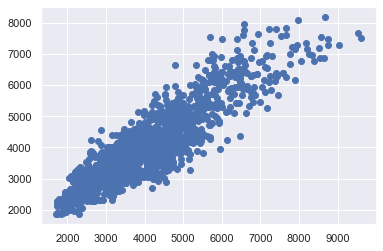

In [172]:
plt.scatter(Test1['AgentBonus'], y_pred)
plt.show()

In [173]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(417.29) * Intercept + (51.58) * Channel[T.Online] + (13.43) * Channel[T.Third_Party_Partner] + (-373.92) * Occupation[T.Large_Business] + (-342.01) * Occupation[T.Salaried] + (-425.18) * Occupation[T.Small_Business] + (-58.38) * EducationField[T.Engineer] + (-63.1) * EducationField[T.Graduate] + (-186.26) * EducationField[T.MBA] + (-24.89) * EducationField[T.Post_Graduate] + (14.91) * EducationField[T.Under_Graduate] + (20.79) * Gender[T.Male] + (-49.33) * ExistingProdType[T.2] + (-264.3) * ExistingProdType[T.3] + (-319.55) * ExistingProdType[T.4] + (-384.95) * ExistingProdType[T.5] + (-265.59) * ExistingProdType[T.6] + (-528.7) * Designation[T.Executive] + (-697.59) * Designation[T.Manager] + (-644.83) * Designation[T.Senior_Manager] + (363.46) * Designation[T.VP] + (-64.94) * MaritalStatus[T.Married] + (-23.14) * MaritalStatus[T.Single] + (22.26) * Complaint[T.1] + (-22.9) * Zone[T.North] + (145.43) * Zone[T.South] + (-15.94) * Zone[T.West] + (-226.04) * PaymentMethod[T.Monthly] + (

In [174]:
## Prediction on Training and Test set

y_pred_1_Train = lm1.fittedvalues
y_pred_1_Test = lm1.predict(Test1)

In [175]:
## RMSE Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('RMSE on Training Set for Model 1:',mean_squared_error(y_true=Train1['AgentBonus'],y_pred=y_pred_1_Train,squared=False))

RMSE on Training Set for Model 1: 601.5155000252959


In [176]:
print('RMSE on Test Set for Model 1:',mean_squared_error(y_true=Test1['AgentBonus'],y_pred=y_pred_1_Test,squared=False))

RMSE on Test Set for Model 1: 625.2345892699941


### Linear Regression Model

In [177]:
cat1 = ['Channel', 'MaritalStatus', 'EducationField', 'Zone', 'PaymentMethod','Occupation','ExistingProdType','Gender','Designation','Complaint']

In [178]:
Sales_imputed_non_Scaled =pd.get_dummies(Sales_imputed_non_Scaled, columns=cat1,drop_first=True)

In [179]:
Sales_imputed_non_Scaled

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
0    22.00        4.00            2.00       20993.00                  2.00   
1    11.00        2.00            4.00       20130.00                  3.00   
2    26.00        4.00            3.00       17090.00                  2.00   
3    11.00        5.90            3.00       17909.00                  2.00   
4     6.00        8.40            4.00       18468.00                  4.00   
...    ...         ...             ...            ...                   ...   
4515  4.00        8.00            2.00       26355.00                  2.00   
4516  9.00        9.00            2.00       20991.00                  3.00   
4517 23.00       23.00            5.00       17042.30                  2.00   
4518 10.00       10.00            2.00       20068.00                  6.00   
4519 14.00       10.00            2.00       23820.00                  3.00   

      SumAssured  LastMonthCalls  CustCareScore  AgentBonus  Channel_Online  \
0      806761.00            5.00           2.00     4409.00               0   
1      294502.00            7.00           3.00     2214.00               0   
2      599492.70            0.00           3.00     4273.00               0   
3      268635.00            0.00           5.00     1791.00               0   
4      366405.00            2.00           5.00     2955.00               0   
...          ...             ...            ...         ...             ...   
4515   636473.00            9.00           1.00     3953.00               0   
4516   296813.00            1.00           3.00     2939.00               0   
4517   667371.00            4.00           1.00     3792.00               0   
4518   943999.00            1.00           5.00     4816.00               1   
4519   700308.00            1.00           3.00     4764.00               0   

      Channel_Third_Party_Partner  MaritalStatus_Married  \
0                               0                      0   
1                               1                      0   
2                               0                      0   
3                               1                      0   
4                               0                      0   
...                           ...                    ...   
4515                            0                      0   
4516                            0                      1   
4517                            0                      0   
4518                            0                      0   
4519                            0                      1   

      MaritalStatus_Single  EducationField_Engineer  EducationField_Graduate  \
0                        1                        0                        1   
1                        0                        0                        1   
2                        1                        0                        0   
3                        0                        0                        1   
4                        0                        0                        0   
...                    ...                      ...                      ...   
4515                     1                        0                        1   
4516                     0                        0                        0   
4517                     1                        1                        0   
4518                     1                        0                        1   
4519                     0                        0                        0   

      EducationField_MBA  EducationField_Post_Graduate  \
0                      0                             0   
1                      0                             0   
2                      0                             1   
3                      0                             0   
4                      0                             0   
...                  ...                           ...   
4515                 

In [180]:
Sales_imputed_non_Scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            4520 non-null   float64
 1   CustTenure                     4520 non-null   float64
 2   NumberOfPolicy                 4520 non-null   float64
 3   MonthlyIncome                  4520 non-null   float64
 4   ExistingPolicyTenure           4520 non-null   float64
 5   SumAssured                     4520 non-null   float64
 6   LastMonthCalls                 4520 non-null   float64
 7   CustCareScore                  4520 non-null   float64
 8   AgentBonus                     4520 non-null   float64
 9   Channel_Online                 4520 non-null   uint8  
 10  Channel_Third_Party_Partner    4520 non-null   uint8  
 11  MaritalStatus_Married          4520 non-null   uint8  
 12  MaritalStatus_Single           4520 non-null   u

In [181]:
Sales_imputed_non_Scaled_linear_model = Sales_imputed_non_Scaled.copy()

In [182]:
Sales_imputed_non_Scaled_linear_model

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
0    22.00        4.00            2.00       20993.00                  2.00   
1    11.00        2.00            4.00       20130.00                  3.00   
2    26.00        4.00            3.00       17090.00                  2.00   
3    11.00        5.90            3.00       17909.00                  2.00   
4     6.00        8.40            4.00       18468.00                  4.00   
...    ...         ...             ...            ...                   ...   
4515  4.00        8.00            2.00       26355.00                  2.00   
4516  9.00        9.00            2.00       20991.00                  3.00   
4517 23.00       23.00            5.00       17042.30                  2.00   
4518 10.00       10.00            2.00       20068.00                  6.00   
4519 14.00       10.00            2.00       23820.00                  3.00   

      SumAssured  LastMonthCalls  CustCareScore  AgentBonus  Channel_Online  \
0      806761.00            5.00           2.00     4409.00               0   
1      294502.00            7.00           3.00     2214.00               0   
2      599492.70            0.00           3.00     4273.00               0   
3      268635.00            0.00           5.00     1791.00               0   
4      366405.00            2.00           5.00     2955.00               0   
...          ...             ...            ...         ...             ...   
4515   636473.00            9.00           1.00     3953.00               0   
4516   296813.00            1.00           3.00     2939.00               0   
4517   667371.00            4.00           1.00     3792.00               0   
4518   943999.00            1.00           5.00     4816.00               1   
4519   700308.00            1.00           3.00     4764.00               0   

      Channel_Third_Party_Partner  MaritalStatus_Married  \
0                               0                      0   
1                               1                      0   
2                               0                      0   
3                               1                      0   
4                               0                      0   
...                           ...                    ...   
4515                            0                      0   
4516                            0                      1   
4517                            0                      0   
4518                            0                      0   
4519                            0                      1   

      MaritalStatus_Single  EducationField_Engineer  EducationField_Graduate  \
0                        1                        0                        1   
1                        0                        0                        1   
2                        1                        0                        0   
3                        0                        0                        1   
4                        0                        0                        0   
...                    ...                      ...                      ...   
4515                     1                        0                        1   
4516                     0                        0                        0   
4517                     1                        1                        0   
4518                     1                        0                        1   
4519                     0                        0                        0   

      EducationField_MBA  EducationField_Post_Graduate  \
0                      0                             0   
1                      0                             0   
2                      0                             1   
3                      0                             0   
4                      0                             0   
...                  ...                           ...   
4515                 

In [183]:
# Copy all the predictor variables into X dataframe
X = Sales_imputed_non_Scaled_linear_model.drop('AgentBonus', axis=1)

# Copy target into the y dataframe. 
y = Sales_imputed_non_Scaled_linear_model[['AgentBonus']]

In [184]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [185]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [186]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is 20.35423657674494
The coefficient for CustTenure is 20.74543458872274
The coefficient for NumberOfPolicy is 2.8076354385437123
The coefficient for MonthlyIncome is 0.09542744129486504
The coefficient for ExistingPolicyTenure is 33.5088627880533
The coefficient for SumAssured is 0.0035288272235046297
The coefficient for LastMonthCalls is -4.970950976305464
The coefficient for CustCareScore is 7.841553888939741
The coefficient for Channel_Online is 51.58164219772958
The coefficient for Channel_Third_Party_Partner is 13.428157431917219
The coefficient for MaritalStatus_Married is -64.93773427709084
The coefficient for MaritalStatus_Single is -23.14208991789626
The coefficient for EducationField_Engineer is -58.38286469158107
The coefficient for EducationField_Graduate is -63.10296197722186
The coefficient for EducationField_MBA is -186.26499441810705
The coefficient for EducationField_Post_Graduate is -24.886362581663334
The coefficient for EducationField_Under_

In [187]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 417.2933806052147


In [188]:
# R square on training data
regression_model.score(X_train, y_train)

0.8168892209614423

***81% of the variation in the AgentBonus is explained by the predictors in the model for train set 

In [189]:
# R square on testing data
regression_model.score(X_test, y_test)

0.799750792595164

In [190]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

601.5155000252959

In [191]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

625.234589269895

In [267]:
print(regression_model.coef_)

[[ 0.11999608  0.11964426  0.00290325  0.23412083  0.0520985   0.55432094
  -0.01264405  0.00768998  0.0113052   0.00373517 -0.02309814 -0.00766249
  -0.01170036 -0.02211867 -0.01551703 -0.00386773  0.00495057 -0.0080472
   0.00410946 -0.00562581 -0.04361566 -0.0079509   0.00504376 -0.07493634
  -0.12154479 -0.14988575 -0.00755114 -0.08631148 -0.11245538 -0.09899072
  -0.03001998  0.00728677 -0.18143722 -0.23760083 -0.16328479  0.05614896
   0.00713843]]


### Linear Regression using statsmodels with Encoded categorical variables

In [192]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
2461 12.00       16.00            3.00       20742.00                  4.00   
3681 31.00       15.00            5.00       23398.00                  4.00   
1309 15.00        6.00            1.00       16232.00                  6.00   
4254  5.00       16.00            2.00       23536.00                  1.00   
1335  8.00       17.00            1.00       17269.00                  6.00   

      SumAssured  LastMonthCalls  CustCareScore  Channel_Online  \
2461   480800.00            1.00           4.00               0   
3681   617707.00            2.00           4.00               0   
1309   453360.00            0.00           5.00               0   
4254   282197.00            8.00           3.00               1   
1335   750165.00            1.00           5.00               0   

      Channel_Third_Party_Partner  MaritalStatus_Married  \
2461                            1                      0   
3681                            0                      1   
1309                            0                      0   
4254                            0                      1   
1335                            0                      1   

      MaritalStatus_Single  EducationField_Engineer  EducationField_Graduate  \
2461                     1                        1                        0   
3681                     0                        0                        0   
1309                     1                        0                        1   
4254                     0                        1                        0   
1335                     0                        0                        1   

      EducationField_MBA  EducationField_Post_Graduate  \
2461                   0                             0   
3681                   0                             0   
1309                   0                             0   
4254                   0                             0   
1335                   0                             0   

      EducationField_Under_Graduate  Zone_North  Zone_South  Zone_West  \
2461                              0           0           0          1   
3681                              1           0           0          1   
1309                              0           1           0          0   
4254                              0           0           0          1   
1335                              0           0           0          1   

      PaymentMethod_Monthly  PaymentMethod_Quarterly  PaymentMethod_Yearly  \
2461                      0                        0                     0   
3681                      0                        0                     0   
1309                      0                        0                     0   
4254                      0                        0                     0   
1335                      1                        0                     0   

      Occupation_Large_Business  Occupation_Salaried  \
2461                          1                    0   
3681                          0                    0   
1309                          0                    1   
4254                          1                    0   
1335                          0                    1   

      Occupation_Small_Business  ExistingProdType_2  ExistingProdType_3  \
2461                          0                   0                   0   
3681                          1                   0                   0   
1309                          0                   0                   1   
4254                          0                   0                   0   
1335                          0                   0                   0   

      ExistingProdType_4  ExistingProdType_5  ExistingProdType_6  Gender_Male  \
2461                   1                   0                   0            1   
3681                   1                   0                   0          

In [193]:
data_train.columns

Index(['Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome',
       'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore',
       'Channel_Online', 'Channel_Third_Party_Partner',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'EducationField_Engineer', 'EducationField_Graduate',
       'EducationField_MBA', 'EducationField_Post_Graduate',
       'EducationField_Under_Graduate', 'Zone_North', 'Zone_South',
       'Zone_West', 'PaymentMethod_Monthly', 'PaymentMethod_Quarterly',
       'PaymentMethod_Yearly', 'Occupation_Large_Business',
       'Occupation_Salaried', 'Occupation_Small_Business',
       'ExistingProdType_2', 'ExistingProdType_3', 'ExistingProdType_4',
       'ExistingProdType_5', 'ExistingProdType_6', 'Gender_Male',
       'Designation_Executive', 'Designation_Manager',
       'Designation_Senior_Manager', 'Designation_VP', 'Complaint_1',
       'AgentBonus'],
      dtype='object')

In [194]:
data_train

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
2461 12.00       16.00            3.00       20742.00                  4.00   
3681 31.00       15.00            5.00       23398.00                  4.00   
1309 15.00        6.00            1.00       16232.00                  6.00   
4254  5.00       16.00            2.00       23536.00                  1.00   
1335  8.00       17.00            1.00       17269.00                  6.00   
...    ...         ...             ...            ...                   ...   
2895  6.00       10.00            5.00       21658.00                  8.00   
2763 14.00        5.00            4.00       20976.00                  7.00   
905  12.00       12.00            1.00       19285.00                  3.00   
3980  5.00        5.00            5.00       17130.20                  2.00   
235  14.00       16.00            2.00       17097.00                  2.00   

      SumAssured  LastMonthCalls  CustCareScore  Channel_Online  \
2461   480800.00            1.00           4.00               0   
3681   617707.00            2.00           4.00               0   
1309   453360.00            0.00           5.00               0   
4254   282197.00            8.00           3.00               1   
1335   750165.00            1.00           5.00               0   
...          ...             ...            ...             ...   
2895   610756.00            5.00           2.00               0   
2763   316318.00           10.00           5.00               0   
905    493696.00            7.00           1.00               0   
3980   915352.00            9.00           3.00               0   
235    415000.20            4.00           3.00               1   

      Channel_Third_Party_Partner  MaritalStatus_Married  \
2461                            1                      0   
3681                            0                      1   
1309                            0                      0   
4254                            0                      1   
1335                            0                      1   
...                           ...                    ...   
2895                            0                      0   
2763                            0                      0   
905                             0                      1   
3980                            0                      1   
235                             0                      0   

      MaritalStatus_Single  EducationField_Engineer  EducationField_Graduate  \
2461                     1                        1                        0   
3681                     0                        0                        0   
1309                     1                        0                        1   
4254                     0                        1                        0   
1335                     0                        0                        1   
...                    ...                      ...                      ...   
2895                     0                        0                        1   
2763                     1                        0                        0   
905                      0                        0                        0   
3980                     0                        0                        1   
235                      0                        0                        1   

      EducationField_MBA  EducationField_Post_Graduate  \
2461                   0                             0   
3681                   0                             0   
1309                   0                             0   
4254                   0                             0   
1335                   0                             0   
...                  ...                           ...   
2895                   0                             0   
2763                   0                             0   
905                    0                         

In [195]:

expr= 'AgentBonus ~ Age + CustTenure + NumberOfPolicy + MonthlyIncome + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Channel_Online + Channel_Third_Party_Partner + MaritalStatus_Married + MaritalStatus_Single + EducationField_Engineer + EducationField_Graduate + EducationField_MBA + EducationField_Post_Graduate + EducationField_Under_Graduate + Zone_North + Zone_South + Zone_West + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly + Occupation_Large_Business + Occupation_Salaried + Occupation_Small_Business + 	ExistingProdType_2 + ExistingProdType_3 + ExistingProdType_4 + ExistingProdType_5 + ExistingProdType_6 + Gender_Male + Designation_Executive + Designation_Manager + Designation_Senior_Manager + Designation_VP + Complaint_1'

In [196]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                        417.29
Age                               20.35
CustTenure                        20.75
NumberOfPolicy                     2.81
MonthlyIncome                      0.10
ExistingPolicyTenure              33.51
SumAssured                         0.00
LastMonthCalls                    -4.97
CustCareScore                      7.84
Channel_Online                    51.58
Channel_Third_Party_Partner       13.43
MaritalStatus_Married            -64.94
MaritalStatus_Single             -23.14
EducationField_Engineer          -58.38
EducationField_Graduate          -63.10
EducationField_MBA              -186.26
EducationField_Post_Graduate     -24.89
EducationField_Under_Graduate     14.91
Zone_North                       -22.90
Zone_South                       145.43
Zone_West                        -15.94
PaymentMethod_Monthly           -226.04
PaymentMethod_Quarterly          -87.09
PaymentMethod_Yearly              15.27
Occupation_Large_Business       -373.92


In [197]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     376.9
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:25:09   Log-Likelihood:                -24737.
No. Observations:                3164   AIC:                         4.955e+04
Df Residuals:                    3126   BIC:                         4.978e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [198]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('AgentBonus',axis=1))-data_train['AgentBonus'])**2)

In [199]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

601.5155000252962

In [200]:
np.sqrt(lm1.mse_resid) #another way

605.1605005354605

In [201]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

In [202]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(417.29) * Intercept + (20.35) * Age + (20.75) * CustTenure + (2.81) * NumberOfPolicy + (0.1) * MonthlyIncome + (33.51) * ExistingPolicyTenure + (0.0) * SumAssured + (-4.97) * LastMonthCalls + (7.84) * CustCareScore + (51.58) * Channel_Online + (13.43) * Channel_Third_Party_Partner + (-64.94) * MaritalStatus_Married + (-23.14) * MaritalStatus_Single + (-58.38) * EducationField_Engineer + (-63.1) * EducationField_Graduate + (-186.26) * EducationField_MBA + (-24.89) * EducationField_Post_Graduate + (14.91) * EducationField_Under_Graduate + (-22.9) * Zone_North + (145.43) * Zone_South + (-15.94) * Zone_West + (-226.04) * PaymentMethod_Monthly + (-87.09) * PaymentMethod_Quarterly + (15.27) * PaymentMethod_Yearly + (-373.92) * Occupation_Large_Business + (-342.01) * Occupation_Salaried + (-425.18) * Occupation_Small_Business + (-49.33) * ExistingProdType_2 + (-264.3) * ExistingProdType_3 + (-319.55) * ExistingProdType_4 + (-384.95) * ExistingProdType_5 + (-265.59) * ExistingProdType_6 + (20

In [203]:
y_pred_1_Train = lm1.fittedvalues
y_pred_1_Test = lm1.predict(data_test)

In [204]:

## RMSE Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('RMSE on Training Set for Model 1:',mean_squared_error(y_true=data_train['AgentBonus'],y_pred=y_pred_1_Train,squared=False))

print('RMSE on Test Set for Model 1:',mean_squared_error(y_true=data_test['AgentBonus'],y_pred=y_pred_1_Test,squared=False))

RMSE on Training Set for Model 1: 601.515500025296
RMSE on Test Set for Model 1: 625.2345892693655


#####################Iteration 2 ###### How do we improve the model??

In [205]:
## let's check the vif value

def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [206]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3164 entries, 2461 to 235
Data columns (total 38 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            3164 non-null   float64
 1   CustTenure                     3164 non-null   float64
 2   NumberOfPolicy                 3164 non-null   float64
 3   MonthlyIncome                  3164 non-null   float64
 4   ExistingPolicyTenure           3164 non-null   float64
 5   SumAssured                     3164 non-null   float64
 6   LastMonthCalls                 3164 non-null   float64
 7   CustCareScore                  3164 non-null   float64
 8   Channel_Online                 3164 non-null   uint8  
 9   Channel_Third_Party_Partner    3164 non-null   uint8  
 10  MaritalStatus_Married          3164 non-null   uint8  
 11  MaritalStatus_Single           3164 non-null   uint8  
 12  EducationField_Engineer        3164 non-null  

In [207]:
vif_cal(input_data=data_train.drop('AgentBonus',axis=1))

Age  VIF =  1.33
CustTenure  VIF =  1.31
NumberOfPolicy  VIF =  1.12
MonthlyIncome  VIF =  2.19
ExistingPolicyTenure  VIF =  1.08
SumAssured  VIF =  1.83
LastMonthCalls  VIF =  1.2
CustCareScore  VIF =  1.03
Channel_Online  VIF =  1.05
Channel_Third_Party_Partner  VIF =  1.04
MaritalStatus_Married  VIF =  1.92
MaritalStatus_Single  VIF =  1.93
EducationField_Engineer  VIF =  16.85
EducationField_Graduate  VIF =  17.75
EducationField_MBA  VIF =  2.01
EducationField_Post_Graduate  VIF =  4.46
EducationField_Under_Graduate  VIF =  2.71
Zone_North  VIF =  18.43
Zone_South  VIF =  1.12
Zone_West  VIF =  18.39
PaymentMethod_Monthly  VIF =  9.53
PaymentMethod_Quarterly  VIF =  1.42
PaymentMethod_Yearly  VIF =  2.37
Occupation_Large_Business  VIF =  143.6
Occupation_Salaried  VIF =  402.8
Occupation_Small_Business  VIF =  411.91
ExistingProdType_2  VIF =  2.23
ExistingProdType_3  VIF =  29.95
ExistingProdType_4  VIF =  35.66
ExistingProdType_5  VIF =  20.52
ExistingProdType_6  VIF =  4.75
Gend

In [208]:
vif_cal(input_data=data_train.drop(['AgentBonus','EducationField_Engineer'],axis=1))

Age  VIF =  1.33
CustTenure  VIF =  1.31
NumberOfPolicy  VIF =  1.12
MonthlyIncome  VIF =  2.19
ExistingPolicyTenure  VIF =  1.08
SumAssured  VIF =  1.83
LastMonthCalls  VIF =  1.2
CustCareScore  VIF =  1.03
Channel_Online  VIF =  1.05
Channel_Third_Party_Partner  VIF =  1.04
MaritalStatus_Married  VIF =  1.92
MaritalStatus_Single  VIF =  1.93
EducationField_Graduate  VIF =  15.42
EducationField_MBA  VIF =  1.88
EducationField_Post_Graduate  VIF =  4.01
EducationField_Under_Graduate  VIF =  2.61
Zone_North  VIF =  18.43
Zone_South  VIF =  1.12
Zone_West  VIF =  18.39
PaymentMethod_Monthly  VIF =  9.48
PaymentMethod_Quarterly  VIF =  1.42
PaymentMethod_Yearly  VIF =  2.37
Occupation_Large_Business  VIF =  133.64
Occupation_Salaried  VIF =  402.8
Occupation_Small_Business  VIF =  410.54
ExistingProdType_2  VIF =  2.23
ExistingProdType_3  VIF =  29.8
ExistingProdType_4  VIF =  35.46
ExistingProdType_5  VIF =  20.4
ExistingProdType_6  VIF =  4.73
Gender_Male  VIF =  1.03
Designation_Execut

In [209]:
vif_cal(input_data=data_train.drop(['AgentBonus','Occupation_Large_Business'],axis=1))

Age  VIF =  1.33
CustTenure  VIF =  1.31
NumberOfPolicy  VIF =  1.12
MonthlyIncome  VIF =  2.19
ExistingPolicyTenure  VIF =  1.08
SumAssured  VIF =  1.83
LastMonthCalls  VIF =  1.2
CustCareScore  VIF =  1.03
Channel_Online  VIF =  1.05
Channel_Third_Party_Partner  VIF =  1.04
MaritalStatus_Married  VIF =  1.92
MaritalStatus_Single  VIF =  1.93
EducationField_Engineer  VIF =  15.68
EducationField_Graduate  VIF =  17.66
EducationField_MBA  VIF =  2.01
EducationField_Post_Graduate  VIF =  4.41
EducationField_Under_Graduate  VIF =  2.71
Zone_North  VIF =  18.43
Zone_South  VIF =  1.12
Zone_West  VIF =  18.39
PaymentMethod_Monthly  VIF =  9.5
PaymentMethod_Quarterly  VIF =  1.42
PaymentMethod_Yearly  VIF =  2.37
Occupation_Salaried  VIF =  43.48
Occupation_Small_Business  VIF =  46.31
ExistingProdType_2  VIF =  2.23
ExistingProdType_3  VIF =  29.87
ExistingProdType_4  VIF =  35.57
ExistingProdType_5  VIF =  20.47
ExistingProdType_6  VIF =  4.74
Gender_Male  VIF =  1.03
Designation_Executive

In [210]:
vif_cal(input_data=data_train.drop(['AgentBonus','EducationField_Engineer','Occupation_Small_Business','ExistingProdType_4','EducationField_Graduate','Zone_North','Zone_West','PaymentMethod_Monthly','Occupation_Salaried','Occupation_Small_Business','ExistingProdType_3','ExistingProdType_4','ExistingProdType_5'],axis=1))

Age  VIF =  1.32
CustTenure  VIF =  1.31
NumberOfPolicy  VIF =  1.05
MonthlyIncome  VIF =  1.9
ExistingPolicyTenure  VIF =  1.08
SumAssured  VIF =  1.82
LastMonthCalls  VIF =  1.2
CustCareScore  VIF =  1.02
Channel_Online  VIF =  1.05
Channel_Third_Party_Partner  VIF =  1.04
MaritalStatus_Married  VIF =  1.91
MaritalStatus_Single  VIF =  1.92
EducationField_MBA  VIF =  1.03
EducationField_Post_Graduate  VIF =  1.05
EducationField_Under_Graduate  VIF =  1.1
Zone_South  VIF =  1.01
PaymentMethod_Quarterly  VIF =  1.08
PaymentMethod_Yearly  VIF =  1.09
Occupation_Large_Business  VIF =  1.07
ExistingProdType_2  VIF =  1.09
ExistingProdType_6  VIF =  1.08
Gender_Male  VIF =  1.02
Designation_Executive  VIF =  4.63
Designation_Manager  VIF =  3.93
Designation_Senior_Manager  VIF =  2.66
Designation_VP  VIF =  1.6
Complaint_1  VIF =  1.01


In [211]:
expr1= 'AgentBonus ~ Age + CustTenure + NumberOfPolicy + MonthlyIncome + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Channel_Online + Channel_Third_Party_Partner + MaritalStatus_Married + MaritalStatus_Single + EducationField_MBA + EducationField_Post_Graduate + EducationField_Under_Graduate +  Zone_South  + PaymentMethod_Quarterly + PaymentMethod_Yearly + Occupation_Large_Business + ExistingProdType_2  + ExistingProdType_6 + Gender_Male + Designation_Executive + Designation_Manager + Designation_Senior_Manager + Designation_VP + Complaint_1'

In [212]:
import statsmodels.formula.api as smf
lm2 = smf.ols(formula= expr1, data = data_train).fit()
lm2.params

Intercept                       -163.46
Age                               20.23
CustTenure                        20.49
NumberOfPolicy                    -2.77
MonthlyIncome                      0.09
ExistingPolicyTenure              33.81
SumAssured                         0.00
LastMonthCalls                    -5.59
CustCareScore                      8.10
Channel_Online                    48.54
Channel_Third_Party_Partner       12.15
MaritalStatus_Married            -63.76
MaritalStatus_Single             -21.63
EducationField_MBA              -114.70
EducationField_Post_Graduate      45.55
EducationField_Under_Graduate      2.00
Zone_South                       160.78
PaymentMethod_Quarterly           16.11
PaymentMethod_Yearly             -42.82
Occupation_Large_Business        -21.25
ExistingProdType_2                54.29
ExistingProdType_6                89.26
Gender_Male                       20.21
Designation_Executive           -553.43
Designation_Manager             -710.37


In [213]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     515.4
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:25:16   Log-Likelihood:                -24744.
No. Observations:                3164   AIC:                         4.954e+04
Df Residuals:                    3136   BIC:                         4.971e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

***Iteration 3***

***Elimination variables with pvalue higher than 0.05 at Confidence Interval of 95% ***

In [214]:
expr2= 'AgentBonus ~ Age + CustTenure  + MonthlyIncome + ExistingPolicyTenure + SumAssured + MaritalStatus_Married  + Designation_Executive + Designation_Manager + Designation_Senior_Manager + Designation_VP'

In [215]:
import statsmodels.formula.api as smf
lm3 = smf.ols(formula= expr2, data = data_train).fit()
lm3.params

Intercept                    -169.89
Age                            20.29
CustTenure                     20.38
MonthlyIncome                   0.09
ExistingPolicyTenure           33.57
SumAssured                      0.00
MaritalStatus_Married         -49.70
Designation_Executive        -542.26
Designation_Manager          -705.13
Designation_Senior_Manager   -648.70
Designation_VP                352.29
dtype: float64

In [216]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     1390.
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:25:16   Log-Likelihood:                -24752.
No. Observations:                3164   AIC:                         4.953e+04
Df Residuals:                    3153   BIC:                         4.959e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [217]:
# Calculate MSE
mse = np.mean((lm3.predict(data_train.drop('AgentBonus',axis=1))-data_train['AgentBonus'])**2)

In [218]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)
np.sqrt(lm1.mse_resid) #another way

605.1605005354605

In [219]:
# Prediction on Test data
y_pred = lm3.predict(data_test)

In [220]:
## Prediction on Training and Test set

y_pred_1_Train = lm3.fittedvalues
y_pred_1_Test = lm3.predict(data_test)

## RMSE Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('RMSE on Training Set for Model 1:',mean_squared_error(y_true=data_train['AgentBonus'],y_pred=y_pred_1_Train,squared=False))

print('RMSE on Test Set for Model 1:',mean_squared_error(y_true=data_test['AgentBonus'],y_pred=y_pred_1_Test,squared=False))


RMSE on Training Set for Model 1: 604.3940494749147
RMSE on Test Set for Model 1: 622.4894913144657


In [221]:

for i,j in np.array(lm3.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-169.89) * Intercept + (20.29) * Age + (20.38) * CustTenure + (0.09) * MonthlyIncome + (33.57) * ExistingPolicyTenure + (0.0) * SumAssured + (-49.7) * MaritalStatus_Married + (-542.26) * Designation_Executive + (-705.13) * Designation_Manager + (-648.7) * Designation_Senior_Manager + (352.29) * Designation_VP + 

***Regression with Scaled Data***

# ------------------------------------------------- ITERATION 2  ---------------------------------------------------

In [222]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)


ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)
y_train_scaled = y_train.copy()
y_test_scaled = y_test.copy()

In [223]:
y_test_scaled

AgentBonus
610         1.16
1519        1.78
1620       -1.17
2031        0.30
494        -1.18
...          ...
2124        0.79
3220       -1.21
1851       -1.32
1065       -1.13
462         0.35

[1356 rows x 1 columns]

In [224]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [225]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is 0.11999607796393182
The coefficient for CustTenure is 0.11964426461969518
The coefficient for NumberOfPolicy is 0.0029032450742873042
The coefficient for MonthlyIncome is 0.2341208335619054
The coefficient for ExistingPolicyTenure is 0.0520984974653392
The coefficient for SumAssured is 0.5543209440819972
The coefficient for LastMonthCalls is -0.012644053599194228
The coefficient for CustCareScore is 0.007689982732210276
The coefficient for Channel_Online is 0.011305197748414552
The coefficient for Channel_Third_Party_Partner is 0.0037351729976810026
The coefficient for MaritalStatus_Married is -0.023098135319298923
The coefficient for MaritalStatus_Single is -0.007662490801226208
The coefficient for EducationField_Engineer is -0.011700358699713195
The coefficient for EducationField_Graduate is -0.022118668252616776
The coefficient for EducationField_MBA is -0.015517027738205104
The coefficient for EducationField_Post_Graduate is -0.003867727622374696
The coef

In [226]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.01655234774346e-17


In [227]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_train_scaled, y_train_scaled)

0.8168892209614425

In [228]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(X_test_scaled, y_test_scaled)

0.8000051889376669

In [229]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(X_test_scaled)-y_test_scaled)**2)

In [230]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.44720779405365135

In [338]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(X_test_scaled)

Text(0, 0.5, 'Actual values')

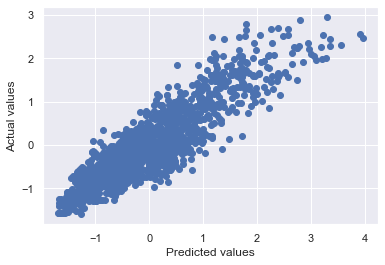

In [343]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['AgentBonus'], y_pred)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')


In [233]:

#RMSE on Training data
predicted_train=regression_model.fit(X_train_scaled,y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))


0.42791445294422764

In [234]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train_scaled,y_train_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

0.4472077940536513

##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test_scaled, 'Predicted': predicted_test})
df

In [318]:
predicted_test

array([[ 0.47665735],
       [ 2.52282731],
       [-0.8345488 ],
       ...,
       [-0.88254971],
       [-1.10124212],
       [ 1.33781262]])

##Predicting the charges
y_test_pred = regression_model.predict(X_test_scaled)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test_scaled, 'Predicted': predicted_test})
df

In [331]:
from sklearn.preprocessing import PolynomialFeatures
x = X_train_scaled
y = y_train_scaled
pol = PolynomialFeatures (degree = 2)
x_pol = pol.fit_transform(X_train_scaled)
##x_train, x_test, y_train, y_test = holdout(x_pol, y, test_size=0.2, random_state=0)
Pol_reg = LinearRegression()
Pol_reg.fit(X_train_scaled, y_train_scaled)
y_train_pred = Pol_reg.predict(X_train_scaled)
y_test_pred = Pol_reg.predict(X_test_scaled)
print(Pol_reg.intercept_)
print(Pol_reg.coef_)
print(Pol_reg.score(X_test_scaled, y_test_scaled))

[3.01655235e-17]
[[ 0.11999608  0.11964426  0.00290325  0.23412083  0.0520985   0.55432094
  -0.01264405  0.00768998  0.0113052   0.00373517 -0.02309814 -0.00766249
  -0.01170036 -0.02211867 -0.01551703 -0.00386773  0.00495057 -0.0080472
   0.00410946 -0.00562581 -0.04361566 -0.0079509   0.00504376 -0.07493634
  -0.12154479 -0.14988575 -0.00755114 -0.08631148 -0.11245538 -0.09899072
  -0.03001998  0.00728677 -0.18143722 -0.23760083 -0.16328479  0.05614896
   0.00713843]]
0.8000051889376669


In [332]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 4066.8886430678467
Mean Squared Error: 18489505.590169948
Root Mean Squared Error: 4299.942510100565


##Predicting the charges
y_test_pred = Pol_reg.predict(X_test)
##Comparing the actual output values with the predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df

In [336]:
y_test_pred = Pol_reg.predict(X_test)

In [337]:
y_test_pred

array([[440518.67375187],
       [671779.30842625],
       [242858.49981404],
       ...,
       [232055.40554345],
       [220547.2213078 ],
       [453897.62231257]])

****Linear Regression using statsmodels with Encoded categorical variables and scaled continuous variables****

In [235]:
# concatenate X and y into a single dataframe
data_train_sc = pd.concat([X_train_scaled,y_train_scaled], axis=1)
data_test_sc=pd.concat([X_test_scaled,y_test_scaled],axis=1)
data_train.head()

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
2461 12.00       16.00            3.00       20742.00                  4.00   
3681 31.00       15.00            5.00       23398.00                  4.00   
1309 15.00        6.00            1.00       16232.00                  6.00   
4254  5.00       16.00            2.00       23536.00                  1.00   
1335  8.00       17.00            1.00       17269.00                  6.00   

      SumAssured  LastMonthCalls  CustCareScore  Channel_Online  \
2461   480800.00            1.00           4.00               0   
3681   617707.00            2.00           4.00               0   
1309   453360.00            0.00           5.00               0   
4254   282197.00            8.00           3.00               1   
1335   750165.00            1.00           5.00               0   

      Channel_Third_Party_Partner  MaritalStatus_Married  \
2461                            1                      0   
3681                            0                      1   
1309                            0                      0   
4254                            0                      1   
1335                            0                      1   

      MaritalStatus_Single  EducationField_Engineer  EducationField_Graduate  \
2461                     1                        1                        0   
3681                     0                        0                        0   
1309                     1                        0                        1   
4254                     0                        1                        0   
1335                     0                        0                        1   

      EducationField_MBA  EducationField_Post_Graduate  \
2461                   0                             0   
3681                   0                             0   
1309                   0                             0   
4254                   0                             0   
1335                   0                             0   

      EducationField_Under_Graduate  Zone_North  Zone_South  Zone_West  \
2461                              0           0           0          1   
3681                              1           0           0          1   
1309                              0           1           0          0   
4254                              0           0           0          1   
1335                              0           0           0          1   

      PaymentMethod_Monthly  PaymentMethod_Quarterly  PaymentMethod_Yearly  \
2461                      0                        0                     0   
3681                      0                        0                     0   
1309                      0                        0                     0   
4254                      0                        0                     0   
1335                      1                        0                     0   

      Occupation_Large_Business  Occupation_Salaried  \
2461                          1                    0   
3681                          0                    0   
1309                          0                    1   
4254                          1                    0   
1335                          0                    1   

      Occupation_Small_Business  ExistingProdType_2  ExistingProdType_3  \
2461                          0                   0                   0   
3681                          1                   0                   0   
1309                          0                   0                   1   
4254                          0                   0                   0   
1335                          0                   0                   0   

      ExistingProdType_4  ExistingProdType_5  ExistingProdType_6  Gender_Male  \
2461                   1                   0                   0            1   
3681                   1                   0                   0          

In [236]:
expr_sc1= 'AgentBonus ~ Age + CustTenure + NumberOfPolicy + MonthlyIncome + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Channel_Online + Channel_Third_Party_Partner + MaritalStatus_Married + MaritalStatus_Single + EducationField_Engineer + EducationField_Graduate + EducationField_MBA + EducationField_Post_Graduate + EducationField_Under_Graduate + Zone_North + Zone_South + Zone_West + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly + Occupation_Large_Business + Occupation_Salaried + Occupation_Small_Business + 	ExistingProdType_2 + ExistingProdType_3 + ExistingProdType_4 + ExistingProdType_5 + ExistingProdType_6 + Gender_Male + Designation_Executive + Designation_Manager + Designation_Senior_Manager + Designation_VP + Complaint_1'


In [237]:
import statsmodels.formula.api as smf
lm_sc1 = smf.ols(formula= expr_sc1, data = data_train_sc).fit()
lm_sc1.params

Intercept                       -0.00
Age                              0.12
CustTenure                       0.12
NumberOfPolicy                   0.00
MonthlyIncome                    0.23
ExistingPolicyTenure             0.05
SumAssured                       0.55
LastMonthCalls                  -0.01
CustCareScore                    0.01
Channel_Online                   0.01
Channel_Third_Party_Partner      0.00
MaritalStatus_Married           -0.02
MaritalStatus_Single            -0.01
EducationField_Engineer         -0.01
EducationField_Graduate         -0.02
EducationField_MBA              -0.02
EducationField_Post_Graduate    -0.00
EducationField_Under_Graduate    0.00
Zone_North                      -0.01
Zone_South                       0.00
Zone_West                       -0.01
PaymentMethod_Monthly           -0.04
PaymentMethod_Quarterly         -0.01
PaymentMethod_Yearly             0.01
Occupation_Large_Business       -0.07
Occupation_Salaried             -0.12
Occupation_S

In [238]:
print(lm_sc1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     376.9
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:25:18   Log-Likelihood:                -1803.8
No. Observations:                3164   AIC:                             3684.
Df Residuals:                    3126   BIC:                             3914.
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [239]:
# Calculate MSE
mse = np.mean((lm_sc1.predict(data_train_sc.drop('AgentBonus',axis=1))-data_train_sc['AgentBonus'])**2)

In [240]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.42791445294422753

In [241]:
np.sqrt(lm_sc1.mse_resid) #another way

0.43050748404521005

In [242]:
## let's check the vif value

def vif_cal(input_data):
    x_vars=input_data
    xvar_names=input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=smf.ols(formula="y~x", data=x_vars).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [243]:

vif_cal(input_data=data_train_sc.drop('AgentBonus',axis=1))

Age  VIF =  1.33
CustTenure  VIF =  1.31
NumberOfPolicy  VIF =  1.12
MonthlyIncome  VIF =  2.19
ExistingPolicyTenure  VIF =  1.08
SumAssured  VIF =  1.83
LastMonthCalls  VIF =  1.2
CustCareScore  VIF =  1.03
Channel_Online  VIF =  1.05
Channel_Third_Party_Partner  VIF =  1.04
MaritalStatus_Married  VIF =  1.92
MaritalStatus_Single  VIF =  1.93
EducationField_Engineer  VIF =  16.85
EducationField_Graduate  VIF =  17.75
EducationField_MBA  VIF =  2.01
EducationField_Post_Graduate  VIF =  4.46
EducationField_Under_Graduate  VIF =  2.71
Zone_North  VIF =  18.43
Zone_South  VIF =  1.12
Zone_West  VIF =  18.39
PaymentMethod_Monthly  VIF =  9.53
PaymentMethod_Quarterly  VIF =  1.42
PaymentMethod_Yearly  VIF =  2.37
Occupation_Large_Business  VIF =  143.6
Occupation_Salaried  VIF =  402.8
Occupation_Small_Business  VIF =  411.91
ExistingProdType_2  VIF =  2.23
ExistingProdType_3  VIF =  29.95
ExistingProdType_4  VIF =  35.66
ExistingProdType_5  VIF =  20.52
ExistingProdType_6  VIF =  4.75
Gend

In [244]:

expr_sc2= 'AgentBonus ~ Age + CustTenure + NumberOfPolicy + MonthlyIncome + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Channel_Online + Channel_Third_Party_Partner + MaritalStatus_Married + MaritalStatus_Single +   EducationField_MBA + EducationField_Post_Graduate + EducationField_Under_Graduate +  Zone_South + PaymentMethod_Quarterly + PaymentMethod_Yearly + ExistingProdType_2 + ExistingProdType_6 + Gender_Male + Designation_Executive + Designation_Manager + Designation_Senior_Manager + Designation_VP + Complaint_1'

In [245]:
import statsmodels.formula.api as smf
lm_sc2 = smf.ols(formula= expr_sc2, data = data_train_sc).fit()
lm_sc2.params

Intercept                       -0.00
Age                              0.12
CustTenure                       0.12
NumberOfPolicy                  -0.00
MonthlyIncome                    0.22
ExistingPolicyTenure             0.05
SumAssured                       0.55
LastMonthCalls                  -0.01
CustCareScore                    0.01
Channel_Online                   0.01
Channel_Third_Party_Partner      0.00
MaritalStatus_Married           -0.02
MaritalStatus_Single            -0.01
EducationField_MBA              -0.01
EducationField_Post_Graduate     0.01
EducationField_Under_Graduate    0.00
Zone_South                       0.00
PaymentMethod_Quarterly          0.00
PaymentMethod_Yearly            -0.01
ExistingProdType_2               0.01
ExistingProdType_6               0.01
Gender_Male                      0.01
Designation_Executive           -0.19
Designation_Manager             -0.24
Designation_Senior_Manager      -0.16
Designation_VP                   0.06
Complaint_1 

In [246]:
print(lm_sc2.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     535.4
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:25:20   Log-Likelihood:                -1810.8
No. Observations:                3164   AIC:                             3676.
Df Residuals:                    3137   BIC:                             3839.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [247]:

# Calculate MSE
mse = np.mean((lm_sc2.predict(data_train_sc.drop('AgentBonus',axis=1))-data_train_sc['AgentBonus'])**2)

In [248]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.4288538586317379

In [249]:
np.sqrt(lm_sc2.mse_resid) #another way

0.43069546617844495

In [250]:
expr_sc3= 'AgentBonus ~ Age + CustTenure + MonthlyIncome + ExistingPolicyTenure + SumAssured + Designation_Executive + Designation_Manager + Designation_Senior_Manager + Designation_VP'

In [251]:
import statsmodels.formula.api as smf
lm_sc3 = smf.ols(formula= expr_sc3, data = data_train_sc).fit()
lm_sc3

In [252]:
print(lm_sc3.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     1542.
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        18:25:20   Log-Likelihood:                -1821.6
No. Observations:                3164   AIC:                             3663.
Df Residuals:                    3154   BIC:                             3724.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [258]:

# Calculate MSE
mse = np.mean((lm_sc3.predict(data_train_sc.drop('AgentBonus',axis=1))-data_train_sc['AgentBonus'])**2)

In [259]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.4303227848384383

In [260]:
# Prediction on Test data
y_pred = lm_sc3.predict(data_test_sc)

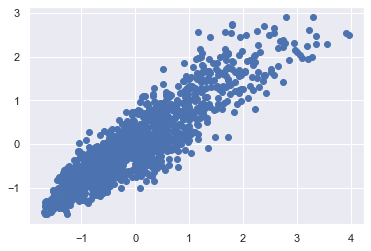

In [261]:
plt.scatter(y_test_scaled['AgentBonus'], y_pred)
plt.show()

In [262]:
for i,j in np.array(lm_sc3.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-0.0) * Intercept + (0.12) * Age + (0.12) * CustTenure + (0.22) * MonthlyIncome + (0.05) * ExistingPolicyTenure + (0.55) * SumAssured + (-0.18) * Designation_Executive + (-0.24) * Designation_Manager + (-0.16) * Designation_Senior_Manager + (0.05) * Designation_VP + 

In [263]:
## Prediction on Training and Test set

y_pred_1_Train = lm_sc3.fittedvalues
y_pred_1_Test = lm_sc3.predict(data_test_sc)

## RMSE Calculation on Training and Test set

from sklearn.metrics import mean_squared_error

print('RMSE on Training Set for Model 1:',mean_squared_error(y_true=data_train_sc['AgentBonus'],y_pred=y_pred_1_Train,squared=False))

print('RMSE on Test Set for Model 1:',mean_squared_error(y_true=data_test_sc['AgentBonus'],y_pred=y_pred_1_Test,squared=False))


RMSE on Training Set for Model 1: 0.430322784838438
RMSE on Test Set for Model 1: 0.4446888977244007


***Ridge Regression***

In [270]:
from sklearn.linear_model import Ridge
Ridge = Ridge(alpha=0.5)
Ridge.fit(X_train_scaled, y_train_scaled)
print(Ridge.intercept_)
print(Ridge.coef_)
print(Ridge.score(X_train_scaled, y_train_scaled))
print(Ridge.score(X_test_scaled, y_test_scaled))

[3.17088538e-17]
[[ 0.1200324   0.11964502  0.00288001  0.23405581  0.05211778  0.55424552
  -0.01263483  0.00769922  0.01129108  0.0037167  -0.02308786 -0.00763797
  -0.01160655 -0.02185762 -0.01545503 -0.00366487  0.0049647  -0.00796866
   0.00410973 -0.00558187 -0.04290292 -0.00781546  0.00504163 -0.06511125
  -0.10422064 -0.13244262 -0.00737825 -0.08494545 -0.11092659 -0.097853
  -0.02953815  0.00729561 -0.18121275 -0.23736471 -0.16308161  0.05625855
   0.00716986]]
0.8168883700435474
0.8000132197669481


***Lasso Regression***

In [271]:
from sklearn.linear_model import Lasso
Lasso = Lasso(alpha=0.2, fit_intercept=True, normalize=False, precompute=False, max_iter=1000,
              tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
Lasso.fit(X_train_scaled, y_train_scaled)
print(Lasso.intercept_)
print(Lasso.coef_)
print(Lasso.score(X_train_scaled, y_train_scaled))
print(Lasso.score(X_test_scaled, y_test_scaled))

[-5.21809126e-17]
[ 0.0232202   0.01841672  0.          0.09708549  0.          0.5733335
  0.          0.          0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.          0.         -0.
 -0.          0.          0.          0.         -0.         -0.
  0.          0.          0.         -0.          0.         -0.
  0.          0.         -0.         -0.          0.          0.
  0.        ]
0.7014032529852132
0.6905207289699662


In [551]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
X_train_scaled=ss.fit_transform(X_train)
X_test_scaled=ss.transform(X_test)
y_train_scaled = y_train.copy()
y_test_scaled = y_test.copy()

!sudo pip install xgboost

conda install -c conda-forge xgboost

In [552]:
# Model
import gc
import pickle
from xgboost import XGBRegressor
from matplotlib.pylab import rcParams

In [553]:
xgbr_base = XGBRegressor(random_state=1)

In [554]:

xgbr_base.fit(X_train, y_train)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [555]:

# R square on training data
xgbr_base.score(X_train, y_train)

0.9898452253646968

In [556]:

# R square on testing data
xgbr_base.score(X_test, y_test)


0.8727376602489495

In [557]:
#RMSE on Training data
predicted_train=xgbr_base.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

141.65275074151734

In [558]:
#RMSE on Testing data
predicted_test=xgbr_base.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

498.4338685927506

In [559]:
xgbr_base_sc = XGBRegressor(random_state=1)

In [560]:

xgbr_base_sc.fit(X_train_scaled, y_train_scaled)


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [561]:

# R square on training data
xgbr_base_sc.score(X_train_scaled, y_train_scaled)

0.9898452253646968

In [562]:

# R square on testing data
xgbr_base_sc.score(X_test_scaled, y_test_scaled)


0.8726446554055081

In [563]:
#RMSE on Training data
predicted_train=xgbr_base_sc.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

141.65275074151734

In [564]:
#RMSE on Testing data
predicted_test=xgbr_base.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

498.61596605213566

In [565]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [7], #[5, 6, 7]
    'learning_rate': [0.03], #[0.03, 0.05, 0.07]
    'subsample': [0.8], #[0.7, 0.8, 0.9]
    'colsample_bytree': [ 0.8], #[0.7, 0.8]
    'n_estimators': [200], #[100,200,300]
}

xgbr = XGBRegressor(random_state=1)

grid_search_xgbr = GridSearchCV(estimator = xgbr, param_grid = param_grid, cv = 3 ,verbose=False)

In [566]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 6, 7], #[5, 6, 7]
    'learning_rate': [0.03, 0.05, 0.07], #[0.03, 0.05, 0.07]
    'subsample': [0.7, 0.8, 0.9], #[0.7, 0.8, 0.9]
    'colsample_bytree': [ 0.7, 0.8], #[0.7, 0.8]
    'n_estimators': [100,200,300], #[100,200,300]
}

xgbr = XGBRegressor(random_state=1)

grid_search_xgbr = GridSearchCV(estimator = xgbr, param_grid = param_grid, cv = 3 ,verbose=False)

In [567]:

grid_search_xgbr.fit(X_train, y_train)

print(grid_search_xgbr.best_params_)

{'colsample_bytree': 0.8, 'learning_rate': 0.03, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.9}


In [568]:

# R square on training data
grid_search_xgbr.score(X_train, y_train)

0.971766607956378

In [569]:

# R square on testing data
grid_search_xgbr.score(X_test, y_test)


0.8848102865375518

In [570]:
#RMSE on Training data
predicted_train=grid_search_xgbr.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

236.19537919037006

In [571]:
#RMSE on Testing data
predicted_test=grid_search_xgbr.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

474.20315830788667

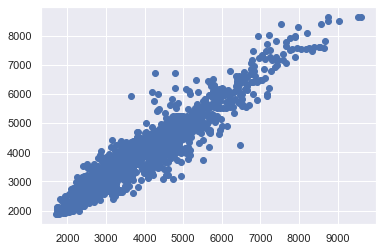

In [572]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test['AgentBonus'], predicted_test)

In [573]:
rcParams['figure.figsize'] = 12, 4

# Testing
Y_pred = grid_search_xgbr.predict(X_train).clip(0, 20)
Y_test = grid_search_xgbr.predict(X_test).clip(0, 20)

In [ ]:

grid_search_xgbr.fit(X_train_scaled, y_train_scaled)

print(grid_search_xgbr.best_params_)

In [ ]:

# R square on training data
grid_search_xgbr.score(X_train_scaled, y_train_scaled)

In [ ]:

# R square on testing data
grid_search_xgbr.score(X_test_scaled, y_test_scaled)


In [ ]:
#RMSE on Training data
predicted_train=grid_search_xgbr.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=grid_search_xgbr.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

In [ ]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['AgentBonus'], predicted_test)

In [ ]:

for i,j in np.array(grid_search_xgbr.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

***Random Forest***

In [272]:
rfr_model = RandomForestRegressor(random_state=1)
rfr_model = rfr_model.fit(X_train_scaled, y_train_scaled)

In [273]:

# R square on training data
rfr_model.score(X_train_scaled, y_train_scaled)

0.9847191971171895

In [274]:
# R square on testing data
rfr_model.score(X_test_scaled, y_test_scaled)

0.8577847694108687

In [275]:
#RMSE on Training data
predicted_train=rfr_model.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

0.12361554466494303

In [276]:
#RMSE on Testing data
predicted_test=rfr_model.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

0.37711434683545425

In [293]:
x_train_pred = rfr_model.predict(X_train_scaled)
x_test_pred = rfr_model.predict(X_test_scaled)

print('MSE train data: %.3f, MSE test data: %.3f' % 
      (metrics.mean_squared_error(x_train_pred, y_train_scaled),
       metrics.mean_squared_error(x_test_pred, y_test_scaled)))
print('R2 train data: %.3f, R2 test data: %.3f' % 
      (metrics.r2_score(y_train_scaled,x_train_pred, y_train_scaled),
       metrics.r2_score(y_test_scaled,x_test_pred, y_test_scaled)))

MSE train data: 0.015, MSE test data: 0.142
R2 train data: 1.000, R2 test data: 1.000


In [295]:
x_train_pred=x_train_pred.reshape(3164,1)

In [297]:
x_test_pred=x_test_pred.reshape(1356,1)

In [289]:
x_test_pred

array([ 0.469377  ,  1.37754955, -0.64574004, ..., -0.91032877,
       -1.05692571,  0.70699679])

In [285]:
x_train_pred

array([[-0.14261383],
       [ 0.77642172],
       [-0.63334756],
       ...,
       [-0.36383598],
       [ 0.61036815],
       [-0.84056949]])

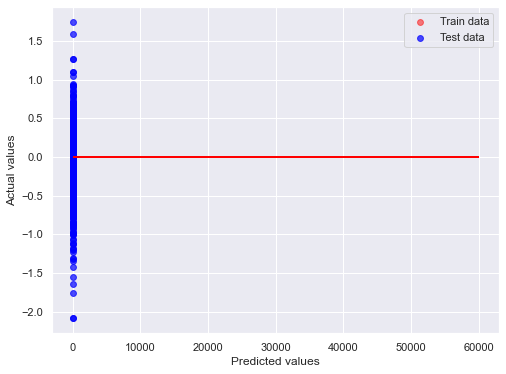

In [299]:
plt.figure(figsize=(8,6))

plt.scatter(x_train_pred, x_train_pred - y_train_scaled,
          c = 'red', marker = 'o', s = 35, alpha = 0.5,
          label = 'Train data')
plt.scatter(x_test_pred, x_test_pred - y_test_scaled,
          c = 'blue', marker = 'o', s = 35, alpha = 0.7,
          label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.legend(loc = 'upper right')
plt.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')

In [306]:
x = X_train.columns

Feature importance ranking


1.SumAssured(0.645731)
2.MonthlyIncome(0.196975)
3.Age(0.051108)
4.CustTenure(0.043030)
5.ExistingPolicyTenure(0.009742)
6.LastMonthCalls(0.007753)
7.Designation_VP(0.007199)
8.NumberOfPolicy(0.005554)
9.CustCareScore(0.004390)
10.Designation_Senior_Manager(0.003897)
11.Gender_Male(0.001549)
12.MaritalStatus_Married(0.001532)
13.ExistingProdType_4(0.001507)
14.PaymentMethod_Yearly(0.001433)
15.Channel_Third_Party_Partner(0.001390)
16.Complaint_1(0.001311)
17.Channel_Online(0.001290)
18.Designation_Manager(0.001284)
19.EducationField_Under_Graduate(0.001098)
20.MaritalStatus_Single(0.001093)
21.ExistingProdType_3(0.001083)
22.ExistingProdType_5(0.001019)
23.Zone_West(0.000989)
24.Zone_North(0.000890)
25.EducationField_Graduate(0.000881)
26.Occupation_Small_Business(0.000860)
27.Designation_Executive(0.000849)
28.Occupation_Salaried(0.000805)
29.EducationField_Post_Graduate(0.000637)
30.EducationField_Engineer(0.000570)
31.ExistingProdType_2(0.000542)
32.Paym

<BarContainer object of 37 artists>

<Figure size 1440x1440 with 0 Axes>

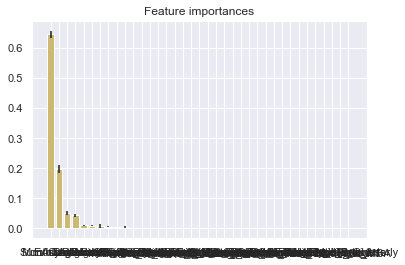

In [310]:
print('Feature importance ranking\n\n')
importances = rfr_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfr_model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = X_train.columns
importance_list = []
for f in range(X_train.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))
figure = plt.figure(figsize=(20,20))
# Plot the feature importances of the forest
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

<BarContainer object of 37 artists>

<Figure size 2160x1440 with 0 Axes>

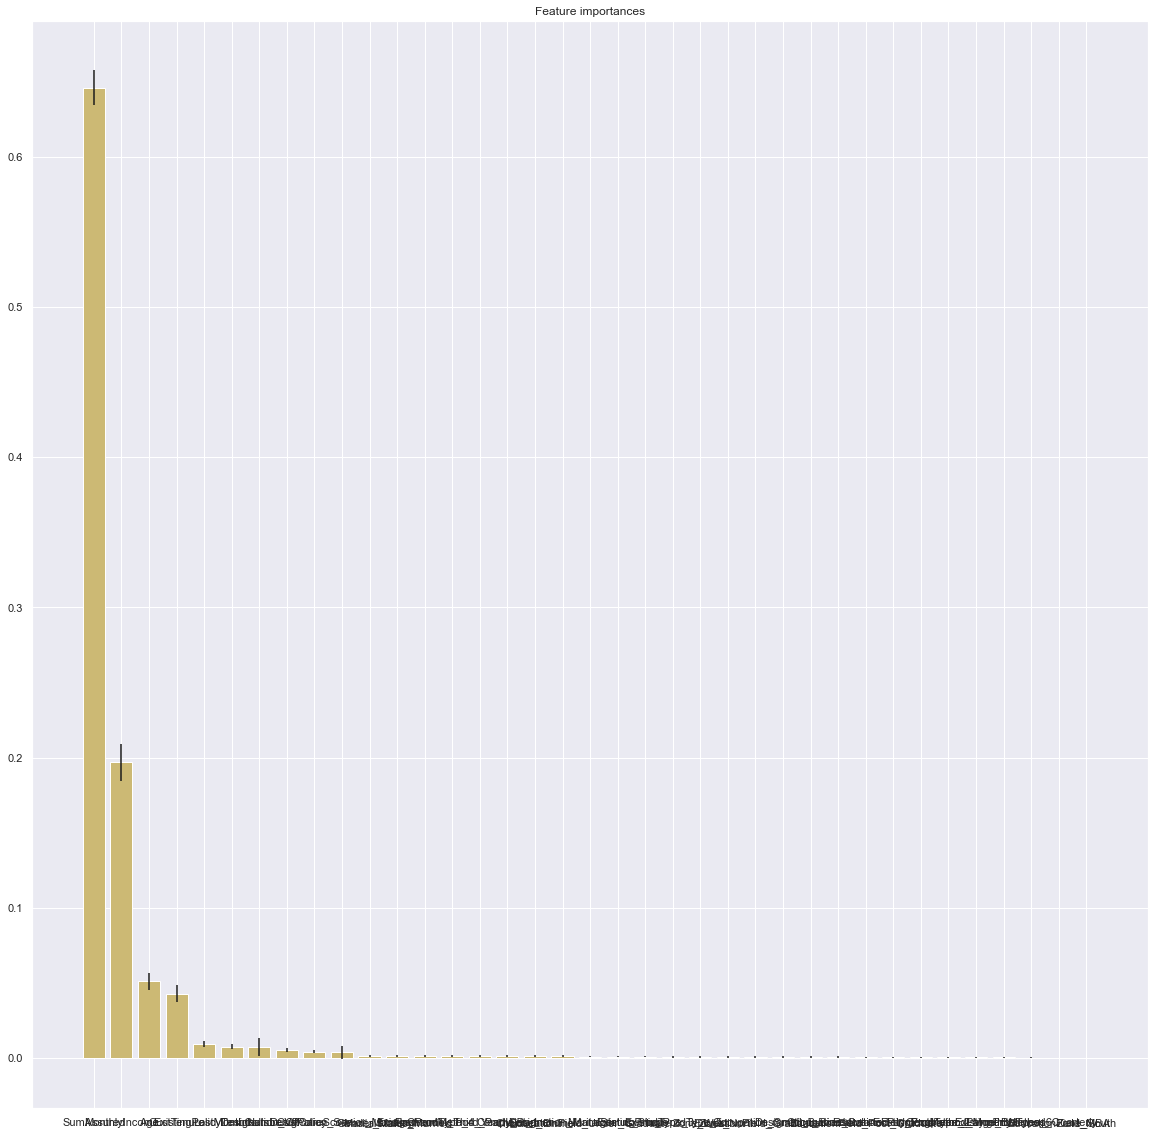

In [314]:
figure = plt.figure(figsize=(30,20))
# Plot the feature importances of the forest
plt.figure(figsize=(20,20))
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rfr_model = {
    'max_depth': [9], #[7,8,9]
    'max_features': [7], #[5,6,7]
    'min_samples_leaf': [30], #[30,60,90]
    'min_samples_split': [90], #[90,180,270]
    'n_estimators': [100] #[100,200]
}

rfr_model = RandomForestRegressor(random_state=1)

grid_search_rfr_model = GridSearchCV(estimator = rfr_model, param_grid = param_grid_rfr_model, cv = 3 ,verbose=False)

In [ ]:

grid_search_rfr_model.fit(X_train, y_train)

print(grid_search_rfr_model.best_params_)

In [ ]:

# R square on training data
grid_search_rfr_model.score(X_train, y_train)

In [ ]:

# R square on testing data
grid_search_rfr_model.score(X_test, y_test)


In [ ]:
#RMSE on Training data
predicted_train=grid_search_rfr_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=grid_search_rfr_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

In [ ]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test['AgentBonus'], predicted_test)

***Random Forest on Scaled Data***

In [ ]:
rfr_model_sc = RandomForestRegressor(random_state=1)
rfr_model_sc = rfr_model_sc.fit(X_train_scaled, y_train_scaled)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid_rfr_model_sc = {
    'max_depth': [7,8,9], #[7,8,9]
    'max_features': [5,6,7], #[5,6,7]
    'min_samples_leaf': [30,60,90], #[30,60,90]
    'min_samples_split': [90,180,270], #[90,180,270]
    'n_estimators': [100,200] #[100,200]
}

rfr_model_sc = RandomForestRegressor(random_state=1)

grid_search_rfr_model_sc = GridSearchCV(estimator = rfr_model_sc, param_grid = param_grid_rfr_model_sc, cv = 3 ,verbose=False)

In [ ]:

grid_search_rfr_model_sc.fit(X_train_scaled, y_train_scaled)

print(grid_search_rfr_model_sc.best_params_)

In [ ]:
best_grid = grid_search_rfr_model_sc.best_estimator_

In [ ]:

# R square on training data
best_grid.score(X_train_scaled, y_train_scaled)

In [ ]:

# R square on testing data
best_grid.score(X_test_scaled, y_test_scaled)

In [ ]:
#RMSE on Training data
predicted_train=best_grid.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=best_grid.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

***ANN Model***

In [ ]:
ann_base = MLPRegressor(random_state=1, verbose=False)

In [ ]:

# R square on training data
ann_base.fit(X_train_scaled, y_train_scaled)

In [ ]:

# R square on training data
ann_base.score(X_train_scaled, y_train_scaled)

In [ ]:

# R square on testing data
ann_base.score(X_test_scaled, y_test_scaled)

In [ ]:
#RMSE on Training data
predicted_train=ann_base.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=ann_base.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

In [ ]:
     param_grid = {
    'hidden_layer_sizes': [324], 
    'max_iter': [1000], #1000,2000
    'activation': ['relu'], #'logistic', 
    'solver': ['adam'], #'adam','sgd'
    'tol': [0.01]
    
}

nncl = MLPRegressor(random_state=1, verbose=False)

grid_search = GridSearchCV(estimator = nncl, param_grid = param_grid, cv = 3)

In [ ]:

grid_search.fit(X_train_scaled, y_train_scaled)

print(grid_search.best_params_)

In [ ]:
best_grid = grid_search.best_estimator_

In [ ]:

# R square on training data
best_grid.score(X_train_scaled, y_train_scaled)

In [ ]:

# R square on testing data
best_grid.score(X_test_scaled, y_test_scaled)

In [ ]:
#RMSE on Training data
predicted_train=best_grid.fit(X_train_scaled, y_train_scaled).predict(X_train_scaled)
np.sqrt(metrics.mean_squared_error(y_train_scaled,predicted_train))

In [ ]:
#RMSE on Testing data
predicted_test=best_grid.fit(X_train_scaled, y_train_scaled).predict(X_test_scaled)
np.sqrt(metrics.mean_squared_error(y_test_scaled,predicted_test))

In [ ]:
dtr = tree.DecisionTreeRegressor(random_state=123)

In [ ]:
dtr.fit(X_train,y_train)

In [ ]:
dtr.score(X_train, y_train)
       

In [ ]:
dtr.score(X_test,y_test)

In [ ]:
np.sqrt(mean_squared_error(y_train,dtr.predict(X_train)))
        

In [ ]:
np.sqrt(mean_squared_error(y_test,dtr.predict(X_test)))

In [ ]:
param_grid = {
    'max_depth': [7,8,9],
    'min_samples_leaf': [30,60,90],
    'min_samples_split': [90,180,270],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

In [ ]:
grid_search.score(X_train, y_train)
       

In [ ]:
grid_search.score(X_test,y_test)

In [ ]:
param_grid = {
    'max_depth': [7,8,9],
    'min_samples_leaf': [30,60,90],
    'min_samples_split': [90,180,270],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train_scaled,y_train_scaled)

print(grid_search.best_params_)

In [ ]:
grid_search.score(X_train_scaled, y_train_scaled)
       

In [ ]:
grid_search.score(X_test_scaled,y_test_scaled)

In [161]:
Sales_imputed['Designation']=np.where(Sales_imputed['Designation'] =='Executive', '0', Sales_imputed['Designation'])
Sales_imputed['Designation']=np.where(Sales_imputed['Designation'] =='Manager', '1', Sales_imputed['Designation'])
Sales_imputed['Designation']=np.where(Sales_imputed['Designation'] =='Senior_Manager', '2', Sales_imputed['Designation'])
Sales_imputed['Designation']=np.where(Sales_imputed['Designation'] =='AVP', '3', Sales_imputed['Designation'])
Sales_imputed['Designation']=np.where(Sales_imputed['Designation'] =='VP', '4', Sales_imputed['Designation'])


In [162]:
Sales_imputed['Occupation']=np.where(Sales_imputed['Occupation'] =='Free_Lancer', '0', Sales_imputed['Occupation'])
Sales_imputed['Occupation']=np.where(Sales_imputed['Occupation'] =='Salaried', '1', Sales_imputed['Occupation'])
Sales_imputed['Occupation']=np.where(Sales_imputed['Occupation'] =='Small_Business', '2', Sales_imputed['Occupation'])
Sales_imputed['Occupation']=np.where(Sales_imputed['Occupation'] =='Large_Business', '3', Sales_imputed['Occupation'])



In [163]:
Sales_imputed['Gender']=np.where(Sales_imputed['Gender'] =='Female', '0', Sales_imputed['Gender'])
Sales_imputed['Gender']=np.where(Sales_imputed['Gender'] =='Male', '1', Sales_imputed['Gender'])

In [164]:
cat1 = ['Channel', 'MaritalStatus', 'EducationField', 'Zone', 'PaymentMethod']

In [165]:
Sales_imputed =pd.get_dummies(Sales_imputed, columns=cat1,drop_first=True)

In [166]:
Sales_imputed

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
0    22.00        4.00            2.00       20993.00                  2.00   
1    11.00        2.00            4.00       20130.00                  3.00   
2    26.00        4.00            3.00       17090.00                  2.00   
3    11.00        5.90            3.00       17909.00                  2.00   
4     6.00        8.40            4.00       18468.00                  4.00   
...    ...         ...             ...            ...                   ...   
4515  4.00        8.00            2.00       26355.00                  2.00   
4516  9.00        9.00            2.00       20991.00                  3.00   
4517 23.00       23.00            5.00       17042.30                  2.00   
4518 10.00       10.00            2.00       20068.00                  6.00   
4519 14.00       10.00            2.00       23820.00                  3.00   

      SumAssured  LastMonthCalls  CustCareScore  AgentBonus Occupation Gender  \
0      806761.00            5.00           2.00     4409.00          1      0   
1      294502.00            7.00           3.00     2214.00          1      1   
2      599492.70            0.00           3.00     4273.00          0      1   
3      268635.00            0.00           5.00     1791.00          1      0   
4      366405.00            2.00           5.00     2955.00          2      1   
...          ...             ...            ...         ...        ...    ...   
4515   636473.00            9.00           1.00     3953.00          2      1   
4516   296813.00            1.00           3.00     2939.00          1      0   
4517   667371.00            4.00           1.00     3792.00          1      0   
4518   943999.00            1.00           5.00     4816.00          2      0   
4519   700308.00            1.00           3.00     4764.00          1      0   

     ExistingProdType Designation Complaint  Channel_Online  \
0                   3           1         1               0   
1                   4           1         0               0   
2                   4           0         1               0   
3                   3           0         1               0   
4                   3           0         0               0   
...               ...         ...       ...             ...   
4515                4           2         0               0   
4516                2           0         0               0   
4517                5           3         0               0   
4518                4           0         0               1   
4519                5           1         0               0   

      Channel_Third_Party_Partner  MaritalStatus_Married  \
0                               0                      0   
1                               1                      0   
2                               0                      0   
3                               1                      0   
4                               0                      0   
...                           ...                    ...   
4515                            0                      0   
4516                            0                      1   
4517                            0                      0   
4518                            0                      0   
4519                            0                      1   

      MaritalStatus_Single  EducationField_Engineer  EducationField_Graduate  \
0                        1                        0                        1   
1                        0                        0                        1   
2                        1                        0                        0   
3                        0                        0                        1   
4                        0                        0                        0   
...                    ...                      ...                      ...   
4515                     1                     

**Clustering**

In [167]:
from sklearn.preprocessing import StandardScaler

In [168]:
X = StandardScaler()

In [169]:
Sales_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4520 entries, 0 to 4519
Data columns (total 29 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            4520 non-null   float64
 1   CustTenure                     4520 non-null   float64
 2   NumberOfPolicy                 4520 non-null   float64
 3   MonthlyIncome                  4520 non-null   float64
 4   ExistingPolicyTenure           4520 non-null   float64
 5   SumAssured                     4520 non-null   float64
 6   LastMonthCalls                 4520 non-null   float64
 7   CustCareScore                  4520 non-null   float64
 8   AgentBonus                     4520 non-null   float64
 9   Occupation                     4520 non-null   object 
 10  Gender                         4520 non-null   object 
 11  ExistingProdType               4520 non-null   object 
 12  Designation                    4520 non-null   o

In [170]:
##Sales_imputed_X = Sales_imputed.drop('AgentBonus', axis = 1)
##Sales_imputed_Y = Sales_imputed['AgentBonus']

In [171]:
##Sales_imputed_X

In [172]:
num1 = ['Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome', 'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore']

In [173]:
##Sales_imputed_X[num1] = Sales_imputed_X[num1].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [174]:
Sales_imputed[num1] = X.fit_transform(Sales_imputed[num1])

In [175]:
Sales_imputed

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
0     0.96       -1.24           -1.08          -0.27                 -0.68   
1    -0.37       -1.49            0.30          -0.52                 -0.22   
2     1.44       -1.24           -0.39          -1.40                 -0.68   
3    -0.37       -1.00           -0.39          -1.16                 -0.68   
4    -0.98       -0.69            0.30          -1.00                  0.24   
...    ...         ...             ...            ...                   ...   
4515 -1.22       -0.74           -1.08           1.28                 -0.68   
4516 -0.62       -0.62           -1.08          -0.27                 -0.22   
4517  1.08        1.13            0.99          -1.41                 -0.68   
4518 -0.49       -0.49           -1.08          -0.54                  1.17   
4519 -0.01       -0.49           -1.08           0.55                 -0.22   

      SumAssured  LastMonthCalls  CustCareScore  AgentBonus Occupation Gender  \
0           0.92            0.11          -0.78     4409.00          1      0   
1          -1.41            0.68          -0.05     2214.00          1      1   
2          -0.02           -1.29          -0.05     4273.00          0      1   
3          -1.53           -1.29           1.40     1791.00          1      0   
4          -1.08           -0.73           1.40     2955.00          2      1   
...          ...             ...            ...         ...        ...    ...   
4515        0.15            1.24          -1.50     3953.00          2      1   
4516       -1.40           -1.01          -0.05     2939.00          1      0   
4517        0.29           -0.17          -1.50     3792.00          1      0   
4518        1.55           -1.01           1.40     4816.00          2      0   
4519        0.44           -1.01          -0.05     4764.00          1      0   

     ExistingProdType Designation Complaint  Channel_Online  \
0                   3           1         1               0   
1                   4           1         0               0   
2                   4           0         1               0   
3                   3           0         1               0   
4                   3           0         0               0   
...               ...         ...       ...             ...   
4515                4           2         0               0   
4516                2           0         0               0   
4517                5           3         0               0   
4518                4           0         0               1   
4519                5           1         0               0   

      Channel_Third_Party_Partner  MaritalStatus_Married  \
0                               0                      0   
1                               1                      0   
2                               0                      0   
3                               1                      0   
4                               0                      0   
...                           ...                    ...   
4515                            0                      0   
4516                            0                      1   
4517                            0                      0   
4518                            0                      0   
4519                            0                      1   

      MaritalStatus_Single  EducationField_Engineer  EducationField_Graduate  \
0                        1                        0                        1   
1                        0                        0                        1   
2                        1                        0                        0   
3                        0                        0                        1   
4                        0                        0                        0   
...                    ...                      ...                      ...   
4515                     1                     

In [176]:
scaled_df = Sales_imputed.copy()

In [177]:
scaled_df_X = scaled_df.drop('AgentBonus', axis = 1)
scaled_df_Y = scaled_df['AgentBonus']

In [178]:
scaled_df_X

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
0     0.96       -1.24           -1.08          -0.27                 -0.68   
1    -0.37       -1.49            0.30          -0.52                 -0.22   
2     1.44       -1.24           -0.39          -1.40                 -0.68   
3    -0.37       -1.00           -0.39          -1.16                 -0.68   
4    -0.98       -0.69            0.30          -1.00                  0.24   
...    ...         ...             ...            ...                   ...   
4515 -1.22       -0.74           -1.08           1.28                 -0.68   
4516 -0.62       -0.62           -1.08          -0.27                 -0.22   
4517  1.08        1.13            0.99          -1.41                 -0.68   
4518 -0.49       -0.49           -1.08          -0.54                  1.17   
4519 -0.01       -0.49           -1.08           0.55                 -0.22   

      SumAssured  LastMonthCalls  CustCareScore Occupation Gender  \
0           0.92            0.11          -0.78          1      0   
1          -1.41            0.68          -0.05          1      1   
2          -0.02           -1.29          -0.05          0      1   
3          -1.53           -1.29           1.40          1      0   
4          -1.08           -0.73           1.40          2      1   
...          ...             ...            ...        ...    ...   
4515        0.15            1.24          -1.50          2      1   
4516       -1.40           -1.01          -0.05          1      0   
4517        0.29           -0.17          -1.50          1      0   
4518        1.55           -1.01           1.40          2      0   
4519        0.44           -1.01          -0.05          1      0   

     ExistingProdType Designation Complaint  Channel_Online  \
0                   3           1         1               0   
1                   4           1         0               0   
2                   4           0         1               0   
3                   3           0         1               0   
4                   3           0         0               0   
...               ...         ...       ...             ...   
4515                4           2         0               0   
4516                2           0         0               0   
4517                5           3         0               0   
4518                4           0         0               1   
4519                5           1         0               0   

      Channel_Third_Party_Partner  MaritalStatus_Married  \
0                               0                      0   
1                               1                      0   
2                               0                      0   
3                               1                      0   
4                               0                      0   
...                           ...                    ...   
4515                            0                      0   
4516                            0                      1   
4517                            0                      0   
4518                            0                      0   
4519                            0                      1   

      MaritalStatus_Single  EducationField_Engineer  EducationField_Graduate  \
0                        1                        0                        1   
1                        0                        0                        1   
2                        1                        0                        0   
3                        0                        0                        1   
4                        0                        0                        0   
...                    ...                      ...                      ...   
4515                     1                        0                        1   
4516                     0                        0                        0   
4517                     1     

In [179]:
k_means = KMeans(n_clusters = 3)

In [180]:
k_means.fit(scaled_df_X)

KMeans(n_clusters=3)

In [181]:
k_means.labels_

array([2, 1, 2, ..., 0, 2, 1])

In [182]:
k_means.inertia_

48462.658169181086

In [183]:
k_means = KMeans(n_clusters = 3)
k_means.fit(scaled_df_X)
k_means.inertia_

48462.523097441015

In [184]:
k_means = KMeans(n_clusters = 4)
k_means.fit(scaled_df_X)
k_means.inertia_

46299.77559410121

In [185]:
k_means = KMeans(n_clusters = 1)
k_means.fit(scaled_df_X)
k_means.inertia_

59999.76548672554

In [186]:
k_means = KMeans(n_clusters = 5)
k_means.fit(scaled_df_X)
k_means.inertia_

44591.50684116138

In [187]:
k_means = KMeans(n_clusters = 6)
k_means.fit(scaled_df_X)
k_means.inertia_

43241.600293205884

In [188]:
wss =[] 

In [189]:
Sales_imputed_knn = Sales_imputed1.copy()

In [190]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df_X)
    wss.append(KM.inertia_)

In [191]:
wss

[59999.76548672554,
 51275.584189469664,
 48462.878856427225,
 46299.37254190732,
 44594.31450074577,
 43232.0015459026,
 42140.22123054254,
 41007.95161912255,
 40211.527106114205,
 39524.84650930891]

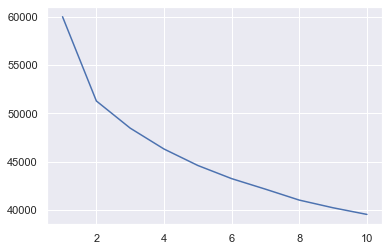

In [192]:
plt.plot(range(1,11), wss)

In [193]:
k_means = KMeans(n_clusters = 2)
k_means.fit(scaled_df_X)
labels = k_means.labels_
labels

array([0, 0, 0, ..., 1, 0, 0])

In [194]:
Sales_imputed_knn["Clus_kmeans"] = labels
Sales_imputed_knn.head(5)

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
0 22.00        4.00            2.00       20993.00                  2.00   
1 11.00        2.00            4.00       20130.00                  3.00   
2 26.00        4.00            3.00       17090.00                  2.00   
3 11.00        5.90            3.00       17909.00                  2.00   
4  6.00        8.40            4.00       18468.00                  4.00   

   SumAssured  LastMonthCalls  CustCareScore  AgentBonus              Channel  \
0   806761.00            5.00           2.00     4409.00                Agent   
1   294502.00            7.00           3.00     2214.00  Third_Party_Partner   
2   599492.70            0.00           3.00     4273.00                Agent   
3   268635.00            0.00           5.00     1791.00  Third_Party_Partner   
4   366405.00            2.00           5.00     2955.00                Agent   

       Occupation  EducationField  Gender ExistingProdType Designation  \
0        Salaried        Graduate  Female                3     Manager   
1        Salaried        Graduate    Male                4     Manager   
2     Free_Lancer   Post_Graduate    Male                4   Executive   
3        Salaried        Graduate  Female                3   Executive   
4  Small_Business  Under_Graduate    Male                3   Executive   

  MaritalStatus Complaint   Zone PaymentMethod  Clus_kmeans  
0        Single         1  North   Half Yearly            0  
1      Divorced         0  North        Yearly            0  
2        Single         1  North        Yearly            0  
3      Divorced         1   West   Half Yearly            0  
4      Divorced         0   West   Half Yearly            0

In [195]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [196]:
silhouette_score(scaled_df_X,labels)

0.15234460956083495

In [197]:
sil_width = silhouette_samples(scaled_df_X,labels)

In [198]:
Sales_imputed_hc = Sales_imputed1.copy()

In [199]:
Sales_imputed_knn["sil_width"] = sil_width
Sales_imputed_knn.head(5)

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
0 22.00        4.00            2.00       20993.00                  2.00   
1 11.00        2.00            4.00       20130.00                  3.00   
2 26.00        4.00            3.00       17090.00                  2.00   
3 11.00        5.90            3.00       17909.00                  2.00   
4  6.00        8.40            4.00       18468.00                  4.00   

   SumAssured  LastMonthCalls  CustCareScore  AgentBonus              Channel  \
0   806761.00            5.00           2.00     4409.00                Agent   
1   294502.00            7.00           3.00     2214.00  Third_Party_Partner   
2   599492.70            0.00           3.00     4273.00                Agent   
3   268635.00            0.00           5.00     1791.00  Third_Party_Partner   
4   366405.00            2.00           5.00     2955.00                Agent   

       Occupation  EducationField  Gender ExistingProdType Designation  \
0        Salaried        Graduate  Female                3     Manager   
1        Salaried        Graduate    Male                4     Manager   
2     Free_Lancer   Post_Graduate    Male                4   Executive   
3        Salaried        Graduate  Female                3   Executive   
4  Small_Business  Under_Graduate    Male                3   Executive   

  MaritalStatus Complaint   Zone PaymentMethod  Clus_kmeans  sil_width  
0        Single         1  North   Half Yearly            0       0.12  
1      Divorced         0  North        Yearly            0       0.25  
2        Single         1  North        Yearly            0       0.21  
3      Divorced         1   West   Half Yearly            0       0.31  
4      Divorced         0   West   Half Yearly            0       0.31

In [200]:
silhouette_samples(scaled_df_X,labels).min()

-0.06571955971288056

In [201]:
Sales_imputed_knn.to_csv('Sales_imputed_knn.csv')

In [202]:
cluster1 = Sales_imputed_knn.loc[Sales_imputed_knn['Clus_kmeans'] == 0]

In [203]:
cluster2 = Sales_imputed_knn.loc[Sales_imputed_knn['Clus_kmeans'] == 1]

In [204]:
##cluster3 = Sales_imputed_knn.loc[Sales_imputed_knn['Clus_kmeans'] == 3]

In [205]:
cluster1.describe()

Age  CustTenure  NumberOfPolicy  MonthlyIncome  \
count 2901.00     2901.00         2901.00        2901.00   
mean    11.10       11.06            3.47       20390.57   
std      6.08        6.05            1.44        2377.05   
min      2.00        2.00            1.00       16009.00   
25%      6.00        6.00            2.00       18201.00   
50%     10.00       10.00            4.00       20562.00   
75%     15.00       15.00            5.00       21812.00   
max     32.00       32.00            6.00       28744.00   

       ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  \
count               2901.00     2901.00         2901.00        2901.00   
mean                   3.07   501132.88            3.67           3.05   
std                    2.07   158199.73            3.01           1.37   
min                    1.00   168536.00            0.00           1.00   
25%                    1.00   383274.00            1.00           2.00   
50%                    2.70   486088.00            3.00           3.00   
75%                    4.00   603965.00            6.00           4.00   
max                    9.00  1047880.00           17.00           5.00   

       AgentBonus  Clus_kmeans  sil_width  
count     2901.00      2901.00    2901.00  
mean      3396.41         0.00       0.19  
std        894.68         0.00       0.08  
min       1605.00         0.00       0.04  
25%       2675.00         0.00       0.13  
50%       3337.00         0.00       0.20  
75%       4071.00         0.00       0.25  
max       5964.00         0.00       0.34

In [206]:
cluster2.describe()

Age  CustTenure  NumberOfPolicy  MonthlyIncome  \
count 1619.00     1619.00         1619.00        1619.00   
mean    19.43       19.10            3.74       24686.39   
std      8.92        8.55            1.44        3408.84   
min      3.00        3.00            1.00       16949.10   
25%     12.00       12.00            3.00       22701.00   
50%     19.40       19.00            4.00       25103.00   
75%     26.00       26.00            5.00       27782.60   
max     39.00       37.00            6.00       29009.00   

       ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  \
count               1619.00     1619.00         1619.00        1619.00   
mean                   4.18   787377.09            6.25           3.10   
std                    2.17   192978.23            3.85           1.39   
min                    1.00   299903.00            0.00           1.00   
25%                    2.40   643821.00            3.00           2.00   
50%                    4.00   788567.00            7.00           3.00   
75%                    5.30   934860.00            9.00           4.00   
max                    9.00  1201184.00           17.00           5.00   

       AgentBonus  Clus_kmeans  sil_width  
count     1619.00      1619.00    1619.00  
mean      5298.85         1.00       0.08  
std       1319.55         0.00       0.09  
min       2533.00         1.00      -0.07  
25%       4415.00         1.00      -0.00  
50%       5154.00         1.00       0.07  
75%       6044.00         1.00       0.15  
max       9608.00         1.00       0.27

**hierarchial clustering**

In [207]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

In [208]:
wardlink = linkage(scaled_df_X, method = 'ward')

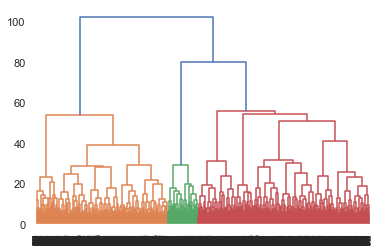

In [209]:
dend = dendrogram(wardlink)

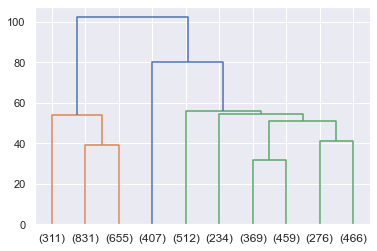

In [210]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [211]:
from scipy.cluster.hierarchy import fcluster

In [212]:
#Method 1

clusters_max = fcluster(wardlink, 2, criterion='maxclust')
clusters_max

array([2, 2, 1, ..., 2, 2, 1], dtype=int32)

In [213]:
# Method 2

clusters = fcluster(wardlink, 80, criterion='distance')
clusters

array([3, 3, 1, ..., 3, 3, 1], dtype=int32)

In [214]:
Sales_imputed_hc['clusters'] = clusters

In [215]:
Sales_imputed_hc.head()

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
0 22.00        4.00            2.00       20993.00                  2.00   
1 11.00        2.00            4.00       20130.00                  3.00   
2 26.00        4.00            3.00       17090.00                  2.00   
3 11.00        5.90            3.00       17909.00                  2.00   
4  6.00        8.40            4.00       18468.00                  4.00   

   SumAssured  LastMonthCalls  CustCareScore  AgentBonus              Channel  \
0   806761.00            5.00           2.00     4409.00                Agent   
1   294502.00            7.00           3.00     2214.00  Third_Party_Partner   
2   599492.70            0.00           3.00     4273.00                Agent   
3   268635.00            0.00           5.00     1791.00  Third_Party_Partner   
4   366405.00            2.00           5.00     2955.00                Agent   

       Occupation  EducationField  Gender ExistingProdType Designation  \
0        Salaried        Graduate  Female                3     Manager   
1        Salaried        Graduate    Male                4     Manager   
2     Free_Lancer   Post_Graduate    Male                4   Executive   
3        Salaried        Graduate  Female                3   Executive   
4  Small_Business  Under_Graduate    Male                3   Executive   

  MaritalStatus Complaint   Zone PaymentMethod  clusters  
0        Single         1  North   Half Yearly         3  
1      Divorced         0  North        Yearly         3  
2        Single         1  North        Yearly         1  
3      Divorced         1   West   Half Yearly         1  
4      Divorced         0   West   Half Yearly         1

In [216]:
Sales_imputed_hc['clusters'].value_counts().sort_values(ascending=True)

2     407
1    1797
3    2316
Name: clusters, dtype: int64

In [217]:
cluster_hir1 = Sales_imputed_hc.loc[Sales_imputed_hc['clusters'] == 1]

In [218]:
cluster_hir2 = Sales_imputed_hc.loc[Sales_imputed_hc['clusters'] == 2]

In [219]:
cluster_hir3 = Sales_imputed_hc.loc[Sales_imputed_hc['clusters'] == 3]

In [220]:
Sales_imputed_hc.to_csv('Sales_imputed_hc.csv')

In [221]:
cluster_hir1.describe()

Age  CustTenure  NumberOfPolicy  MonthlyIncome  \
count 1797.00     1797.00         1797.00        1797.00   
mean    10.71       10.55            3.43       20107.18   
std      5.76        5.80            1.47        2317.98   
min      2.00        2.00            1.00       16009.00   
25%      6.00        6.00            2.00       17886.00   
50%     10.00       10.00            3.00       20159.00   
75%     14.00       14.00            5.00       21430.00   
max     35.00       32.00            6.00       28744.00   

       ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  \
count               1797.00     1797.00         1797.00        1797.00   
mean                   2.55   491297.63            3.75           3.31   
std                    1.60   167311.95            3.08           1.26   
min                    1.00   168536.00            0.00           1.00   
25%                    1.00   363656.00            2.00           3.00   
50%                    2.00   467478.00            3.00           3.00   
75%                    4.00   595790.00            7.00           4.00   
max                    9.00  1184400.00           17.00           5.00   

       AgentBonus  clusters  
count     1797.00   1797.00  
mean      3297.66      1.00  
std        934.91      0.00  
min       1605.00      1.00  
25%       2531.00      1.00  
50%       3191.00      1.00  
75%       3958.00      1.00  
max       7468.00      1.00

In [222]:
cluster_hir2.describe()

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
count 407.00      407.00          407.00         407.00                407.00   
mean   22.34       21.84            3.56       27625.55                  4.56   
std     9.78        8.64            1.36        1639.95                  1.81   
min     4.00        5.00            1.00       17130.20                  1.00   
25%    14.00       16.00            3.00       27226.70                  3.70   
50%    22.90       22.80            3.60       28403.10                  4.50   
75%    31.00       28.00            5.00       28621.10                  5.45   
max    39.00       37.00            6.00       29009.00                  9.00   

       SumAssured  LastMonthCalls  CustCareScore  AgentBonus  clusters  
count      407.00          407.00         407.00      407.00    407.00  
mean    925338.18            6.34           3.36     6723.50      2.00  
std     157287.50            4.44           1.30     1195.14      0.00  
min     432089.00            0.00           1.00     3324.00      2.00  
25%     817471.00            2.00           3.00     5874.00      2.00  
50%     947087.00            7.00           3.00     6648.00      2.00  
75%    1035245.50           10.00           4.00     7591.00      2.00  
max    1201184.00           17.00           5.00     9608.00      2.00

In [223]:
cluster_hir3.describe()

Age  CustTenure  NumberOfPolicy  MonthlyIncome  \
count 2316.00     2316.00         2316.00        2316.00   
mean    15.25       15.19            3.67       22342.02   
std      8.26        8.08            1.44        3223.45   
min      2.00        2.00            1.00       16091.00   
25%      8.00        8.95            3.00       20228.00   
50%     14.00       15.00            4.00       22266.50   
75%     21.00       21.00            5.00       24714.25   
max     39.00       37.00            6.00       29009.00   

       ExistingPolicyTenure  SumAssured  LastMonthCalls  CustCareScore  \
count               2316.00     2316.00         2316.00        2316.00   
mean                   3.99   634315.85            4.94           2.83   
std                    2.35   197908.98            3.56           1.43   
min                    1.00   196889.00            0.00           1.00   
25%                    2.00   486880.32            2.00           1.00   
50%                    3.60   614564.50            4.00           3.00   
75%                    6.00   772435.00            8.00           4.00   
max                    9.00  1192121.00           17.00           5.00   

       AgentBonus  clusters  
count     2316.00   2316.00  
mean      4218.25      3.00  
std       1092.15      0.00  
min       1790.00      3.00  
25%       3411.00      3.00  
50%       4207.00      3.00  
75%       4949.00      3.00  
max       8756.00      3.00

**Train-Test Split**

In [224]:
# Copy all the predictor variables into X dataframe
X = scaled_df.drop('AgentBonus', axis=1)

# Copy target into the y dataframe. 
y = scaled_df[['AgentBonus']]

In [225]:
X.head()

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
0  0.96       -1.24           -1.08          -0.27                 -0.68   
1 -0.37       -1.49            0.30          -0.52                 -0.22   
2  1.44       -1.24           -0.39          -1.40                 -0.68   
3 -0.37       -1.00           -0.39          -1.16                 -0.68   
4 -0.98       -0.69            0.30          -1.00                  0.24   

   SumAssured  LastMonthCalls  CustCareScore Occupation Gender  \
0        0.92            0.11          -0.78          1      0   
1       -1.41            0.68          -0.05          1      1   
2       -0.02           -1.29          -0.05          0      1   
3       -1.53           -1.29           1.40          1      0   
4       -1.08           -0.73           1.40          2      1   

  ExistingProdType Designation Complaint  Channel_Online  \
0                3           1         1               0   
1                4           1         0               0   
2                4           0         1               0   
3                3           0         1               0   
4                3           0         0               0   

   Channel_Third_Party_Partner  MaritalStatus_Married  MaritalStatus_Single  \
0                            0                      0                     1   
1                            1                      0                     0   
2                            0                      0                     1   
3                            1                      0                     0   
4                            0                      0                     0   

   EducationField_Engineer  EducationField_Graduate  EducationField_MBA  \
0                        0                        1                   0   
1                        0                        1                   0   
2                        0                        0                   0   
3                        0                        1                   0   
4                        0                        0                   0   

   EducationField_Post_Graduate  EducationField_Under_Graduate  Zone_North  \
0                             0                              0           1   
1                             0                              0           1   
2                             1                              0           1   
3                             0                              0           0   
4                             0                              1           0   

   Zone_South  Zone_West  PaymentMethod_Monthly  PaymentMethod_Quarterly  \
0           0          0                      0                        0   
1           0          0                      0                        0   
2           0          0                      0                        0   
3           0          1                      0                        0   
4           0          1                      0                        0   

   PaymentMethod_Yearly  
0                     0  
1                     1  
2                     1  
3                     0  
4                     0

In [226]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

**Linear Regression Model**

In [227]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [228]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for Age is 176.3241872170345
The coefficient for CustTenure is 164.98936531129533
The coefficient for NumberOfPolicy is 6.0430361543669475
The coefficient for MonthlyIncome is 221.41223271306785
The coefficient for ExistingPolicyTenure is 79.50013690601438
The coefficient for SumAssured is 801.0459156285999
The coefficient for LastMonthCalls is -32.284338349707454
The coefficient for CustCareScore is 17.297659786090406
The coefficient for Occupation is -79.66640285226842
The coefficient for Gender is 36.085023305685134
The coefficient for ExistingProdType is 5.728860797206604
The coefficient for Designation is 202.10516142169826
The coefficient for Complaint is 32.007716197657025
The coefficient for Channel_Online is 15.794395351428959
The coefficient for Channel_Third_Party_Partner is 0.8869226549079612
The coefficient for MaritalStatus_Married is -69.30333092882393
The coefficient for MaritalStatus_Single is -14.621944561483318
The coefficient for EducationField_Engin

In [229]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3883.389293797424


In [230]:
# R square on training data
regression_model.score(X_train, y_train)

0.7999974997985014

79% of the variation in the log_price is explained by the predictors in the model for train set

In [231]:
# R square on testing data
regression_model.score(X_test, y_test)

0.776213675772693

In [232]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

631.9651759639797

In [233]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

649.4692290470124

**Linear Regression using statsmodels**

In [234]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

Age  CustTenure  NumberOfPolicy  MonthlyIncome  ExistingPolicyTenure  \
693   0.35        0.13           -1.08           0.13                 -1.14   
3521  0.47        0.01            0.99          -1.41                 -0.68   
3789  1.57       -0.37           -1.08          -0.04                  0.24   
2051 -1.22       -0.24           -0.39          -1.18                  2.55   
2404  0.11        0.13           -0.39           0.35                 -1.14   

      SumAssured  LastMonthCalls  CustCareScore Occupation Gender  \
693        -0.15           -0.17          -0.78          3      1   
3521       -0.94            1.80           1.40          1      0   
3789        1.96            0.96          -0.05          3      1   
2051       -0.16           -0.73          -0.05          1      1   
2404        0.46           -0.73          -0.05          2      1   

     ExistingProdType Designation Complaint  Channel_Online  \
693                 3           1         0               0   
3521                5           3         0               0   
3789                4           1         0               0   
2051                3           0         0               0   
2404                5           1         0               0   

      Channel_Third_Party_Partner  MaritalStatus_Married  \
693                             0                      1   
3521                            0                      1   
3789                            0                      1   
2051                            1                      1   
2404                            1                      0   

      MaritalStatus_Single  EducationField_Engineer  EducationField_Graduate  \
693                      0                        1                        0   
3521                     0                        0                        1   
3789                     0                        1                        0   
2051                     0                        0                        0   
2404                     1                        0                        0   

      EducationField_MBA  EducationField_Post_Graduate  \
693                    0                             0   
3521                   0                             0   
3789                   0                             0   
2051                   0                             1   
2404                   0                             0   

      EducationField_Under_Graduate  Zone_North  Zone_South  Zone_West  \
693                               0           0           0          1   
3521                              0           0           0          1   
3789                              0           1           0          0   
2051                              0           0           0          1   
2404                              0           0           0          1   

      PaymentMethod_Monthly  PaymentMethod_Quarterly  PaymentMethod_Yearly  \
693                       0                        0                     0   
3521                      0                        0                     1   
3789                      0                        0                     0   
2051                      0                        0                     0   
2404                      0                        0                     1   

      AgentBonus  
693      2909.00  
3521     3523.00  
3789     5444.00  
2051     3742.00  
2404     4859.00

In [235]:
data_train.columns

Index(['Age', 'CustTenure', 'NumberOfPolicy', 'MonthlyIncome',
       'ExistingPolicyTenure', 'SumAssured', 'LastMonthCalls', 'CustCareScore',
       'Occupation', 'Gender', 'ExistingProdType', 'Designation', 'Complaint',
       'Channel_Online', 'Channel_Third_Party_Partner',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'EducationField_Engineer', 'EducationField_Graduate',
       'EducationField_MBA', 'EducationField_Post_Graduate',
       'EducationField_Under_Graduate', 'Zone_North', 'Zone_South',
       'Zone_West', 'PaymentMethod_Monthly', 'PaymentMethod_Quarterly',
       'PaymentMethod_Yearly', 'AgentBonus'],
      dtype='object')

In [236]:
expr= 'AgentBonus ~ Age + CustTenure + NumberOfPolicy + MonthlyIncome + ExistingPolicyTenure + SumAssured + LastMonthCalls + CustCareScore + Occupation + Gender + ExistingProdType + Designation + Complaint + Channel_Online + Channel_Third_Party_Partner + MaritalStatus_Married + MaritalStatus_Single + EducationField_Engineer + EducationField_Graduate + EducationField_MBA + EducationField_Post_Graduate + EducationField_Under_Graduate + Zone_North + Zone_South + Zone_West + PaymentMethod_Monthly + PaymentMethod_Quarterly + PaymentMethod_Yearly'

In [237]:
import statsmodels.formula.api as smf

In [238]:
lm1 = smf.ols(formula=expr, data=data_train).fit()
lm1.params

Intercept                       4785.95
Occupation[T.1]                 -328.98
Occupation[T.2]                 -386.23
Occupation[T.3]                 -348.88
Gender[T.1]                       10.50
ExistingProdType[T.2]            -70.79
ExistingProdType[T.3]           -288.95
ExistingProdType[T.4]           -347.01
ExistingProdType[T.5]           -399.62
ExistingProdType[T.6]           -302.75
Designation[T.1]                -170.69
Designation[T.2]                -114.46
Designation[T.3]                 541.86
Designation[T.4]                 886.98
Complaint[T.1]                    22.35
Age                              172.61
CustTenure                       166.54
NumberOfPolicy                     1.78
MonthlyIncome                    330.57
ExistingPolicyTenure              72.71
SumAssured                       770.48
LastMonthCalls                   -17.98
CustCareScore                      7.74
Channel_Online                    52.80
Channel_Third_Party_Partner        7.51


In [239]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:             AgentBonus   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     406.9
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:44:02   Log-Likelihood:                -26513.
No. Observations:                3390   AIC:                         5.310e+04
Df Residuals:                    3352   BIC:                         5.333e+04
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [240]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('AgentBonus',axis=1))-data_train['AgentBonus'])**2)

In [241]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

603.0143144521063

In [242]:
np.sqrt(lm1.mse_resid) #another way

606.422722373218

In [243]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

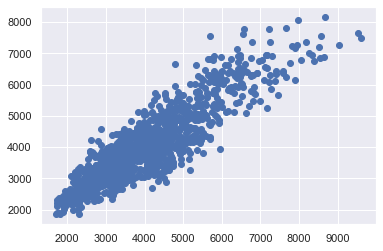

In [244]:
plt.scatter(y_test['AgentBonus'], y_pred)
plt.show()

In [245]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(4785.95) * Intercept + (-328.98) * Occupation[T.1] + (-386.23) * Occupation[T.2] + (-348.88) * Occupation[T.3] + (10.5) * Gender[T.1] + (-70.79) * ExistingProdType[T.2] + (-288.95) * ExistingProdType[T.3] + (-347.01) * ExistingProdType[T.4] + (-399.62) * ExistingProdType[T.5] + (-302.75) * ExistingProdType[T.6] + (-170.69) * Designation[T.1] + (-114.46) * Designation[T.2] + (541.86) * Designation[T.3] + (886.98) * Designation[T.4] + (22.35) * Complaint[T.1] + (172.61) * Age + (166.54) * CustTenure + (1.78) * NumberOfPolicy + (330.57) * MonthlyIncome + (72.71) * ExistingPolicyTenure + (770.48) * SumAssured + (-17.98) * LastMonthCalls + (7.74) * CustCareScore + (52.8) * Channel_Online + (7.51) * Channel_Third_Party_Partner + (-61.94) * MaritalStatus_Married + (-25.94) * MaritalStatus_Single + (-41.87) * EducationField_Engineer + (-32.26) * EducationField_Graduate + (-163.44) * EducationField_MBA + (21.05) * EducationField_Post_Graduate + (22.48) * EducationField_Under_Graduate + (-6.16)

**Split the Data**

In [246]:
x=scaled_df.drop('AgentBonus', axis=1)
y=scaled_df[['AgentBonus']]

**Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression

Check Train and Test RMSE
Check Train and Test Scores**

In [247]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=123,test_size=0.30)

In [248]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=10000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
 
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 
 
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

                         Train RMSE  Test RMSE  Training Score  Test Score
Linear Regression            638.51     632.30            0.79        0.79
Decision Tree Regressor        0.00     673.73            1.00        0.77
Random Forest Regressor      176.76     481.08            0.98        0.88
ANN Regressor                468.45     547.90            0.89        0.85


**Grid Search on Decision Tree**

In [249]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)
{'max_depth': 10, 'min_samples_leaf': 15, 'min_samples_split': 15}
##Let us take Max_depth as 10, min_samples_leaf as 15 and Min_sample_split as 15. You are welcome to try other values as well.

##Using Grid Search for Random Forest

param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [300, 500]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

{'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 40}


In [250]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [300, 500]})

In [251]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 300}


**Using Grid Search for ANN**

In [252]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123)

grid_search = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [ ]:
grid_search.fit(x_train,y_train)

In [ ]:
print(grid_search.best_params_)

In [ ]:
annr = MLPRegressor(activation='relu', hidden_layer_sizes=(500), 
                    solver='sgd',random_state=123, 
                    max_iter=10000)
rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)
dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=15,random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
        i.fit(x_train,y_train)
        scores_train.append(i.score(x_train, y_train))
        scores_test.append(i.score(x_test, y_test))
        rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
        rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
   
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))